# Group 4 - Avengers

## Restaurant Expenditure Analysis

### Table of Contents

####  1. Libraries
####  2. Exploratory Data Analysis
####  3. Data Cleaning
####  4. Feature Engineering
####  5. Modeling
####         - 5.1 Random Forest
####         - 5.2 Multiple Linear Regression
####  6. Key Summary Visualizations


In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import locale
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
from statsmodels.stats.outliers_influence import variance_inflation_factor

#from statsmodels.stats.outliers_influence import variance_inflation_factors_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm



In [2]:
os.chdir("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\\01 MASTER FILES\\1. Code & datasets")
df =pd.read_excel('RES _ EDA FINAL MASTER DATA.xlsx')

In [3]:
df.head()

Unique ID  AGE_REF  Gender  FAM_SIZE  STATE CODE    STATE NAME  \
0    5011064       87  Female         3        37.0      Oklahoma   
1    5011134       73  Female         2        36.0          Ohio   
2    5011244       47  Female         2        39.0  Pennsylvania   
3    5011314       82  Female         1        20.0         Maine   
4    5011334       87    Male         2         8.0      Delaware   

   No of Income Earners  Family Income after Taxes  \
0                     1                    57240.2   
1                     0                    55570.0   
2                     2                   145387.0   
3                     0                    10082.0   
4                     0                    50481.0   

   Family Income Before Taxes  Expenditures this quarter  ...  ('AGE', 4)  \
0                        1979                 10669.1001  ...         NaN   
1                       48970                 11434.2500  ...         NaN   
2                      172600                 24199.7501  ...         NaN   
3                        7332                  8025.0000  ...         NaN   
4                       43807                  9367.0000  ...         NaN   

   ('AGE', 5)  ('AGE', 6)  ('AGE', 7)  ('AGE', 8)  ('AGE', 9)  ('AGE', 10)  \
0         NaN         NaN         NaN         NaN         NaN          NaN   
1         NaN         NaN         NaN         NaN         NaN          NaN   
2         NaN         NaN         NaN         NaN         NaN          NaN   
3         NaN         NaN         NaN         NaN         NaN          NaN   
4         NaN         NaN         NaN         NaN         NaN          NaN   

   ('AGE', 11)  ('AGE', 12)  ('AGE', 13)  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 33 columns]

## 2. Exploratory Data Analysis

### Total Entries

In [4]:
total_entries = len(df)
print("Total number of rows in the dataset",total_entries)

Total number of rows in the dataset 4807


In [5]:
df.dtypes

Unique ID                                          int64
AGE_REF                                            int64
Gender                                            object
FAM_SIZE                                           int64
STATE CODE                                       float64
STATE NAME                                        object
No of Income Earners                               int64
Family Income after Taxes                        float64
Family Income Before Taxes                         int64
Expenditures this quarter                        float64
Amount Spent on Groceries this Quarter           float64
Hours worked by spouse per week                  float64
Total Amount spent(outlays major)                float64
GOT MARRIED                                        int64
NEVER MARRIED                                      int64
MARRIED WITH CHILDREN                              int64
DIVORCED                                           int64
SEPERATED                      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unique ID                                      4807 non-null   int64  
 1   AGE_REF                                        4807 non-null   int64  
 2   Gender                                         4807 non-null   object 
 3   FAM_SIZE                                       4807 non-null   int64  
 4   STATE CODE                                     4415 non-null   float64
 5   STATE NAME                                     4176 non-null   object 
 6   No of Income Earners                           4807 non-null   int64  
 7   Family Income after Taxes                      4807 non-null   float64
 8   Family Income Before Taxes                     4807 non-null   int64  
 9   Expenditures this quarter                      4807 

In [7]:
df.describe()

Unique ID      AGE_REF     FAM_SIZE   STATE CODE  \
count  4.807000e+03  4807.000000  4807.000000  4415.000000   
mean   5.165009e+06    53.899105     2.340961    26.574179   
std    9.341853e+04    17.805756     1.447382    16.391171   
min    5.011064e+06    16.000000     1.000000     1.000000   
25%    5.095433e+06    39.000000     1.000000    12.000000   
50%    5.207302e+06    55.000000     2.000000    26.000000   
75%    5.254916e+06    68.000000     3.000000    40.000000   
max    5.286191e+06    87.000000    13.000000    55.000000   

       No of Income Earners  Family Income after Taxes  \
count           4807.000000                4807.000000   
mean               1.250468               88550.920221   
std                1.002331               76918.876437   
min                0.000000             -331819.400000   
25%                0.000000               36277.200000   
50%                1.000000               67902.000000   
75%                2.000000              117893.500000   
max                8.000000              683154.600000   

       Family Income Before Taxes  Expenditures this quarter  \
count                4.807000e+03                4807.000000   
mean                 8.721371e+04               12634.875408   
std                  9.918324e+04               14060.896296   
min                 -5.806200e+04                  20.000000   
25%                  2.416450e+04                4944.575050   
50%                  5.770000e+04                8961.000000   
75%                  1.170000e+05               15491.958300   
max                  1.189674e+06              357008.188100   

       Amount Spent on Groceries this Quarter  \
count                             4807.000000   
mean                              1248.822897   
std                               1024.386861   
min                                  0.000000   
25%                                541.666700   
50%                                975.000000   
75%                               1642.000000   
max                              11349.000000   

       Hours worked by spouse per week  ...  ('AGE', 4)  ('AGE', 5)  \
count                      1527.000000  ...  965.000000  440.000000   
mean                         39.984283  ...   15.325389   16.525000   
std                          11.852623  ...   14.439810   18.604487   
min                           2.000000  ...    0.000000    0.000000   
25%                          40.000000  ...    6.000000    5.000000   
50%                          40.000000  ...   12.000000   11.000000   
75%                          45.000000  ...   19.000000   17.250000   
max                          99.000000  ...   87.000000   87.000000   

       ('AGE', 6)  ('AGE', 7)  ('AGE', 8)  ('AGE', 9)  ('AGE', 10)  \
count  177.000000   73.000000   33.000000   13.000000    10.000000   
mean    15.158192   13.931507   11.696970   13.384615     3.100000   
std     18.977494   16.152338   12.734021   12.079862     1.595131   
min      0.000000    0.000000    0.000000    4.000000     1.000000   
25%      4.000000    5.000000    3.000000    5.000000     2.000000   
50%      9.000000    9.000000    8.000000    7.000000     3.000000   
75%     15.000000   19.000000   15.000000   13.000000     4.750000   
max     87.000000   87.000000   65.000000   38.000000     5.000000   

       ('AGE', 11)  ('AGE', 12)  ('AGE', 13)  
count     3.000000          2.0          1.0  
mean      3.333333          2.0          0.0  
std       0.577350          0.0          NaN  
min       3.000000          2.0          0.0  
25%       3.000000          2.0          0.0  
50%       3.000000          2.0          0.0  
75%       3.500000          2.0          0.0  
max       4.000000          2.0          0.0  

[8 rows x 31 columns]

## Duplicates

In [8]:
duplicates = df.duplicated()                                  #finding duplicate values using duplicated function
print("total duplicates in the dataset",duplicates.sum())

total duplicates in the dataset 0


In [9]:
print("Total Number Duplicates in the dataset ",duplicates.sum())

Total Number Duplicates in the dataset  0


## Missing Values

In [10]:
missing_values = df.isnull().sum()
print("Missing values in the dataset")
missing_values

Missing values in the dataset


Unique ID                                           0
AGE_REF                                             0
Gender                                              0
FAM_SIZE                                            0
STATE CODE                                        392
STATE NAME                                        631
No of Income Earners                                0
Family Income after Taxes                           0
Family Income Before Taxes                          0
Expenditures this quarter                           0
Amount Spent on Groceries this Quarter              0
Hours worked by spouse per week                  3280
Total Amount spent(outlays major)                   0
GOT MARRIED                                         0
NEVER MARRIED                                       0
MARRIED WITH CHILDREN                               0
DIVORCED                                            0
SEPERATED                                           0
restaurant_spending_prev_qua

### Count of Missing values in the columns

In [11]:
# Creating a DataFrame from the missing values count
missing_values_df = pd.DataFrame(missing_values, columns=['Missing Values'])

# Filtering out columns with no missing values for clarity
missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]

# Display the DataFrame
print(missing_values_df)

                                 Missing Values
STATE CODE                                  392
STATE NAME                                  631
Hours worked by spouse per week            3280
('AGE', 1)                                   15
('AGE', 2)                                 1632
('AGE', 3)                                 3238
('AGE', 4)                                 3842
('AGE', 5)                                 4367
('AGE', 6)                                 4630
('AGE', 7)                                 4734
('AGE', 8)                                 4774
('AGE', 9)                                 4794
('AGE', 10)                                4797
('AGE', 11)                                4804
('AGE', 12)                                4805
('AGE', 13)                                4806


### Percentage of missing values in the columns

In [12]:

# Calculating the percentage of missing values for each column
missing_values_percentage = (missing_values / total_entries) * 100

# Creating a DataFrame to display column names and their corresponding percentage of missing values
missing_percentage_df = pd.DataFrame({'Column Name': missing_values_percentage.index, 'Percentage Missing (%)': missing_values_percentage.values})

# Display the DataFrame
print(missing_percentage_df)
    

                                      Column Name  Percentage Missing (%)
0                                       Unique ID                0.000000
1                                         AGE_REF                0.000000
2                                          Gender                0.000000
3                                        FAM_SIZE                0.000000
4                                      STATE CODE                8.154774
5                                      STATE NAME               13.126690
6                            No of Income Earners                0.000000
7                       Family Income after Taxes                0.000000
8                      Family Income Before Taxes                0.000000
9                       Expenditures this quarter                0.000000
10         Amount Spent on Groceries this Quarter                0.000000
11                Hours worked by spouse per week               68.233826
12              Total Amount spent(out

### Visual representation of missing values in heat map before data cleaning

<Axes: >

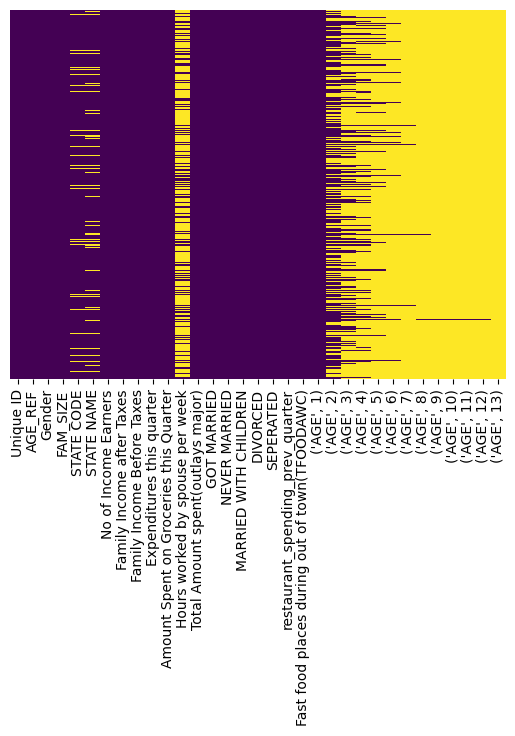

In [13]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

## Histograms

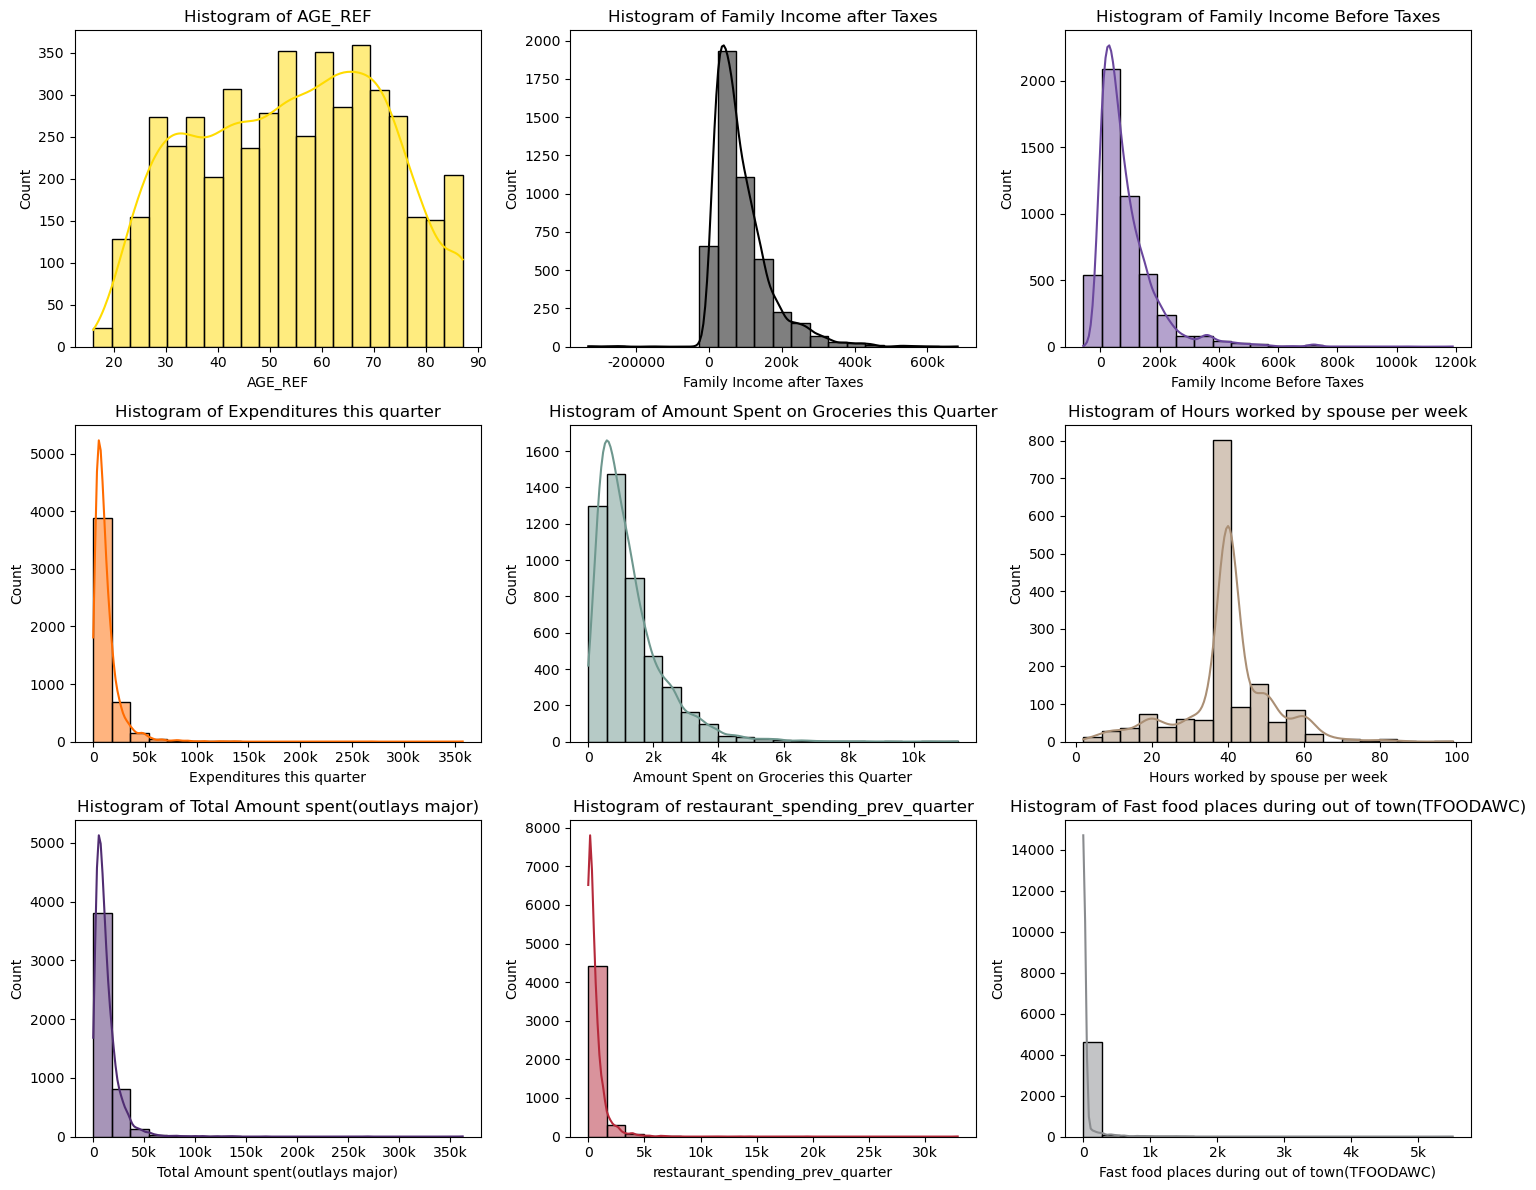

In [14]:
# Define a function to format x-axis ticks
def format_ticks(x, pos):
    if x >= 1000:
        return f'{int(x/1000)}k'
    else:
        return int(x)

# Setting up the figure with subplots
plt.figure(figsize=(15, 12))

# Histogram for AGE_REF
plt.subplot(3, 3, 1)
sns.histplot(df['AGE_REF'], bins=20, kde=True, color='#ffdb00')
plt.title('Histogram of AGE_REF')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Histogram for Family Income after Taxes
plt.subplot(3, 3, 2)
sns.histplot(df['Family Income after Taxes'], bins=20, kde=True, color='#000000')
plt.title('Histogram of Family Income after Taxes')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Histogram for Family Income Before Taxes
plt.subplot(3, 3, 3)
sns.histplot(df['Family Income Before Taxes'], bins=20, kde=True, color='#6a479d')
plt.title('Histogram of Family Income Before Taxes')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Histogram for Expenditures this quarter
plt.subplot(3, 3, 4)
sns.histplot(df['Expenditures this quarter'], bins=20, kde=True, color='#ff6b00')
plt.title('Histogram of Expenditures this quarter')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Histogram for Amount Spent on Groceries this Quarter
plt.subplot(3, 3, 5)
sns.histplot(df['Amount Spent on Groceries this Quarter'], bins=20, kde=True, color='#6e978e')
plt.title('Histogram of Amount Spent on Groceries this Quarter')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Histogram for Hours worked by spouse per week
plt.subplot(3, 3, 6)
sns.histplot(df['Hours worked by spouse per week'], bins=20, kde=True, color='#aa8f75')
plt.title('Histogram of Hours worked by spouse per week')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Histogram for Total Amount spent(outlays major)
plt.subplot(3, 3, 7)
sns.histplot(df['Total Amount spent(outlays major)'], bins=20, kde=True, color='#502d72')
plt.title('Histogram of Total Amount spent(outlays major)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Histogram for restaurant_spending_prev_quarter
plt.subplot(3, 3, 8)
sns.histplot(df['restaurant_spending_prev_quarter'], bins=20, kde=True, color='#b5293a')
plt.title('Histogram of restaurant_spending_prev_quarter')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Histogram for Fast food places during out of town(TFOODAWC)
plt.subplot(3, 3, 9)
sns.histplot(df['Fast food places during out of town(TFOODAWC)'], bins=20, kde=True, color='#898b8e')
plt.title('Histogram of Fast food places during out of town(TFOODAWC)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Box plots

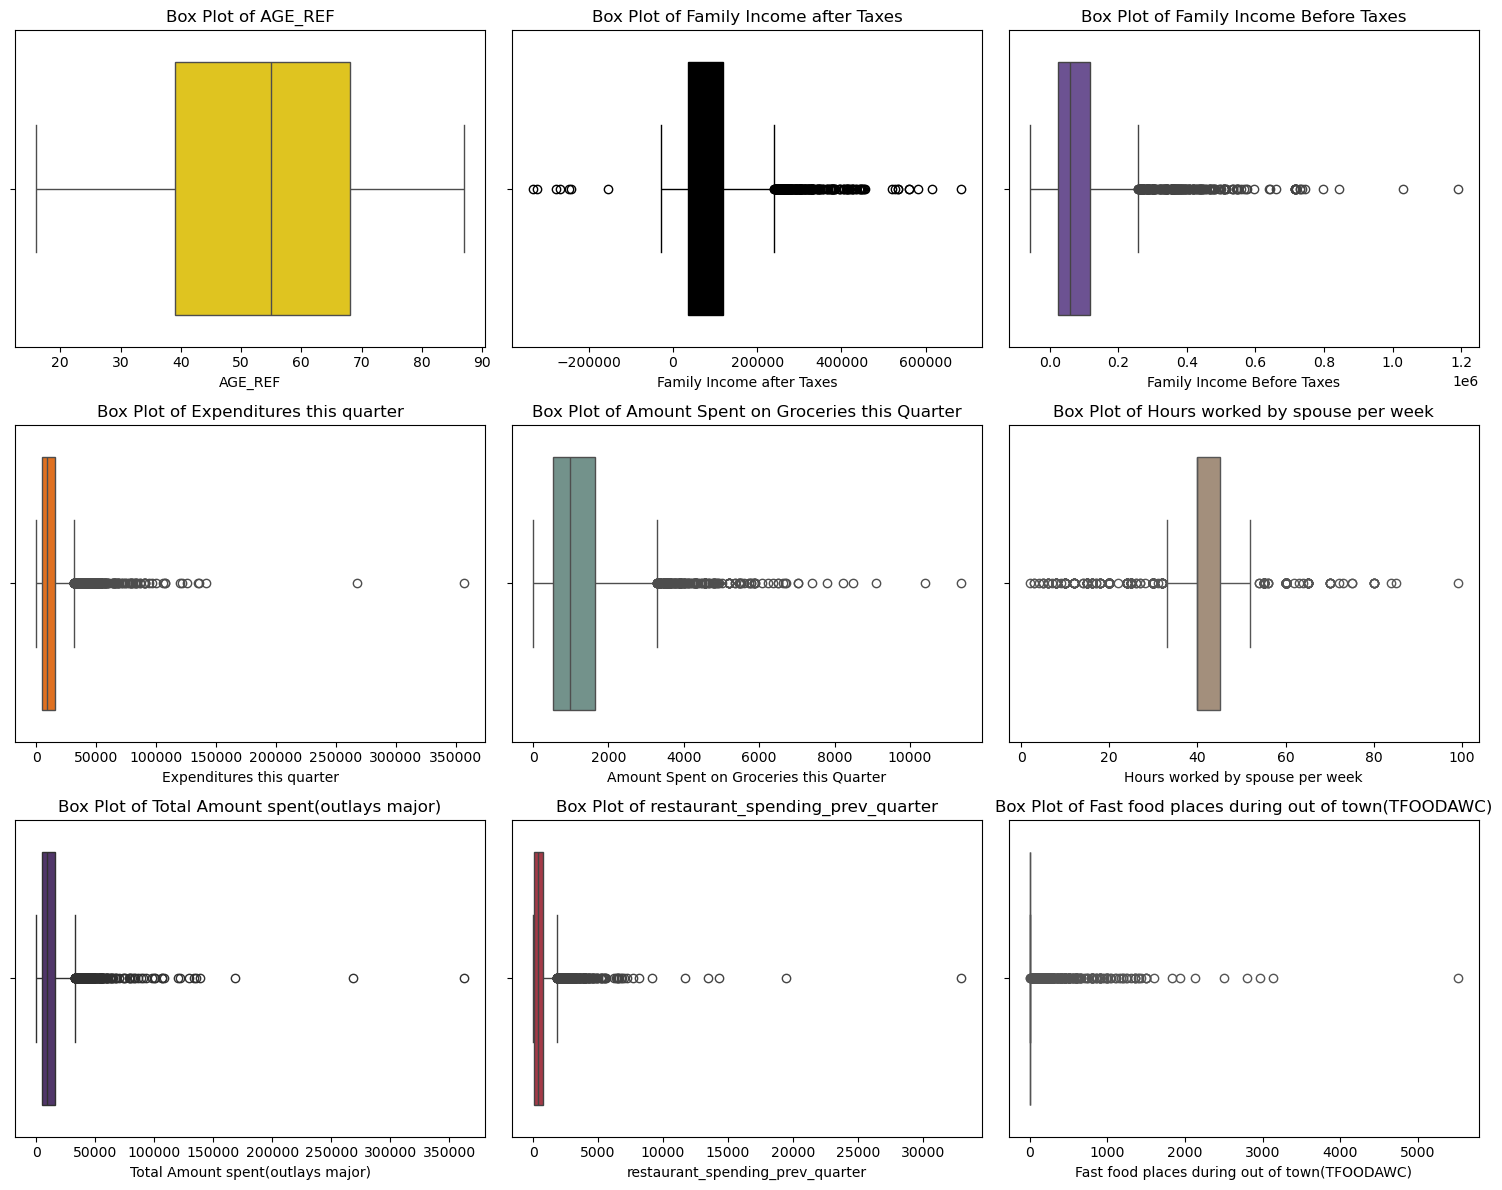

In [15]:
# Setting up the figure with subplots
plt.figure(figsize=(15, 12))

# Box plot for AGE_REF
plt.subplot(3, 3, 1)
sns.boxplot(x=df['AGE_REF'], color='#ffdb00')
plt.title('Box Plot of AGE_REF')

# Box plot for Family Income after Taxes
plt.subplot(3, 3, 2)
sns.boxplot(x=df['Family Income after Taxes'], color='#000000')
plt.title('Box Plot of Family Income after Taxes')

# Box plot for Family Income Before Taxes
plt.subplot(3, 3, 3)
sns.boxplot(x=df['Family Income Before Taxes'], color='#6a479d')
plt.title('Box Plot of Family Income Before Taxes')

# Box plot for Expenditures this quarter
plt.subplot(3, 3, 4)
sns.boxplot(x=df['Expenditures this quarter'], color='#ff6b00')
plt.title('Box Plot of Expenditures this quarter')

# Box plot for Amount Spent on Groceries this Quarter
plt.subplot(3, 3, 5)
sns.boxplot(x=df['Amount Spent on Groceries this Quarter'], color='#6e978e')
plt.title('Box Plot of Amount Spent on Groceries this Quarter')

# Box plot for Hours worked by spouse per week
plt.subplot(3, 3, 6)
sns.boxplot(x=df['Hours worked by spouse per week'], color='#aa8f75')
plt.title('Box Plot of Hours worked by spouse per week')

# Box plot for Total Amount spent(outlays major)
plt.subplot(3, 3, 7)
sns.boxplot(x=df['Total Amount spent(outlays major)'], color='#502d72')
plt.title('Box Plot of Total Amount spent(outlays major)')

# Box plot for restaurant_spending_prev_quarter
plt.subplot(3, 3, 8)
sns.boxplot(x=df['restaurant_spending_prev_quarter'], color='#b5293a')
plt.title('Box Plot of restaurant_spending_prev_quarter')

# Box plot for Fast food places during out of town(TFOODAWC)
plt.subplot(3, 3, 9)
sns.boxplot(x=df['Fast food places during out of town(TFOODAWC)'], color='#898b8e')
plt.title('Box Plot of Fast food places during out of town(TFOODAWC)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## Distributions of Key variables in Bar charts 

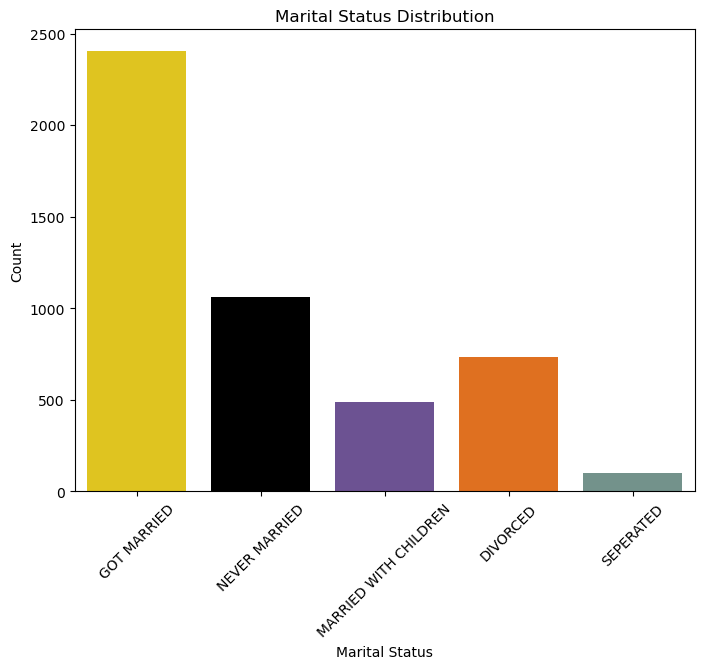

In [16]:
# Marital status columns are binary indicators
marital_status_counts = df[['GOT MARRIED', 'NEVER MARRIED', 'MARRIED WITH CHILDREN', 'DIVORCED', 'SEPERATED']].sum()

# Defining color codes for each marital status
colors = ['#ffdb00', '#000000', '#6a479d', '#ff6b00', '#6e978e']

plt.figure(figsize=(8, 6))
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values, hue=marital_status_counts.index, palette=colors, dodge=False)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


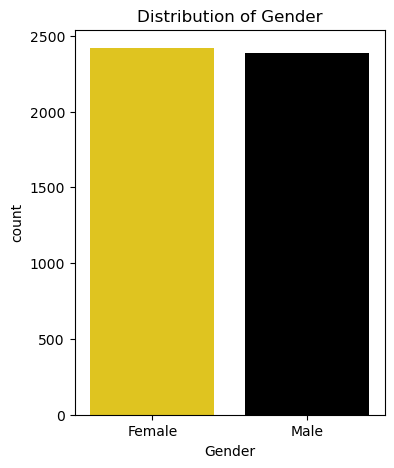

In [17]:
# Defining color codes for each category
colors = ['#ffdb00', '#000000']  # Use the provided color codes for 'Male' and 'Female'

plt.figure(figsize=(4, 5))
sns.countplot(x=df['Gender'], hue=df['Gender'], palette=colors, dodge=False)
plt.title('Distribution of Gender')
plt.show()


## Pair Plots

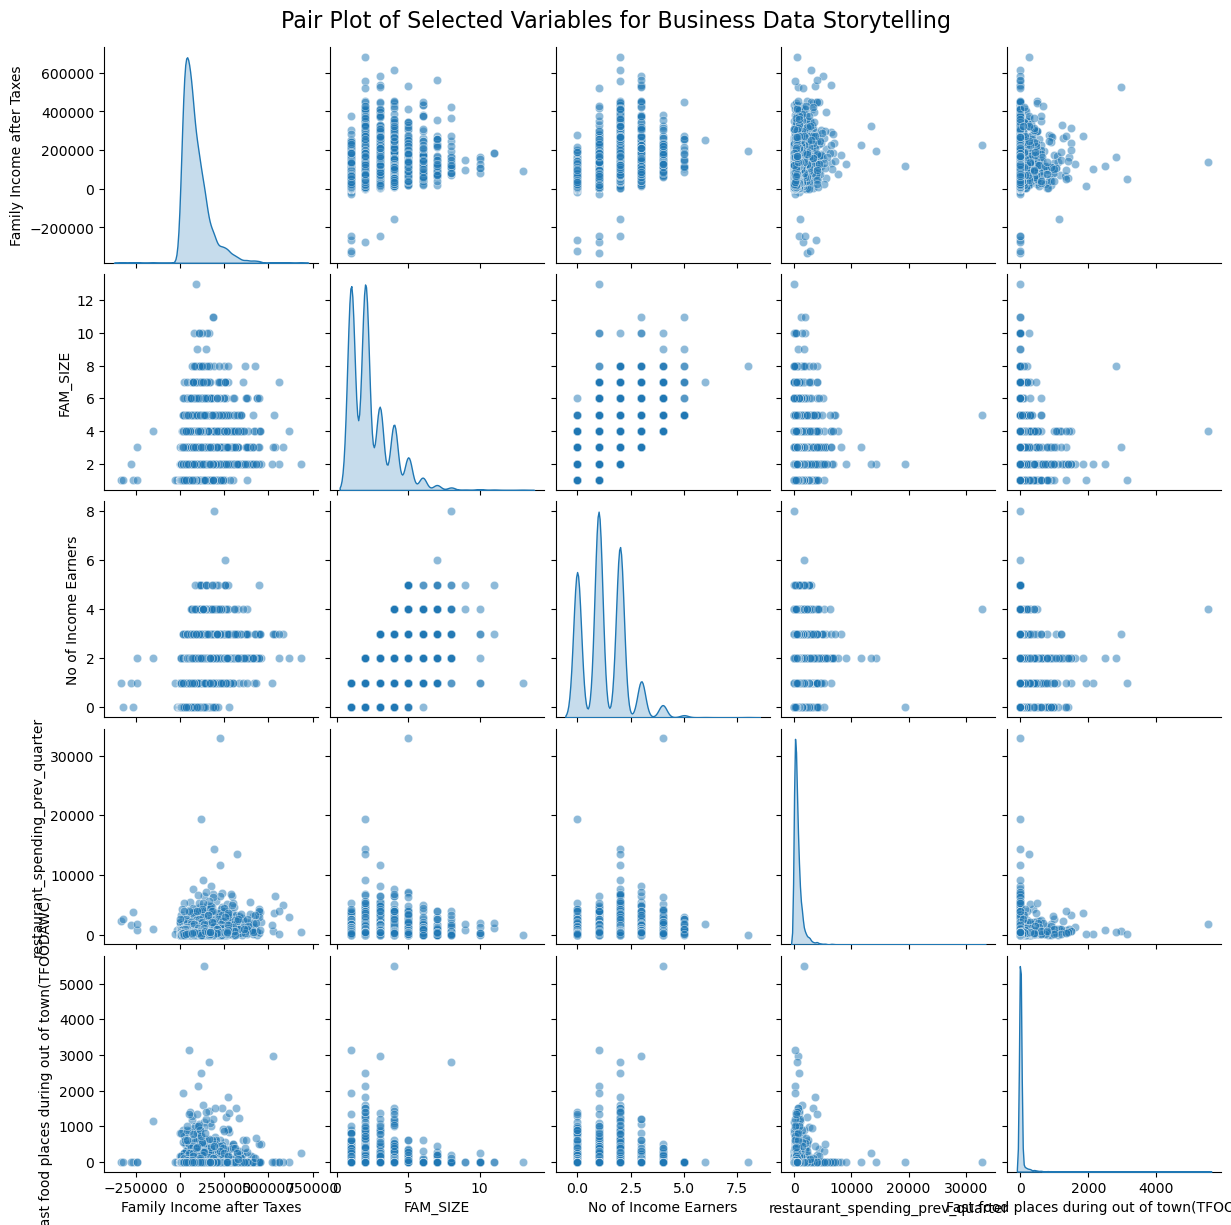

In [18]:
# Selecting the variables for the pair plot
pairplots_vars = [
    'Family Income after Taxes',
    'FAM_SIZE',
    'No of Income Earners',
    'restaurant_spending_prev_quarter',
    'Fast food places during out of town(TFOODAWC)'
]

# Creating the pair plot
pair_plot_data = df[pairplots_vars]
sns.pairplot(pair_plot_data, kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Selected Variables for Business Data Storytelling', size=16)
plt.subplots_adjust(top=0.95)
plt.show()

## Bivariate Analysis

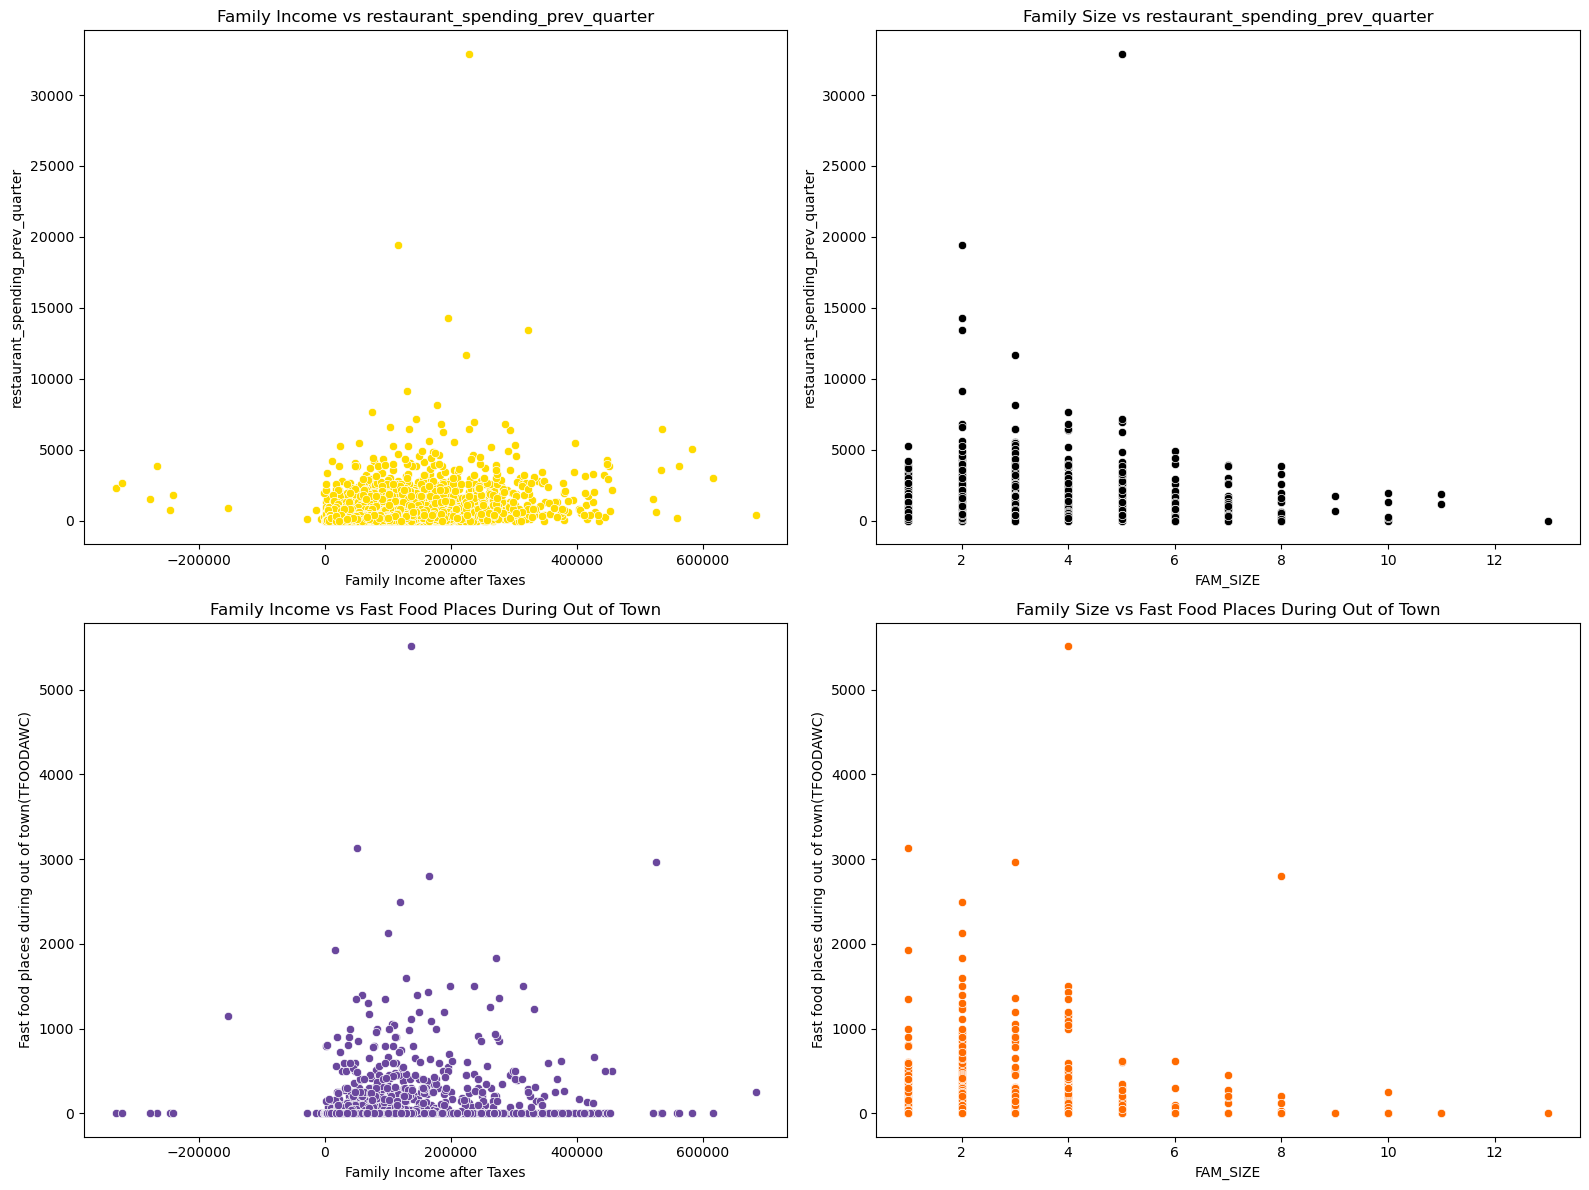

In [19]:
# Define color codes
colors = ['#ffdb00', '#000000', '#6a479d', '#ff6b00']

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Family Income after Taxes vs restaurant spending prev quarter
sns.scatterplot(data=df, x='Family Income after Taxes', y='restaurant_spending_prev_quarter', ax=axs[0, 0], color=colors[0])
axs[0, 0].set_title('Family Income vs restaurant_spending_prev_quarter')

# Plot 2: FAM_SIZE vs restaurant spending prev quarter
sns.scatterplot(data=df, x='FAM_SIZE', y='restaurant_spending_prev_quarter', ax=axs[0, 1], color=colors[1])
axs[0, 1].set_title('Family Size vs restaurant_spending_prev_quarter')

# Plot 3: Family Income after Taxes vs Fast food places during out of town(TFOODAWC)
sns.scatterplot(data=df, x='Family Income after Taxes', y='Fast food places during out of town(TFOODAWC)', ax=axs[1, 0], color=colors[2])
axs[1, 0].set_title('Family Income vs Fast Food Places During Out of Town')

# Plot 4: FAM_SIZE vs Fast food places during out of town(TFOODAWC)
sns.scatterplot(data=df, x='FAM_SIZE', y='Fast food places during out of town(TFOODAWC)', ax=axs[1, 1], color=colors[3])
axs[1, 1].set_title('Family Size vs Fast Food Places During Out of Town')

plt.tight_layout()
plt.show()


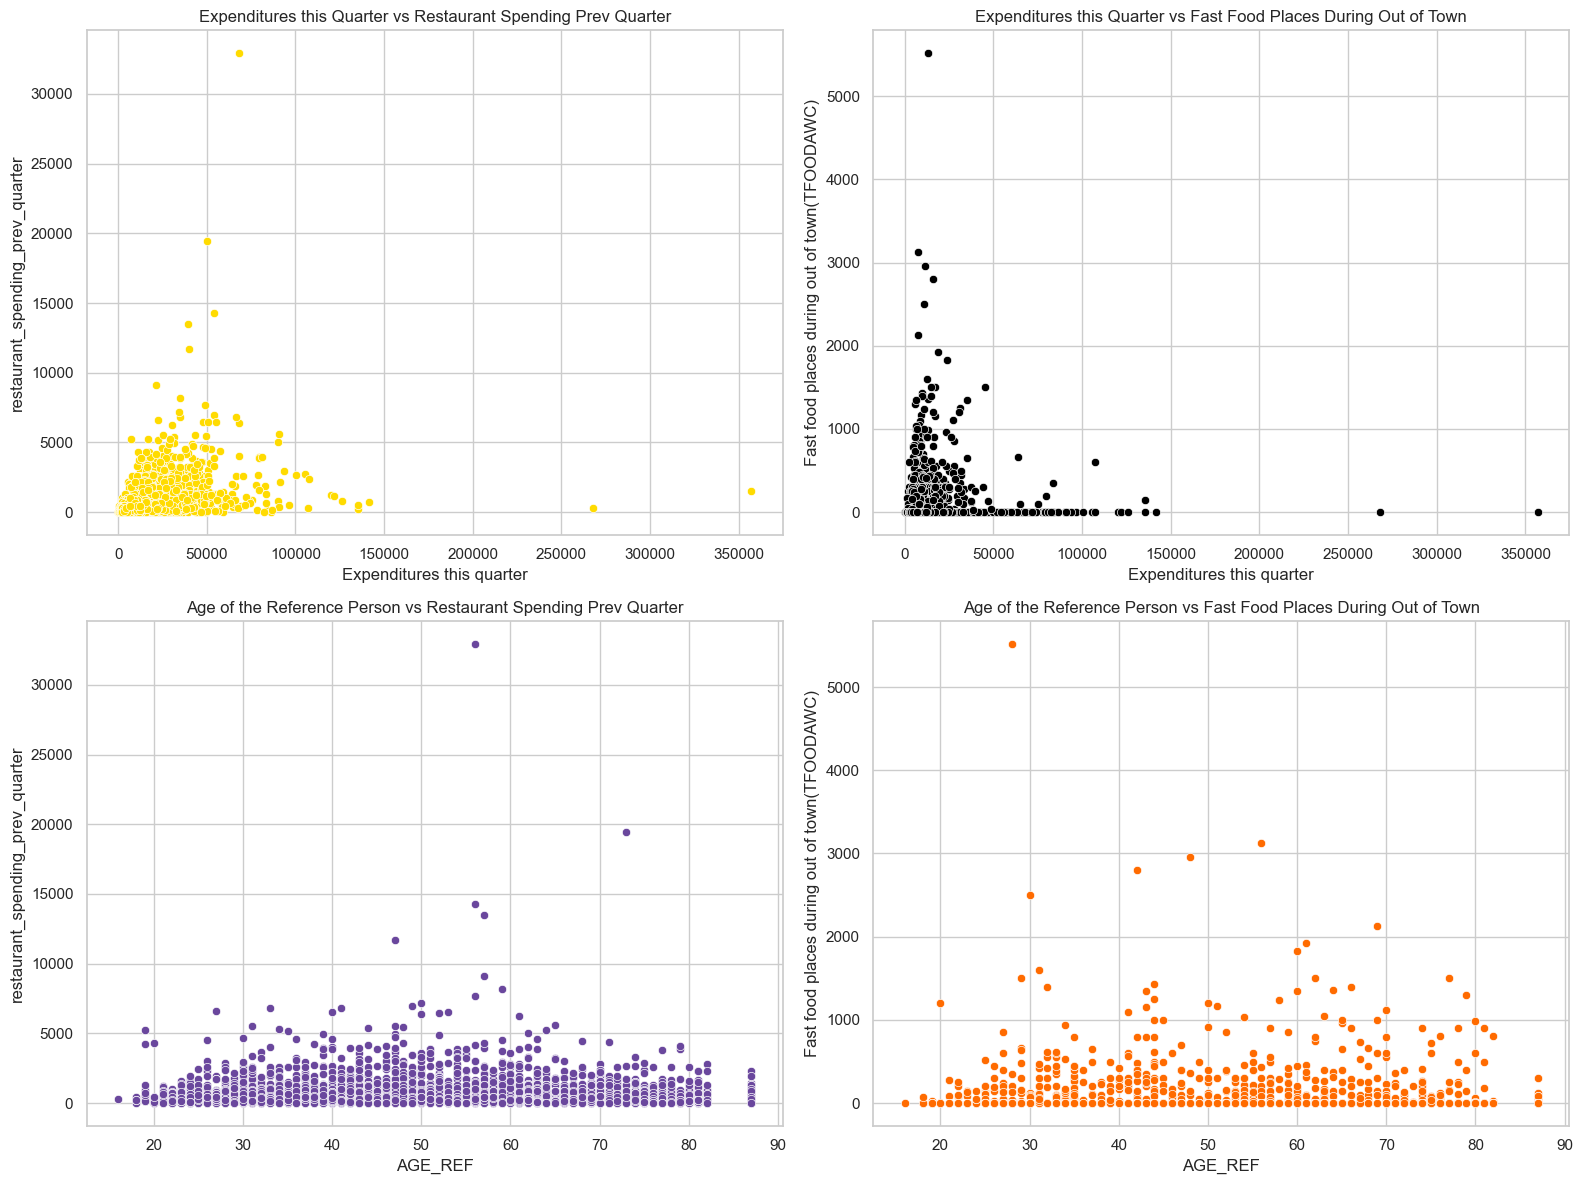

In [20]:
# Setting the style for the plots
sns.set(style="whitegrid")

# Creating a figure to hold the subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 5. Scatterplot for 'Expenditures this quarter' vs 'restaurant_spending_prev_quarter'
sns.scatterplot(data=df, x='Expenditures this quarter', y='restaurant_spending_prev_quarter', ax=axs[0, 0], color='#ffdb00')
axs[0, 0].set_title('Expenditures this Quarter vs Restaurant Spending Prev Quarter')

# 6. Scatterplot for 'Expenditures this quarter' vs 'Fast food places during out of town(TFOODAWC)'
sns.scatterplot(data=df, x='Expenditures this quarter', y='Fast food places during out of town(TFOODAWC)', ax=axs[0, 1], color='#000000')
axs[0, 1].set_title('Expenditures this Quarter vs Fast Food Places During Out of Town')

# 7. Scatterplot for 'AGE_REF' vs 'restaurant_spending_prev_quarter'
sns.scatterplot(data=df, x='AGE_REF', y='restaurant_spending_prev_quarter', ax=axs[1, 0], color='#6a479d')
axs[1, 0].set_title('Age of the Reference Person vs Restaurant Spending Prev Quarter')

# 8. Scatterplot for 'AGE_REF' vs 'Fast food places during out of town(TFOODAWC)'
sns.scatterplot(data=df, x='AGE_REF', y='Fast food places during out of town(TFOODAWC)', ax=axs[1, 1], color='#ff6b00')
axs[1, 1].set_title('Age of the Reference Person vs Fast Food Places During Out of Town')

plt.tight_layout()
plt.show()


In [21]:
# Select numerical columns
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Generating a correlation matrix as a DataFrame
corr_matrix = numeric_columns.corr()
corr_matrix


Unique ID   AGE_REF  FAM_SIZE  \
Unique ID                                       1.000000 -0.026318 -0.002305   
AGE_REF                                        -0.026318  1.000000 -0.278168   
FAM_SIZE                                       -0.002305 -0.278168  1.000000   
STATE CODE                                     -0.005448 -0.011340  0.000725   
No of Income Earners                            0.002241 -0.432865  0.600729   
Family Income after Taxes                      -0.014926 -0.153219  0.392324   
Family Income Before Taxes                     -0.024522 -0.139464  0.259059   
Expenditures this quarter                      -0.018343 -0.049923  0.190965   
Amount Spent on Groceries this Quarter         -0.057578 -0.075882  0.386404   
Hours worked by spouse per week                -0.031266 -0.096626  0.048100   
Total Amount spent(outlays major)              -0.029173 -0.041641  0.220575   
GOT MARRIED                                    -0.010514 -0.014691  0.480969   
NEVER MARRIED                                   0.008032 -0.398526 -0.228791   
MARRIED WITH CHILDREN                          -0.010063  0.378508 -0.217658   
DIVORCED                                        0.015087  0.166956 -0.206756   
SEPERATED                                       0.016636 -0.016360 -0.026497   
restaurant_spending_prev_quarter               -0.009352 -0.101274  0.158357   
Fast food places during out of town(TFOODAWC)   0.019605 -0.034397  0.037310   
('AGE', 1)                                     -0.026269  0.992700 -0.277521   
('AGE', 2)                                     -0.014313  0.742702 -0.240777   
('AGE', 3)                                      0.009626  0.455765 -0.050594   
('AGE', 4)                                      0.019619  0.386883  0.053980   
('AGE', 5)                                     -0.046947  0.231273 -0.049857   
('AGE', 6)                                      0.026989  0.140944  0.007443   
('AGE', 7)                                      0.208011  0.069948  0.018094   
('AGE', 8)                                      0.088991 -0.197686  0.152325   
('AGE', 9)                                      0.407553  0.319193  0.143068   
('AGE', 10)                                    -0.011367  0.379235  0.762418   
('AGE', 11)                                     0.425603  0.095783 -0.500000   
('AGE', 12)                                          NaN       NaN       NaN   
('AGE', 13)                                          NaN       NaN       NaN   

                                               STATE CODE  \
Unique ID                                       -0.005448   
AGE_REF                                         -0.011340   
FAM_SIZE                                         0.000725   
STATE CODE                                       1.000000   
No of Income Earners                            -0.015051   
Family Income after Taxes                       -0.039138   
Family Income Before Taxes                      -0.020935   
Expenditures this quarter                       -0.017875   
Amount Spent on Groceries this Quarter          -0.047399   
Hours worked by spouse per week                 -0.011406   
Total Amount spent(outlays major)               -0.028642   
GOT MARRIED                                     -0.002473   
NEVER MARRIED                                   -0.024803   
MARRIED WITH CHILDREN                            0.000325   
DIVORCED                                         0.028641   
SEPERATED                                        0.007949   
restaurant_spending_prev_quarter                -0.034587   
Fast food places during out of town(TFOODAWC)   -0.026740   
('AGE', 1)                                      -0.011325   
('AGE', 2)                                      -0.024778   
('AGE', 3)                                      -0.006514   
('AGE', 4)                                      -0.070549   
('AGE', 5)                                      -0.072285   
('AGE', 6)            

## 3. Data Cleaning

### Handling missing values

In [22]:
df.isnull().sum()   #finding missing values using isnull function

Unique ID                                           0
AGE_REF                                             0
Gender                                              0
FAM_SIZE                                            0
STATE CODE                                        392
STATE NAME                                        631
No of Income Earners                                0
Family Income after Taxes                           0
Family Income Before Taxes                          0
Expenditures this quarter                           0
Amount Spent on Groceries this Quarter              0
Hours worked by spouse per week                  3280
Total Amount spent(outlays major)                   0
GOT MARRIED                                         0
NEVER MARRIED                                       0
MARRIED WITH CHILDREN                               0
DIVORCED                                            0
SEPERATED                                           0
restaurant_spending_prev_qua

In [23]:
df.head()

Unique ID  AGE_REF  Gender  FAM_SIZE  STATE CODE    STATE NAME  \
0    5011064       87  Female         3        37.0      Oklahoma   
1    5011134       73  Female         2        36.0          Ohio   
2    5011244       47  Female         2        39.0  Pennsylvania   
3    5011314       82  Female         1        20.0         Maine   
4    5011334       87    Male         2         8.0      Delaware   

   No of Income Earners  Family Income after Taxes  \
0                     1                    57240.2   
1                     0                    55570.0   
2                     2                   145387.0   
3                     0                    10082.0   
4                     0                    50481.0   

   Family Income Before Taxes  Expenditures this quarter  ...  ('AGE', 4)  \
0                        1979                 10669.1001  ...         NaN   
1                       48970                 11434.2500  ...         NaN   
2                      172600                 24199.7501  ...         NaN   
3                        7332                  8025.0000  ...         NaN   
4                       43807                  9367.0000  ...         NaN   

   ('AGE', 5)  ('AGE', 6)  ('AGE', 7)  ('AGE', 8)  ('AGE', 9)  ('AGE', 10)  \
0         NaN         NaN         NaN         NaN         NaN          NaN   
1         NaN         NaN         NaN         NaN         NaN          NaN   
2         NaN         NaN         NaN         NaN         NaN          NaN   
3         NaN         NaN         NaN         NaN         NaN          NaN   
4         NaN         NaN         NaN         NaN         NaN          NaN   

   ('AGE', 11)  ('AGE', 12)  ('AGE', 13)  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 33 columns]

### Data Type Conversions

In [24]:
conversion_columns = ["Gender", "STATE CODE", "GOT MARRIED", "MARRIED WITH CHILDREN", 
                      "DIVORCED", "SEPERATED", "NEVER MARRIED"]

df[conversion_columns] = df[conversion_columns].astype('category')
df['Unique ID'] = df['Unique ID'].astype('object')

In [25]:
#dropping column hours worked by spouse
#because it has more than 50% of its data as null values

df.drop("Hours worked by spouse per week", axis=1, inplace=True) 

#Dropping Unique ID as it is not valid Independent variable
df.drop("Unique ID", axis=1, inplace=True) 

In [26]:
df.drop(["('AGE', 1)", "('AGE', 2)", "('AGE', 3)", "('AGE', 4)", "('AGE', 5)", "('AGE', 6)", 
                "('AGE', 7)", "('AGE', 8)", "('AGE', 9)", "('AGE', 10)", "('AGE', 11)", "('AGE', 12)", 
                "('AGE', 13)"], axis=1, inplace=True)

In [27]:
df.drop(["GOT MARRIED","MARRIED WITH CHILDREN","DIVORCED","SEPERATED","NEVER MARRIED"], axis=1, inplace=True)

### Handling Missing Values in State Code and Name

In [28]:
# Replacing 'N/A' values in the 'state name' column with the corresponding state codes as defined in the data dictionary.

df.loc[df['STATE CODE'] == 53, 'STATE NAME'] = 'Washington'
df.loc[df['STATE CODE'] == 54, 'STATE NAME'] = 'Virginia'
df.loc[df['STATE CODE'] == 55, 'STATE NAME'] = 'Wisconsin'

In [29]:
State_missing_values = df.isnull().sum()
State_missing_values

AGE_REF                                            0
Gender                                             0
FAM_SIZE                                           0
STATE CODE                                       392
STATE NAME                                       392
No of Income Earners                               0
Family Income after Taxes                          0
Family Income Before Taxes                         0
Expenditures this quarter                          0
Amount Spent on Groceries this Quarter             0
Total Amount spent(outlays major)                  0
restaurant_spending_prev_quarter                   0
Fast food places during out of town(TFOODAWC)      0
dtype: int64

In [30]:

# Removing rows where 'STATE CODE' is missing to ensure that we only consider entries with valid state codes

df = df.dropna(subset=['STATE CODE'])

# Then, filter out rows where 'STATE NAME' is '#N/A'

df = df[df['STATE NAME'] != '#N/A']

### Verifying missing values in columns after cleaning

In [31]:

Total_missing_values = df.isnull().sum()
print("Total Missing values in the dataset after data cleaning\n", Total_missing_values)

Total Missing values in the dataset after data cleaning
 AGE_REF                                          0
Gender                                           0
FAM_SIZE                                         0
STATE CODE                                       0
STATE NAME                                       0
No of Income Earners                             0
Family Income after Taxes                        0
Family Income Before Taxes                       0
Expenditures this quarter                        0
Amount Spent on Groceries this Quarter           0
Total Amount spent(outlays major)                0
restaurant_spending_prev_quarter                 0
Fast food places during out of town(TFOODAWC)    0
dtype: int64


### Visual representation of missing values in heat map after data cleaning


<Axes: >

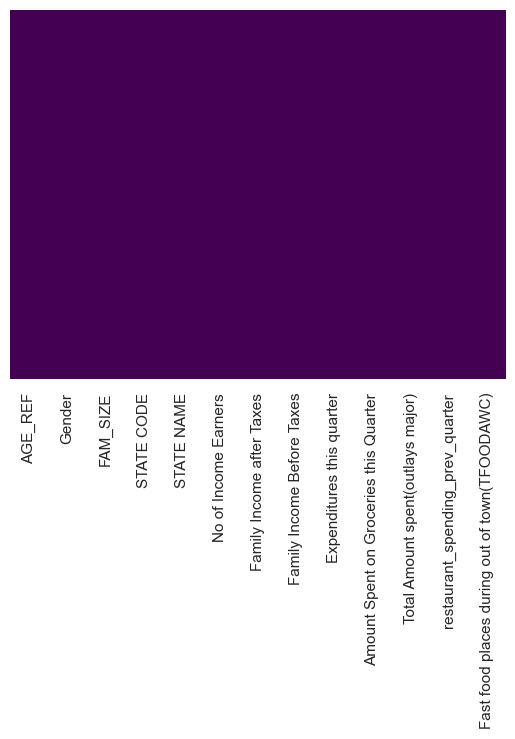

In [32]:
# Visualize missing values in the DataFrame using a heatmap with 'viridis' colormap, 
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

### Handling Negative values in the columns

In [33]:
numeric_columns = df.select_dtypes(include='number').columns

# Check for negative values in each numeric column
for column in numeric_columns:
    has_negative = (df[column] < 0).any()
    if has_negative:
        print(f"Column '{column}' has negative values.")

Column 'Family Income after Taxes' has negative values.
Column 'Family Income Before Taxes' has negative values.


In [34]:
df.loc[df['Family Income after Taxes'] < 0 ,'Family Income after Taxes'] = 0
df.loc[df['Family Income Before Taxes'] < 0 ,'Family Income Before Taxes'] = 0

### Data Quality Report After Data Cleaning

In [35]:
df.dtypes

AGE_REF                                             int64
Gender                                           category
FAM_SIZE                                            int64
STATE CODE                                       category
STATE NAME                                         object
No of Income Earners                                int64
Family Income after Taxes                         float64
Family Income Before Taxes                          int64
Expenditures this quarter                         float64
Amount Spent on Groceries this Quarter            float64
Total Amount spent(outlays major)                 float64
restaurant_spending_prev_quarter                  float64
Fast food places during out of town(TFOODAWC)       int64
dtype: object

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4415 entries, 0 to 4806
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   AGE_REF                                        4415 non-null   int64   
 1   Gender                                         4415 non-null   category
 2   FAM_SIZE                                       4415 non-null   int64   
 3   STATE CODE                                     4415 non-null   category
 4   STATE NAME                                     4415 non-null   object  
 5   No of Income Earners                           4415 non-null   int64   
 6   Family Income after Taxes                      4415 non-null   float64 
 7   Family Income Before Taxes                     4415 non-null   int64   
 8   Expenditures this quarter                      4415 non-null   float64 
 9   Amount Spent on Groceries this Quarter   

### Descriptive Statistics of the dataset 

In [37]:
#basic statistics to identify potential outliers
Descriptive_stats = df.describe()
Descriptive_stats

AGE_REF     FAM_SIZE  No of Income Earners  \
count  4415.000000  4415.000000           4415.000000   
mean     53.556059     2.343601              1.258437   
std      17.768599     1.447445              1.004760   
min      16.000000     1.000000              0.000000   
25%      39.000000     1.000000              0.000000   
50%      54.000000     2.000000              1.000000   
75%      68.000000     3.000000              2.000000   
max      87.000000    13.000000              8.000000   

       Family Income after Taxes  Family Income Before Taxes  \
count                4415.000000                4.415000e+03   
mean                90377.304009                8.892845e+04   
std                 77073.938633                1.014752e+05   
min                     0.000000                0.000000e+00   
25%                 36764.000000                2.400000e+04   
50%                 69291.200000                5.948000e+04   
75%                119569.000000                1.200000e+05   
max                683154.600000                1.189674e+06   

       Expenditures this quarter  Amount Spent on Groceries this Quarter  \
count                4415.000000                             4415.000000   
mean                12802.995113                             1255.406720   
std                 14199.815584                             1028.362413   
min                    20.000000                                0.000000   
25%                  5020.500000                              541.666700   
50%                  9131.900100                              975.000000   
75%                 15740.083300                             1648.833350   
max                357008.188100                            11349.000000   

       Total Amount spent(outlays major)  restaurant_spending_prev_quarter  \
count                        4415.000000                       4415.000000   
mean                        13028.898468                        631.134542   
std                         13910.011181                       1050.487782   
min                            20.000000                          0.000000   
25%                          5271.792000                        108.333300   
50%                          9542.000000                        366.666700   
75%                         16471.463500                        800.000000   
max                        362342.188000                      32910.000000   

       Fast food places during out of town(TFOODAWC)  
count                                    4415.000000  
mean                                       34.207928  
std                                       184.525852  
min                                         0.000000  
25%                                         0.000000  
50%                                         0.000000  
75%                                         0.000000  
max                                      5514.000000

### Outliers

In [38]:
# Function to find outliers using IQR method
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers.tolist()

# Find outliers for numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
outliers = {}
for column in numerical_columns:
    column_outliers = find_outliers(column)
    if column_outliers:
        outliers[column] = column_outliers

# Print outliers found in numerical columns
for column, values in outliers.items():
    print(f"Outliers in column '{column}': {values}")

Outliers in column 'FAM_SIZE': [7, 7, 8, 8, 8, 7, 7, 8, 7, 7, 10, 7, 7, 8, 7, 8, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 8, 9, 13, 7, 8, 8, 7, 7, 7, 7, 10, 8, 8, 7, 7, 8, 11, 8, 7, 7, 7, 7, 11, 10, 9, 7, 7, 7, 7, 7, 7, 8, 10, 7, 8, 7]
Outliers in column 'No of Income Earners': [6, 8]
Outliers in column 'Family Income after Taxes': [349718.3, 427821.8, 282590.8, 303086.9, 278341.5, 294364.9, 253181.0, 244593.0, 252362.4, 329335.9, 379319.9, 275213.9, 310035.9, 533950.6, 326910.5, 259542.0, 338495.9, 271784.9, 368006.7, 328177.9, 257894.0, 293132.8, 256351.8, 324127.8, 262897.4, 344503.9, 271714.9, 262606.0, 615271.4, 305363.9, 301967.0, 379269.9, 434186.8, 274098.9, 245815.9, 321263.9, 253940.1, 262401.9, 245348.9, 247062.3, 296620.9, 347300.1, 251642.9, 275641.5, 334825.9, 250553.9, 293886.5, 414063.4, 325123.6, 365150.0, 302098.7, 454894.7, 276604.9, 273455.8, 271734.1, 269288.9, 330651.5, 247827.7, 444647.8, 288267.5, 331392.7, 279612.9, 251568.0, 385070.1, 312263.9, 253836.9, 289056.7, 393491

In [39]:
def calculate_numerical_outliers(column):
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return outliers
    else:
        return pd.Series(dtype=column.dtype)

def calculate_numerical_outlier_percentage(df):
    outlier_percentage = {}
    for column in df.columns:
        outliers = calculate_numerical_outliers(df[column])
        if not outliers.empty:
            outlier_percentage[column] = len(outliers) / len(df[column]) * 100
    return outlier_percentage

outlier_percentage = calculate_numerical_outlier_percentage(df)


In [40]:
# Outliers percentage for each feature

for column, percentage in {key: value for key, value in outlier_percentage.items() if value != 0.0}.items():
     print(f"{column}: {percentage:.2f}%")

FAM_SIZE: 1.40%
No of Income Earners: 0.05%
Family Income after Taxes: 5.41%
Family Income Before Taxes: 5.41%
Expenditures this quarter: 6.52%
Amount Spent on Groceries this Quarter: 4.53%
Total Amount spent(outlays major): 5.48%
restaurant_spending_prev_quarter: 6.61%
Fast food places during out of town(TFOODAWC): 9.78%


### Histograms of key independent variables

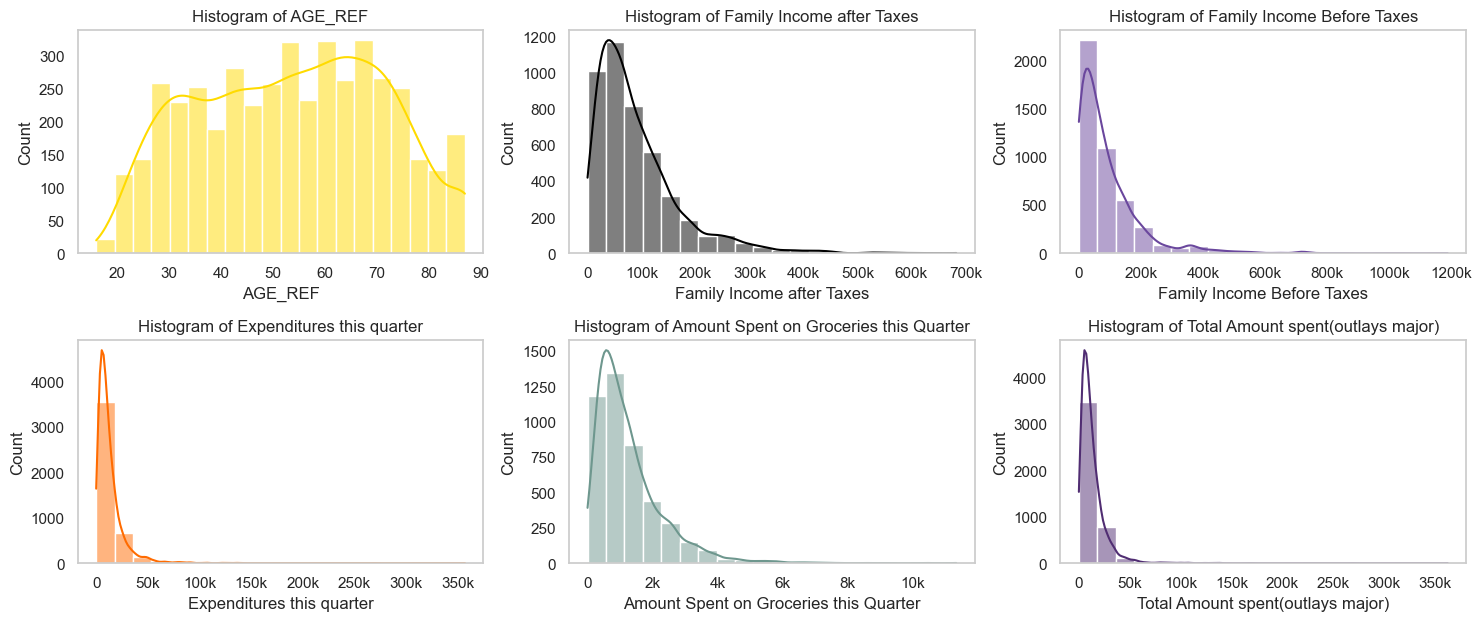

In [41]:
from matplotlib.ticker import FuncFormatter

# Define a function to format x-axis ticks
def format_ticks(x, pos):
    if x >= 1000:
        return f'{int(x/1000)}k'
    else:
        return int(x)

# Set up the figure with subplots
plt.figure(figsize=(15, 9))

# Histogram for AGE_REF
plt.subplot(3, 3, 1)
sns.histplot(df['AGE_REF'], bins=20, kde=True, color='#ffdb00')
plt.title('Histogram of AGE_REF')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.grid(False)

# Histogram for Family Income after Taxes
plt.subplot(3, 3, 2)
sns.histplot(df['Family Income after Taxes'], bins=20, kde=True, color='#000000')
plt.title('Histogram of Family Income after Taxes')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.grid(False)


# Histogram for Family Income Before Taxes
plt.subplot(3, 3, 3)
sns.histplot(df['Family Income Before Taxes'], bins=20, kde=True, color='#6a479d')
plt.title('Histogram of Family Income Before Taxes')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.grid(False)


# Histogram for Expenditures this quarter
plt.subplot(3, 3, 4)
sns.histplot(df['Expenditures this quarter'], bins=20, kde=True, color='#ff6b00')
plt.title('Histogram of Expenditures this quarter')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.grid(False)


# Histogram for Amount Spent on Groceries this Quarter
plt.subplot(3, 3, 5)
sns.histplot(df['Amount Spent on Groceries this Quarter'], bins=20, kde=True, color='#6e978e')
plt.title('Histogram of Amount Spent on Groceries this Quarter')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.grid(False)


# Histogram for Total Amount spent(outlays major)
plt.subplot(3, 3, 6)
sns.histplot(df['Total Amount spent(outlays major)'], bins=20, kde=True, color='#502d72')
plt.title('Histogram of Total Amount spent(outlays major)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### Histogram Distribution of dependent variable

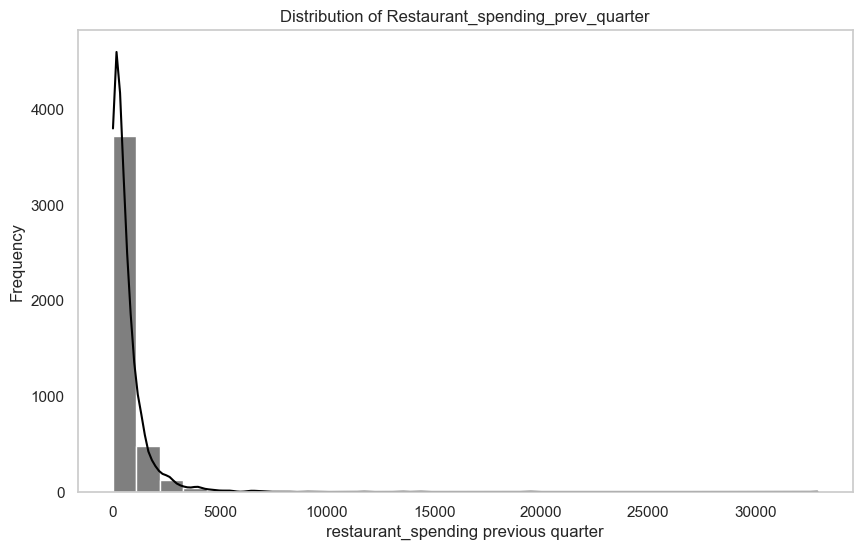

In [42]:
# Visualizing the distribution of "Restaurant_spending_prev_quarter"
plt.figure(figsize=(10, 6))
sns.histplot(df['restaurant_spending_prev_quarter'], kde=True, bins=30, color='000000')
plt.title('Distribution of Restaurant_spending_prev_quarter')
plt.xlabel('restaurant_spending previous quarter')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

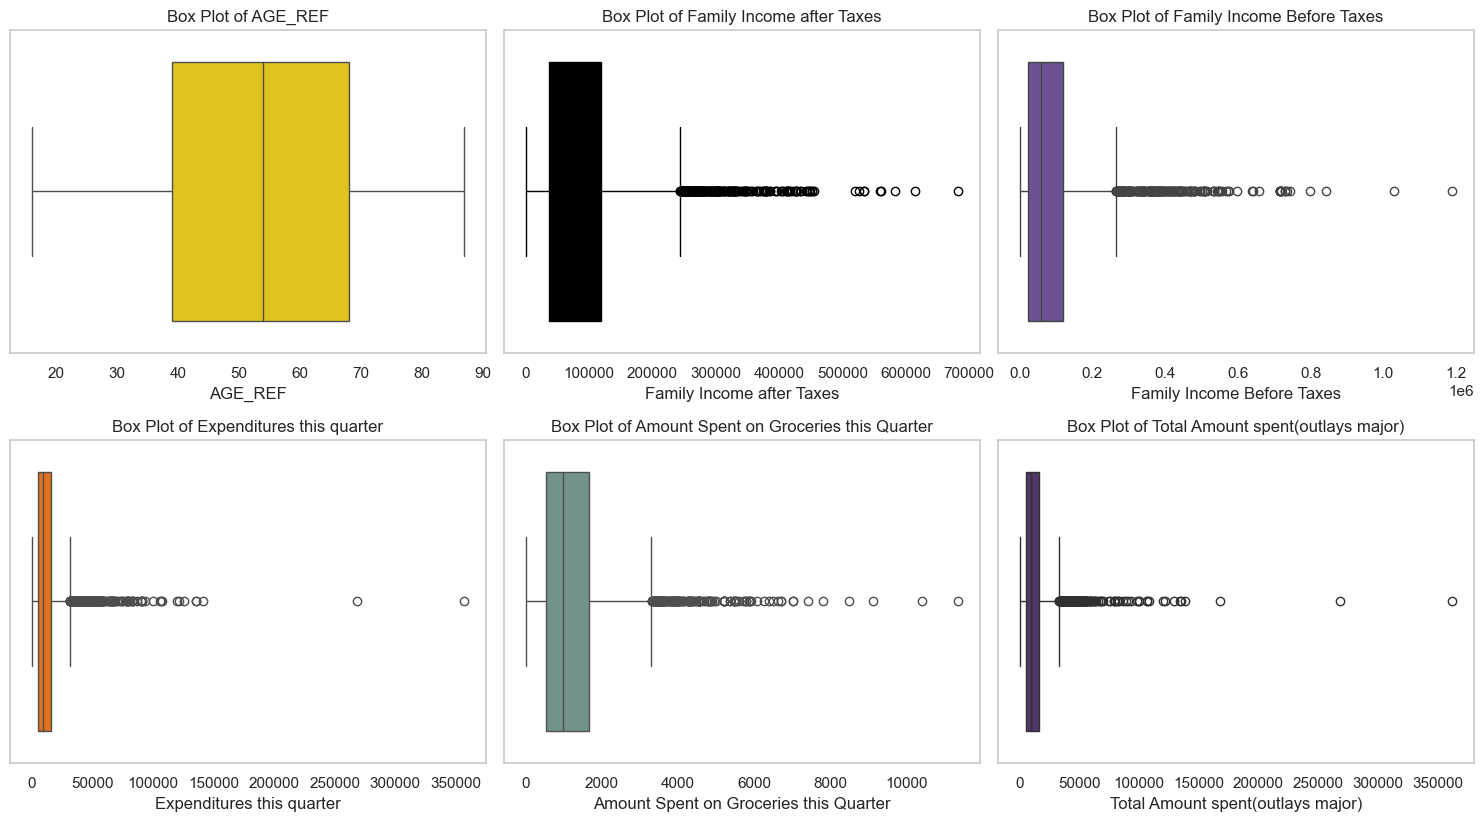

In [43]:

# Set up the figure with subplots
plt.figure(figsize=(15, 12))

# Box plot for AGE_REF
plt.subplot(3, 3, 1)
sns.boxplot(x=df['AGE_REF'], color='#ffdb00')
plt.title('Box Plot of AGE_REF')
plt.grid(False)

# Box plot for Family Income after Taxes
plt.subplot(3, 3, 2)
sns.boxplot(x=df['Family Income after Taxes'], color='#000000')
plt.title('Box Plot of Family Income after Taxes')
plt.grid(False)

# Box plot for Family Income Before Taxes
plt.subplot(3, 3, 3)
sns.boxplot(x=df['Family Income Before Taxes'], color='#6a479d')
plt.title('Box Plot of Family Income Before Taxes')
plt.grid(False)

# Box plot for Expenditures this quarter
plt.subplot(3, 3, 4)
sns.boxplot(x=df['Expenditures this quarter'], color='#ff6b00')
plt.title('Box Plot of Expenditures this quarter')
plt.grid(False)

# Box plot for Amount Spent on Groceries this Quarter
plt.subplot(3, 3, 5)
sns.boxplot(x=df['Amount Spent on Groceries this Quarter'], color='#6e978e')
plt.title('Box Plot of Amount Spent on Groceries this Quarter')
plt.grid(False)

# Box plot for Total Amount spent(outlays major)
plt.subplot(3, 3, 6)
sns.boxplot(x=df['Total Amount spent(outlays major)'], color='#502d72')
plt.title('Box Plot of Total Amount spent(outlays major)')
plt.grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


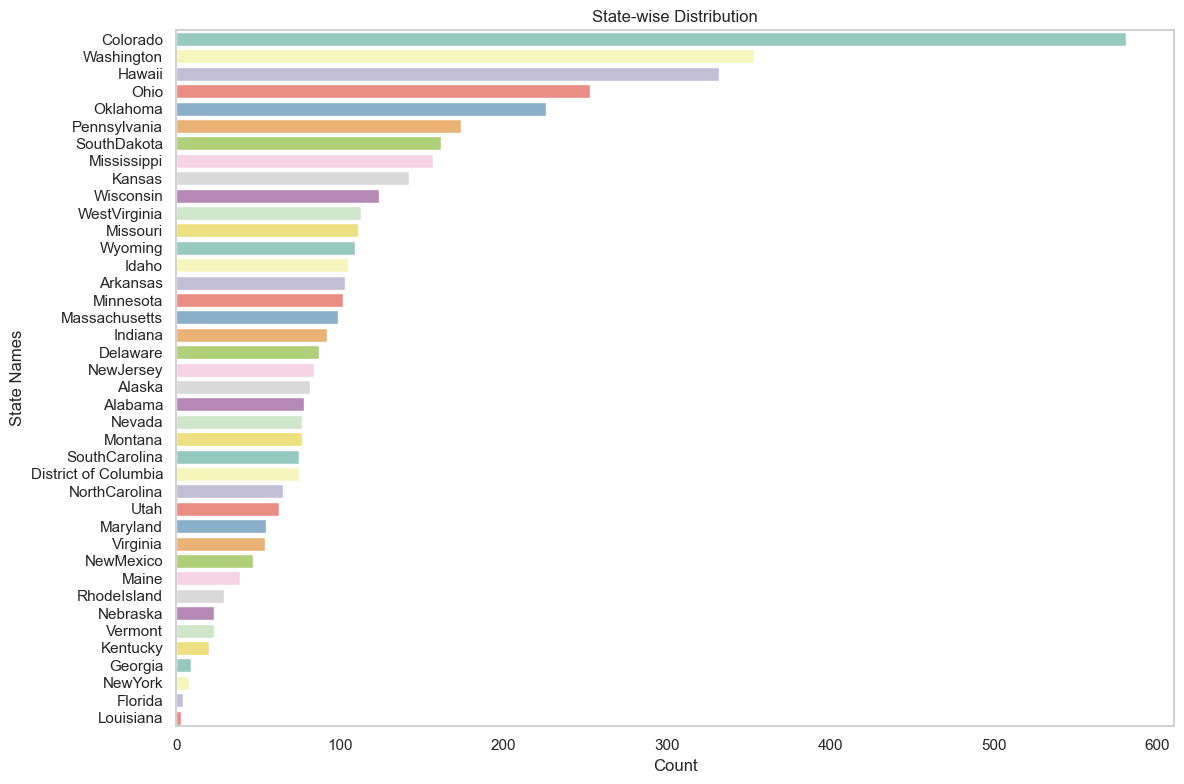

In [44]:

# Calculate state-wise counts
state_counts = df['STATE NAME'].value_counts()

# Sort state counts in descending order by count
state_counts_sorted = state_counts.sort_values(ascending=False)

# Set up the figure
plt.figure(figsize=(12, 8))

# Create bar plot for state distribution with 'Set3' color palette
sns.barplot(x=state_counts_sorted.values, y=state_counts_sorted.index, palette='Set3', hue=state_counts_sorted.index, legend=False)
plt.title('State-wise Distribution')
plt.xlabel('Count')
plt.ylabel('State Names')
plt.grid(False)
# Show plot
plt.tight_layout()
plt.show()


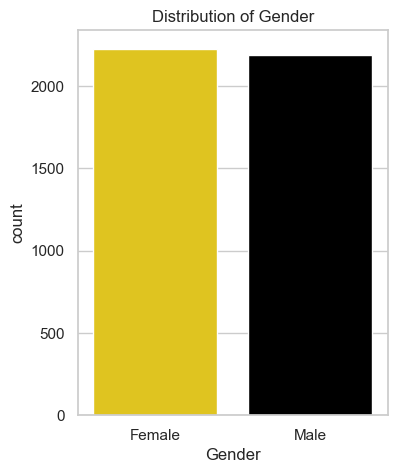

In [45]:
# Define color codes for each category
colors = ['#ffdb00', '#000000']  # Use the provided color codes for 'Male' and 'Female'

plt.figure(figsize=(4, 5))
sns.countplot(x=df['Gender'], hue=df['Gender'], palette=colors, dodge=False)
plt.title('Distribution of Gender')
plt.show()


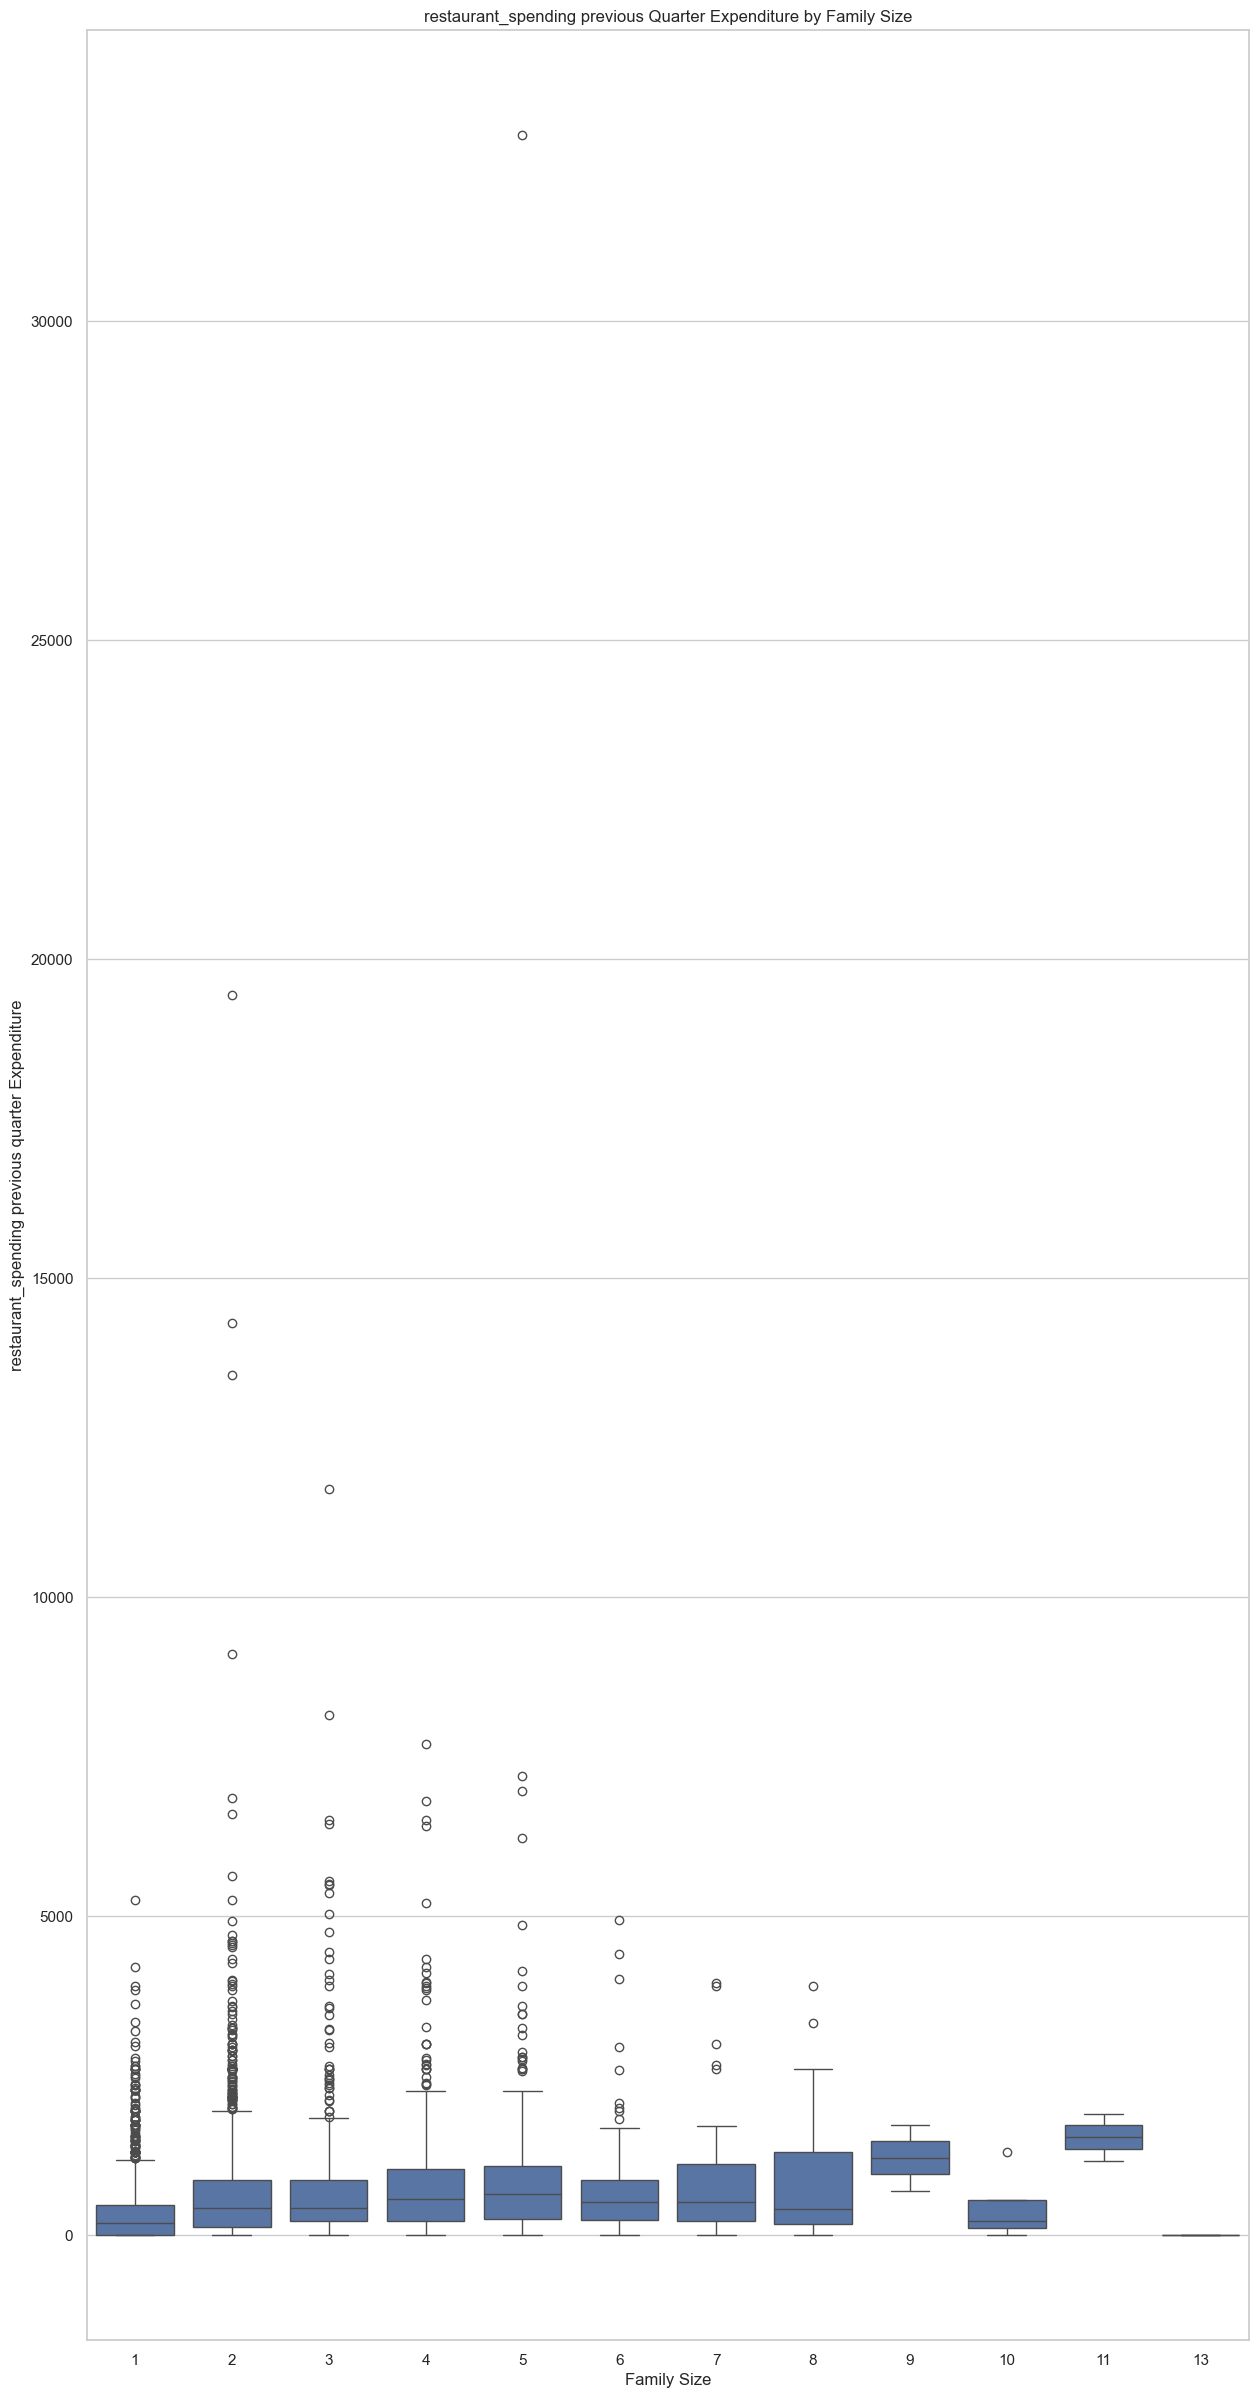

In [46]:
# Box plot for restaurant_spending previous quarter vs. Family Size
plt.figure(figsize=(15, 30))
sns.boxplot(x='FAM_SIZE', y='restaurant_spending_prev_quarter', data=df)
plt.title('restaurant_spending previous Quarter Expenditure by Family Size')
plt.xlabel('Family Size')
plt.ylabel('restaurant_spending previous quarter Expenditure')
plt.show()


## Bivariate Analysis

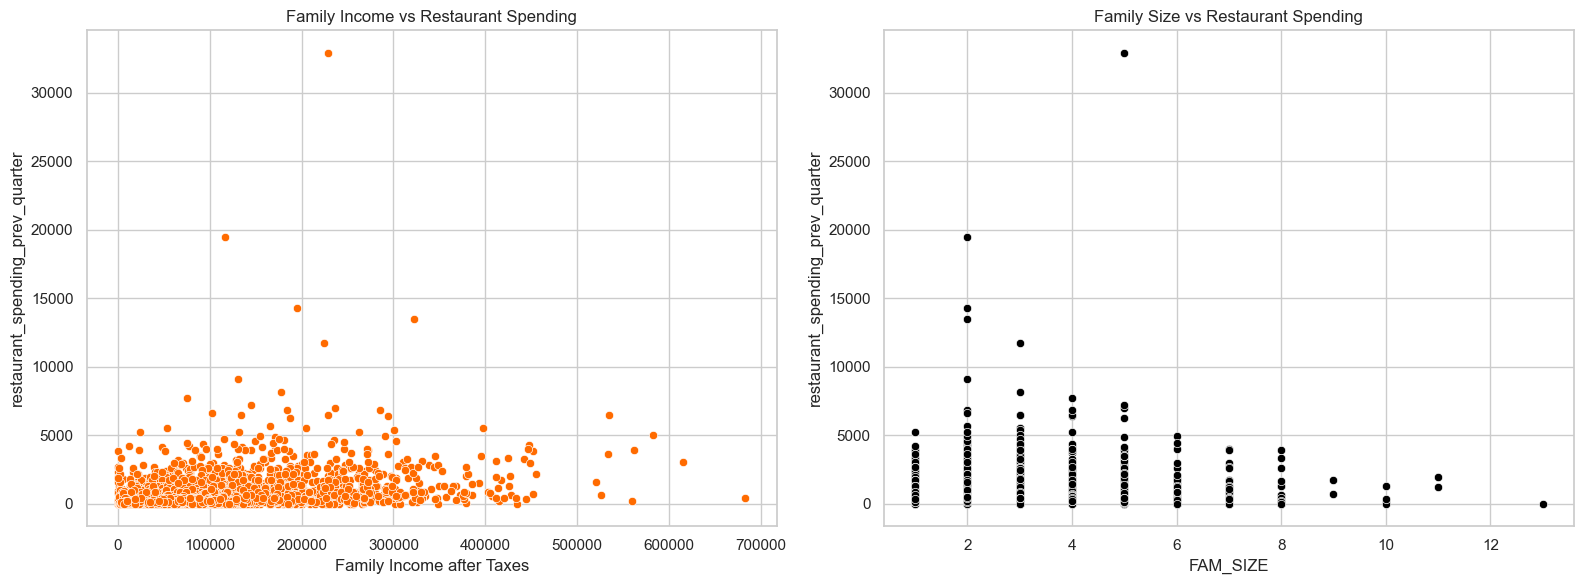

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Adjust the grid to 1x2

# Plot 1: Family Income after Taxes vs restaurant_spending_prev_quarter
sns.scatterplot(data=df, x='Family Income after Taxes', y='restaurant_spending_prev_quarter', ax=axs[0], color = '#ff6b00')
axs[0].set_title('Family Income vs Restaurant Spending')

# Plot 2: FAM_SIZE vs restaurant_spending_prev_quarter
sns.scatterplot(data=df, x='FAM_SIZE', y='restaurant_spending_prev_quarter', ax=axs[1], color = '#000000')
axs[1].set_title('Family Size vs Restaurant Spending')

plt.tight_layout()
plt.show()

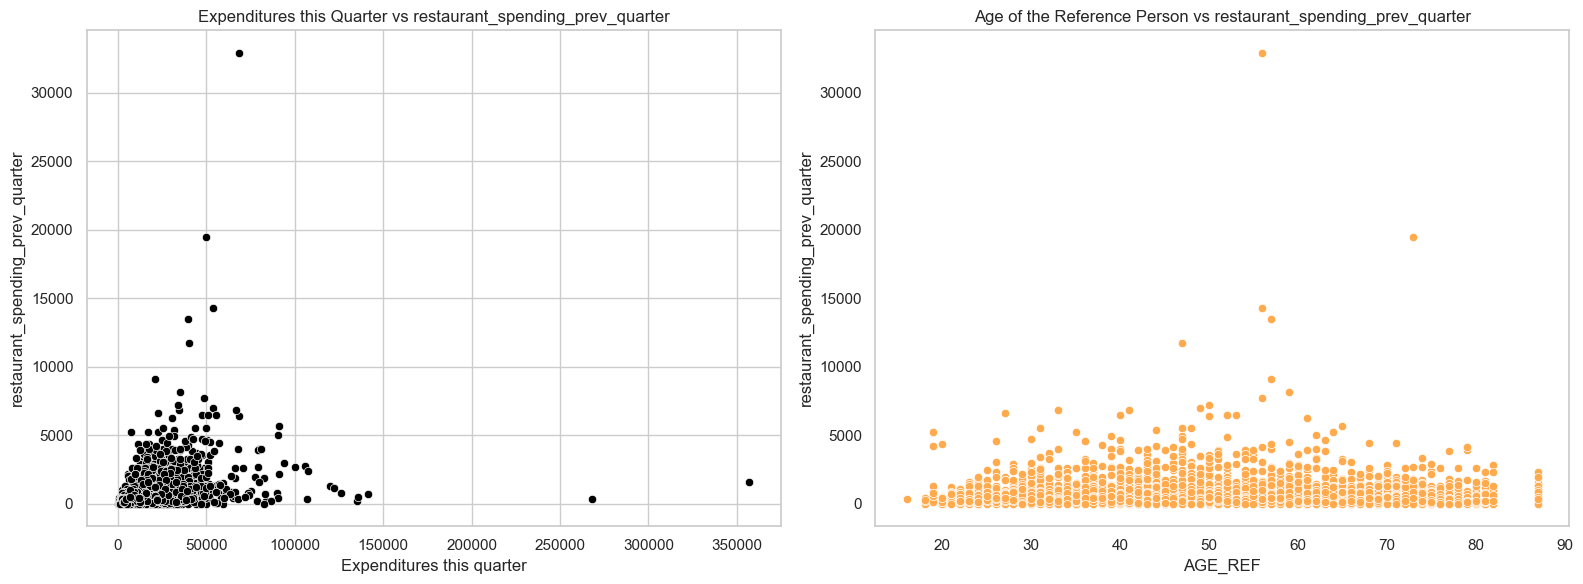

In [48]:
# 'Expenditures this quarter' vs 'restaurant_spending previous quarter'
# 'AGE_REF' (Age of the Reference Person) vs 'restaurant_spending previous quarter'


# Creating a figure to hold the subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Scatterplot for 'Expenditures this quarter' vs 'restaurant_spending previous quarter'
sns.scatterplot(data=df, x='Expenditures this quarter', y='restaurant_spending_prev_quarter', ax=axs[0], color = '#000000')
axs[0].set_title('Expenditures this Quarter vs restaurant_spending_prev_quarter')


# Scatterplot for 'AGE_REF' vs 'restaurant_spending previous quarter'
sns.scatterplot(data=df, x='AGE_REF', y='restaurant_spending_prev_quarter', ax=axs[1], color = '#ffaa4d')
axs[1].set_title('Age of the Reference Person vs restaurant_spending_prev_quarter')
plt.grid(False)
plt.tight_layout()
plt.show()


### Correlation Matrix

In [49]:

# Filter numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Generating the correlation matrix
corr_matrix = numeric_df.corr()
corr_matrix

AGE_REF  FAM_SIZE  \
AGE_REF                                        1.000000 -0.264944   
FAM_SIZE                                      -0.264944  1.000000   
No of Income Earners                          -0.429921  0.599889   
Family Income after Taxes                     -0.147419  0.393387   
Family Income Before Taxes                    -0.135619  0.257518   
Expenditures this quarter                     -0.041575  0.187854   
Amount Spent on Groceries this Quarter        -0.067710  0.387669   
Total Amount spent(outlays major)             -0.032737  0.217099   
restaurant_spending_prev_quarter              -0.094208  0.157291   
Fast food places during out of town(TFOODAWC) -0.030663  0.034287   

                                               No of Income Earners  \
AGE_REF                                                   -0.429921   
FAM_SIZE                                                   0.599889   
No of Income Earners                                       1.000000   
Family Income after Taxes                                  0.529568   
Family Income Before Taxes                                 0.383430   
Expenditures this quarter                                  0.237288   
Amount Spent on Groceries this Quarter                     0.287343   
Total Amount spent(outlays major)                          0.263262   
restaurant_spending_prev_quarter                           0.212765   
Fast food places during out of town(TFOODAWC)              0.067904   

                                               Family Income after Taxes  \
AGE_REF                                                        -0.147419   
FAM_SIZE                                                        0.393387   
No of Income Earners                                            0.529568   
Family Income after Taxes                                       1.000000   
Family Income Before Taxes                                      0.863557   
Expenditures this quarter                                       0.477193   
Amount Spent on Groceries this Quarter                          0.317108   
Total Amount spent(outlays major)                               0.526549   
restaurant_spending_prev_quarter                                0.338827   
Fast food places during out of town(TFOODAWC)                   0.137468   

                                               Family Income Before Taxes  \
AGE_REF                                                         -0.135619   
FAM_SIZE                                                         0.257518   
No of Income Earners                                             0.383430   
Family Income after Taxes                                        0.863557   
Family Income Before Taxes                                       1.000000   
Expenditures this quarter                                        0.417029   
Amount Spent on Groceries this Quarter                           0.243394   
Total Amount spent(outlays major)                                0.471462   
restaurant_spending_prev_quarter                                 0.319061   
Fast food places during out of town(TFOODAWC)                    0.126052   

                                               Expenditures this quarter  \
AGE_REF                                                        -0.041575   
FAM_SIZE                                                        0.187854   
No of Income Earners                                            0.237288   
Family Income after Taxes                                       0.477193   
Family Income Before Taxes                                      0.417029   
Expenditures this quarter                                       1.000000   
Amount Spent on Groceries this Quarter                          0.432372   
Total Amount spent(outlays major)                               0.922051   
restaurant_spending_prev_quarter                                0.410684   
Fast food places during out of town(TFOODAWC)                

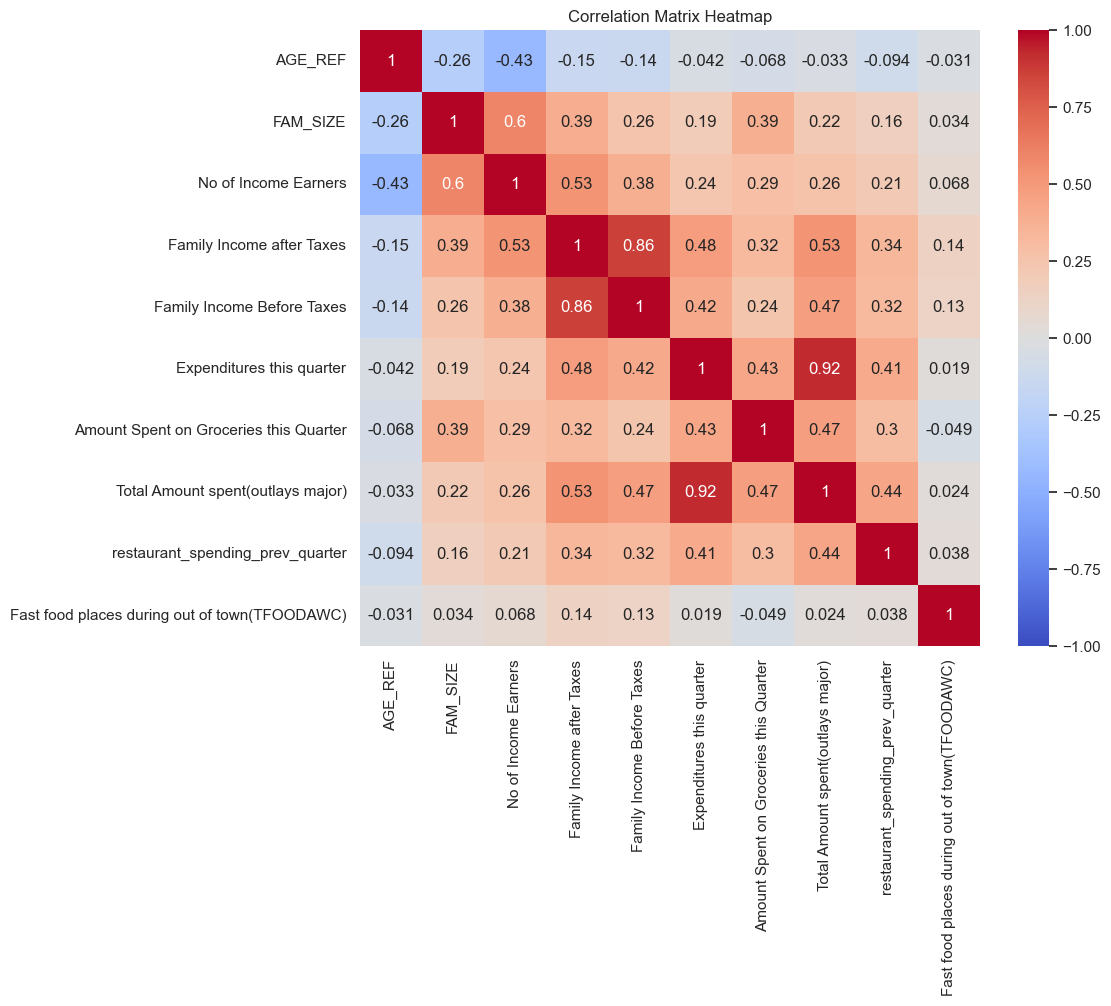

In [50]:

# Filter numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Generating the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the correlation matrix as a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Adjust size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap')
plt.show()


### Top and Least correlated variables 

In [51]:
# correlation matrix to pair variables and their correlation coefficient
corr_pairs = corr_matrix.unstack()

# Sort the pairs to identify strongest and weakest correlations
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

# Filtering out self-correlations (correlation of a variable with itself)
filtered_pairs = sorted_pairs[sorted_pairs.index.get_level_values(0) != sorted_pairs.index.get_level_values(1)]

# Identifying the top 3 strongest positive correlations
top3_positive = filtered_pairs[filtered_pairs > 0].tail(3)

# Identifying the top 3 strongest negative correlations
top3_negative = filtered_pairs[filtered_pairs < 0].head(3)

# Identifying the least 3 positive correlations (excluding zeros)
least3_positive = filtered_pairs[(filtered_pairs > 0) & (filtered_pairs < 1)].head(3)

# Identifying the least 3 negative correlations
least3_negative = filtered_pairs[filtered_pairs < 0].tail(3)

print("top 3 positively correlated variables ")
print(top3_positive)
print("\n")
print("top 3 negative correlated variables")
print(top3_negative)
print("\n")
print("least 3 positive correlated variables ")
print(least3_positive)
print("\n")
print("least 3 negative correlated variables")
print(least3_negative)


top 3 positively correlated variables 
Family Income after Taxes          Family Income Before Taxes           0.863557
Expenditures this quarter          Total Amount spent(outlays major)    0.922051
Total Amount spent(outlays major)  Expenditures this quarter            0.922051
dtype: float64


top 3 negative correlated variables
AGE_REF               No of Income Earners   -0.429921
No of Income Earners  AGE_REF                -0.429921
AGE_REF               FAM_SIZE               -0.264944
dtype: float64


least 3 positive correlated variables 
Expenditures this quarter                      Fast food places during out of town(TFOODAWC)    0.019020
Fast food places during out of town(TFOODAWC)  Expenditures this quarter                        0.019020
Total Amount spent(outlays major)              Fast food places during out of town(TFOODAWC)    0.024399
dtype: float64


least 3 negative correlated variables
Total Amount spent(outlays major)              AGE_REF                    

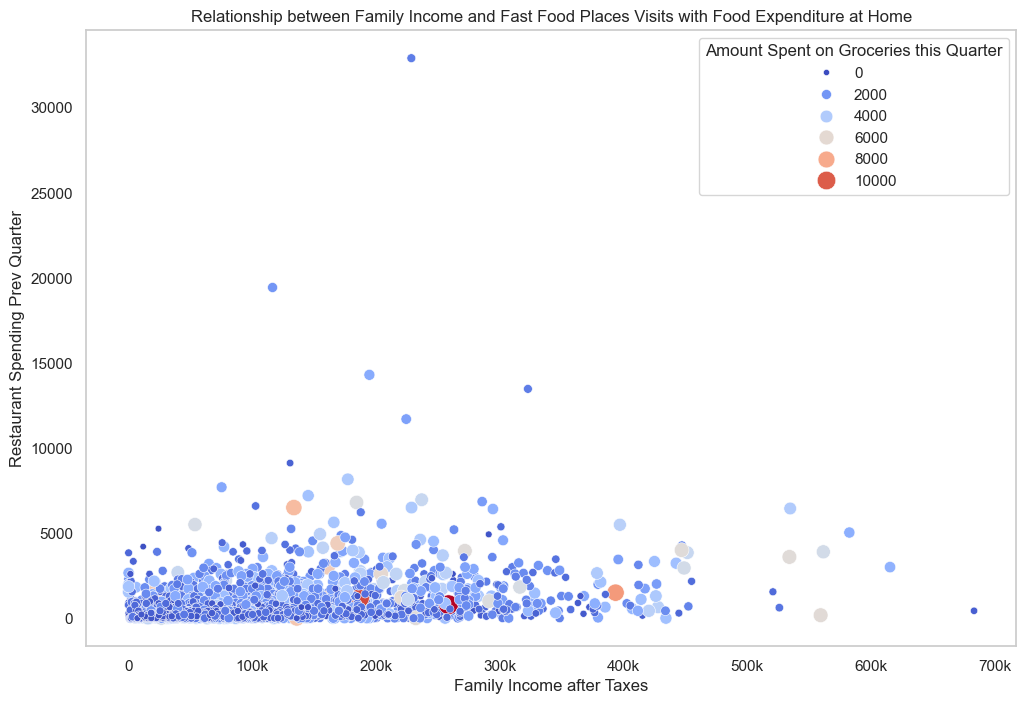

In [52]:
# Creating a scatter plot to show the relationship between family income and fast food places visits,
# with the hue indicating food at home expenditure

import matplotlib.ticker as ticker

# Function to format x-axis labels
def format_xticks(x, pos):
    """
    Function to format x-axis labels such that 1000 is displayed as "1k".
    """
    if x >= 1000:
        return f'{x/1000:.0f}k'
    else:
        return int(x)

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=df, x='Family Income after Taxes', y='restaurant_spending_prev_quarter',
                               size='Amount Spent on Groceries this Quarter', hue='Amount Spent on Groceries this Quarter', palette="coolwarm", sizes=(20, 200))
plt.title('Relationship between Family Income and Fast Food Places Visits with Food Expenditure at Home')
plt.xlabel('Family Income after Taxes')

# Formatting x-axis labels
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))

plt.ylabel('Restaurant Spending Prev Quarter')
plt.legend(title='Amount Spent on Groceries this Quarter', loc='upper right')
plt.grid(False)
plt.show()


## pair plots

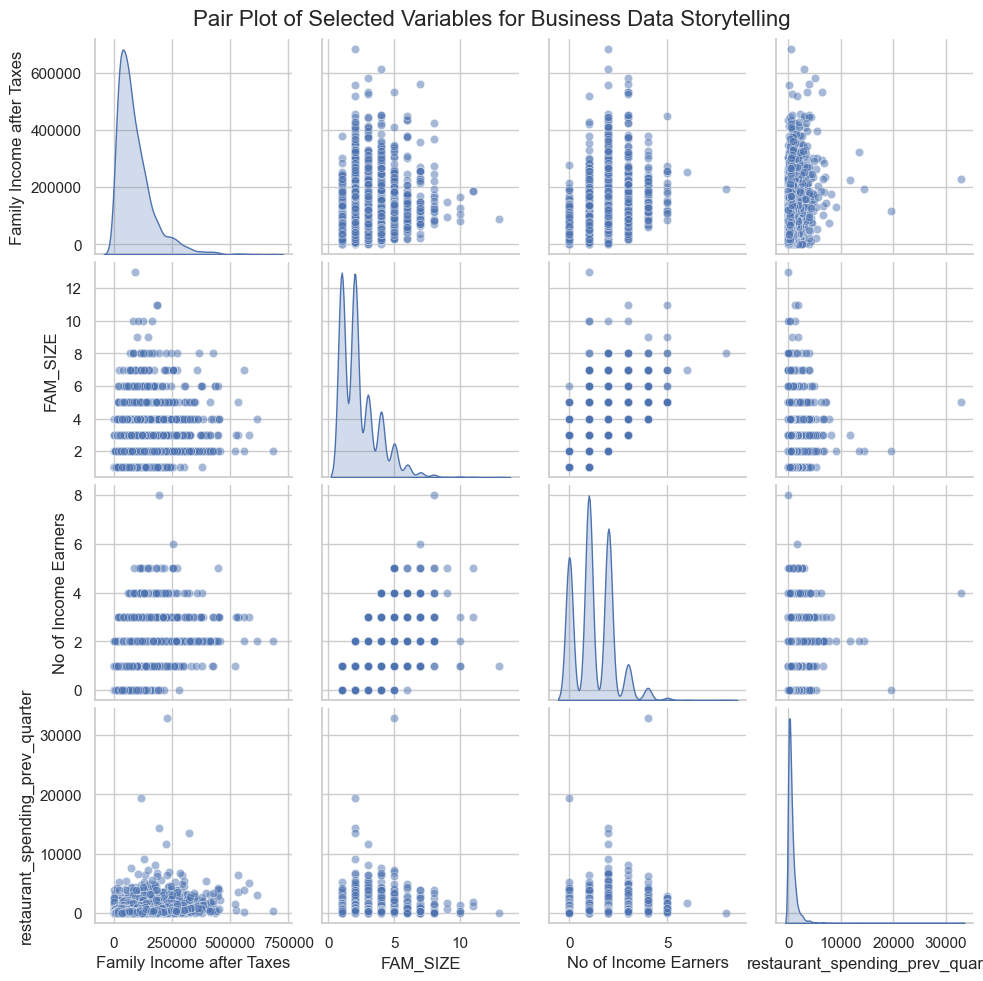

In [53]:
#create a pair plot for the selected variables including the dependent variable
# to visualize the interactions between them

# Selecting the variables for the pair plot
storytelling_vars = [
    'Family Income after Taxes',
    'FAM_SIZE',
    'No of Income Earners',
    'restaurant_spending_prev_quarter'
]

# Creating the pair plot
pair_plot_data = df[storytelling_vars]
sns.pairplot(pair_plot_data, kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Selected Variables for Business Data Storytelling', size=16)
plt.subplots_adjust(top=0.95)
plt.show()

# Feature Engineering

In [54]:
os.chdir("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\\01 MASTER FILES\\1. Code & datasets")
df1 =pd.read_excel('New Updated Feature Engineering.xlsx')

### Removing columns that are not contributing much and are not relavant

In [55]:

df1.drop(["Expenditures this quarter","STATE CODE","Family Income Before Taxes","Total Amount spent(outlays major)","Fast food places during out of town(TFOODAWC)"], axis=1, inplace=True)

### Assigning U.S. States to Geographic Regions Using Binning Techniques

In [56]:
regions = {
    'Northeast': ['Maine', 'Massachusetts', 'RhodeIsland', 'Vermont', 'NewJersey', 
                  'NewYork', 'Pennsylvania'],
    'Midwest': ['Indiana', 'Ohio', 'Wisconsin', 'Kansas', 'Minnesota', 'Missouri', 
                'Nebraska', 'NorthDakota', 'SouthDakota'],
    'Southeast': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'NorthCarolina', 'SouthCarolina', 'Virginia', 
                  'District of Columbia', 'WestVirginia', 'Kentucky', 'Mississippi', 'Arkansas', 
                  'Louisiana', 'Oklahoma'],
    'Southwest': ['Colorado', 'Idaho', 'Montana', 'Nevada', 'NewMexico', 'Utah', 'Wyoming'],
    'West': ['Alaska', 'Hawaii', 'Washington']
}

# function to map each state to its region
def map_state_to_region(state):
    for region, states in regions.items():
        if state in states:
            return region


# Creating the column Region to the dataset
df1['Region'] = df1['STATE NAME'].apply(map_state_to_region)

### Categorical Encoding to Gender

In [57]:
df1['SEX_CATEGORICAL'] = df1['Gender'].map({'Male': 1, 'Female': 2})

In [58]:
df1.head()

AGE_REF  Gender  FAM_SIZE    STATE NAME  No of Income Earners  \
0       87  Female         3      Oklahoma                     1   
1       73  Female         2          Ohio                     0   
2       47  Female         2  Pennsylvania                     2   
3       82  Female         1         Maine                     0   
4       87    Male         2      Delaware                     0   

   Family Income after Taxes  Amount Spent on Groceries this Quarter  \
0                   57240.20                                  2212.0   
1                   55570.00                                  1690.0   
2                  145387.00                                  1300.0   
3                  248819.03                                   910.0   
4                   50481.00                                  1196.0   

   Other Expenditures this Quarter  SINGLE  MARRIED  AGE 1-25  AGE 25-50  \
0                        8457.1001       0        1         0          0   
1                        9744.2500       0        2         0          0   
2                       22899.7501       0        2         0          2   
3                        7115.0000       0        1         0          0   
4                        8171.0000       0        2         0          0   

   AGE 50+  restaurant_spending_prev_quarter     Region  SEX_CATEGORICAL  
0        3                             931.0  Southeast                2  
1        2                               0.0    Midwest                2  
2        0                            1140.0  Northeast                2  
3        1                             780.0  Northeast                2  
4        2                             650.0  Southeast                1

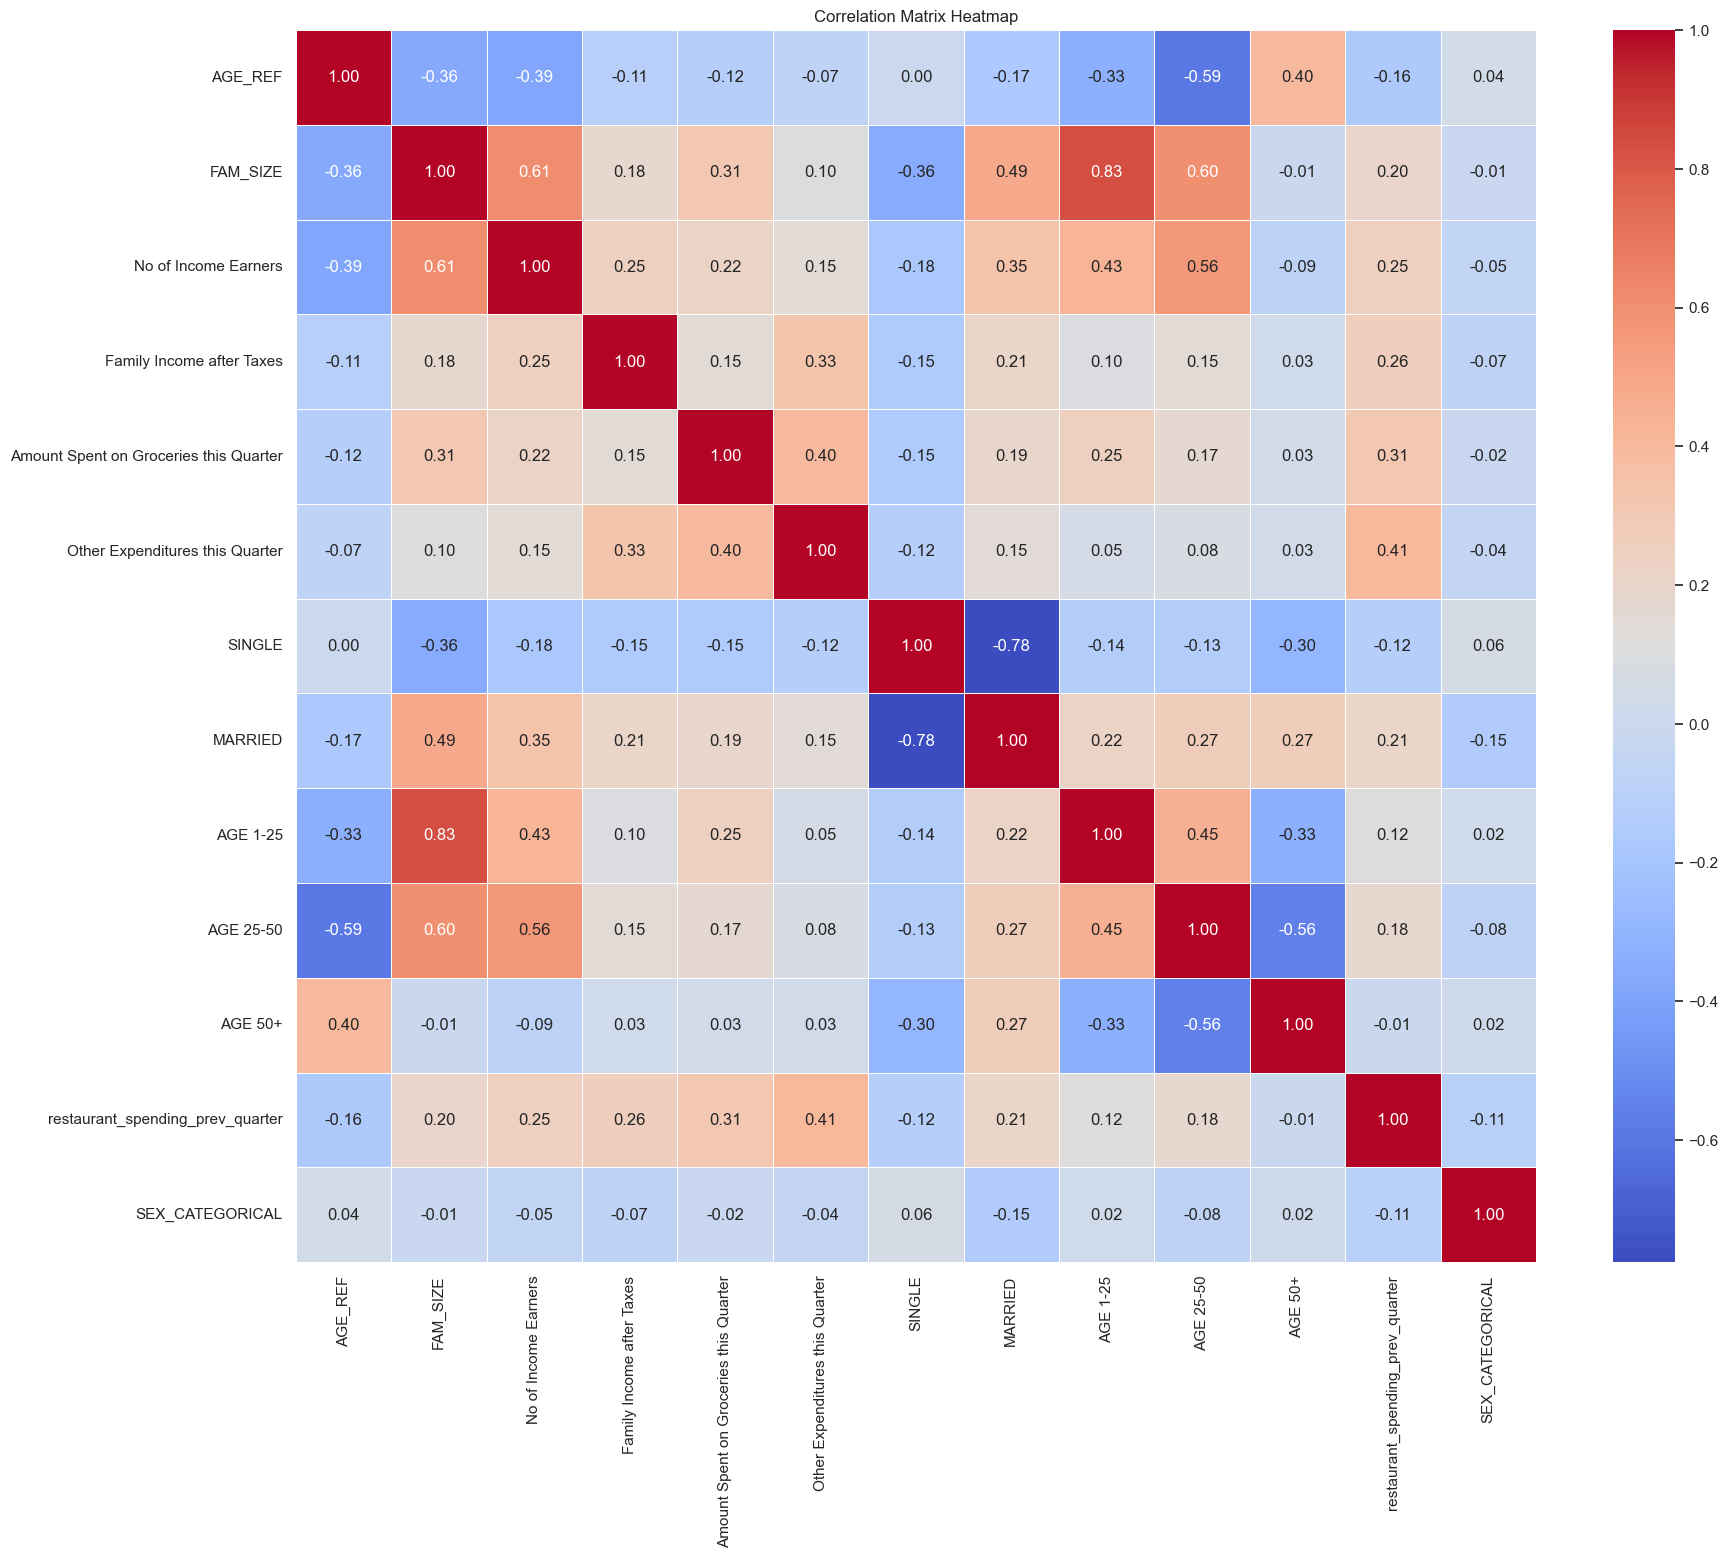

In [59]:
# Filter numeric columns only
numeric_df1 = df1.select_dtypes(include=[np.number])

# Generating the correlation matrix
corr_matrix = numeric_df1.corr()

# Plotting the correlation matrix as a heatmap using Seaborn
plt.figure(figsize=(20, 16))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()


### Correlation Matrix with Dependent Variable - Restaurant_spending previous quarter

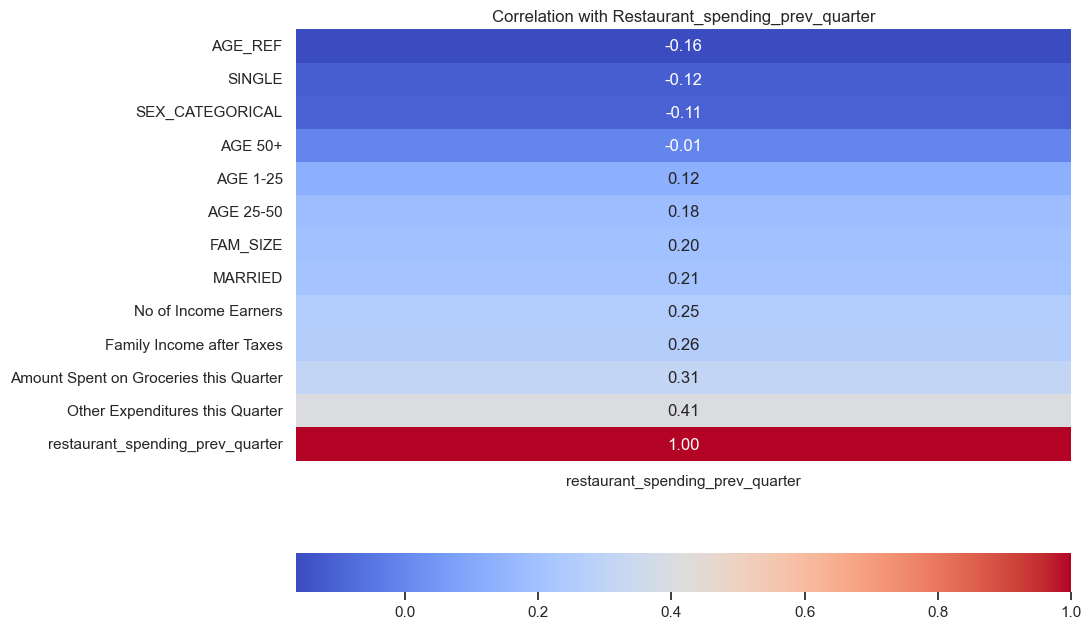

In [60]:
# correlations with 'Restaurant_spending_prev_quarter - dependent variable
fdawaypq_correlation = numeric_df1.corr()['restaurant_spending_prev_quarter'].sort_values()

# Convert series to DataFrame for heatmap visuals
fdawaypq_correlation_df = fdawaypq_correlation.to_frame()  # Converting to DataFrame for heatmap

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(fdawaypq_correlation_df, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'orientation': 'horizontal'})
plt.title('Correlation with Restaurant_spending_prev_quarter')
plt.show()


### Distribution of Dependent Variable: "Restaurant_spending_prev_quarter"

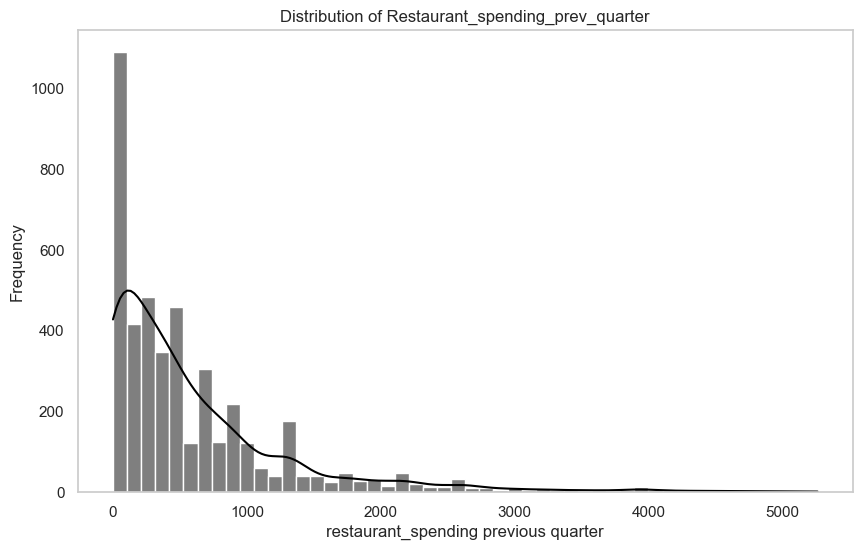

In [61]:
# Visualizing the distribution of "Restaurant_spending_prev_quarter"
plt.figure(figsize=(10, 6))
sns.histplot(df1['restaurant_spending_prev_quarter'], kde=True, bins=50, color='000000')
plt.title('Distribution of Restaurant_spending_prev_quarter')
plt.xlabel('restaurant_spending previous quarter')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()
    


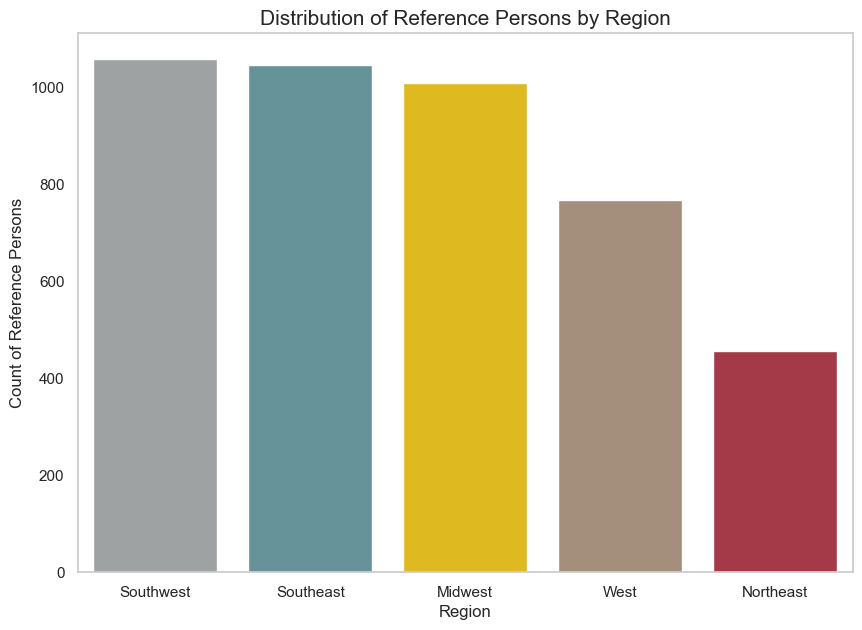

In [62]:
# Bar Chart: Distribution of reference persons by region


# Defining a custom color palette with 5 different colors
colors = ["#9ea2a2", "#5e99a1", "#ffcc00", "#aa8f75", "#b5293a"]

count_regions = df1['Region'].value_counts()

# Plotting the bar chart with the custom color palette
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=count_regions.index, y=count_regions.values, palette=colors, dodge=False, hue=count_regions.index, legend=False)
plt.title('Distribution of Reference Persons by Region', fontsize=15)
plt.xlabel('Region')
plt.ylabel('Count of Reference Persons')

# Remove legends
# ax.legend().remove()

plt.grid(False)
plt.show()


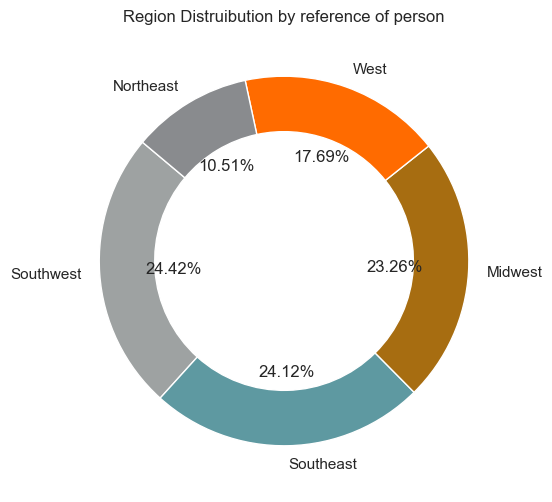

In [63]:
#Region dsitribution with reference to person

# Define colors for the pie chart
colors = ["#9ea2a2", "#5e99a1", "#a76d11", "#ff6b00", "#898b8e"]

region_dist = df1['Region'].value_counts()

plt.figure(figsize=(12, 6))
plt.pie(region_dist, labels = region_dist.index, autopct='%1.2f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))
plt.title('Region Distruibution by reference of person')
plt.show()

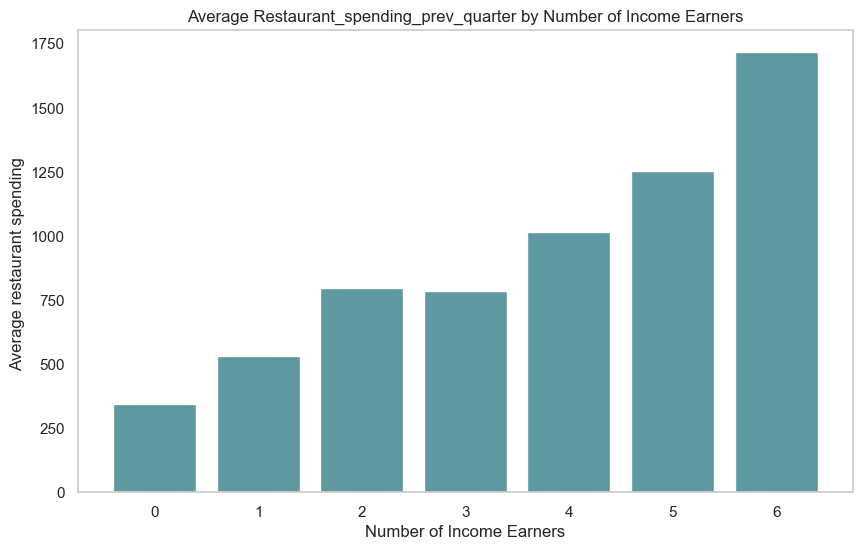

In [64]:
# Calculate Average Restaurant Spending Previous Quarter  for each number of income earners with bar chart

income_earners_categories = df1['No of Income Earners'].unique()
income_earners_categories.sort()  # Sort the categories 

avg_fdaway_per_income_earners = []
for earners in income_earners_categories:
    avg_fdaway = df1[df1['No of Income Earners'] == earners]['restaurant_spending_prev_quarter'].mean()
    avg_fdaway_per_income_earners.append(avg_fdaway)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(income_earners_categories.astype(str), avg_fdaway_per_income_earners, color='#5e99a1')
plt.title('Average Restaurant_spending_prev_quarter by Number of Income Earners')
plt.xlabel('Number of Income Earners')
plt.ylabel('Average restaurant spending ')
plt.grid(False)
plt.show() 


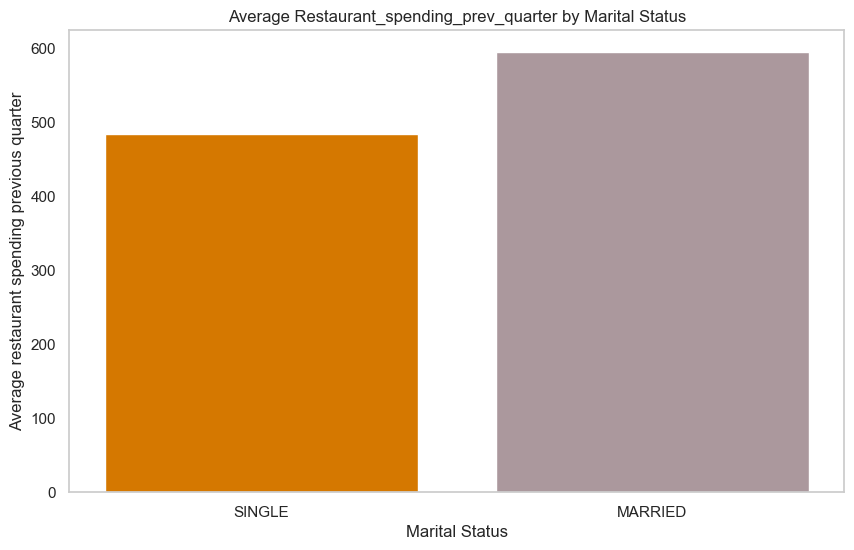

In [65]:
# Calculate average restaurant_spending previous quarter expenditure for Married and Single categories

marital_status_categories = ['SINGLE', 'MARRIED']
avg_fdaway_per_marital_status = []
for status in marital_status_categories:
    avg_fdaway = df1[df1[status] > 0]['restaurant_spending_prev_quarter'].mean()
    avg_fdaway_per_marital_status.append(avg_fdaway)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(marital_status_categories, avg_fdaway_per_marital_status, color=['#d57800', '#ab989d'])
plt.title('Average Restaurant_spending_prev_quarter by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average restaurant spending previous quarter')
plt.grid()
plt.show() 


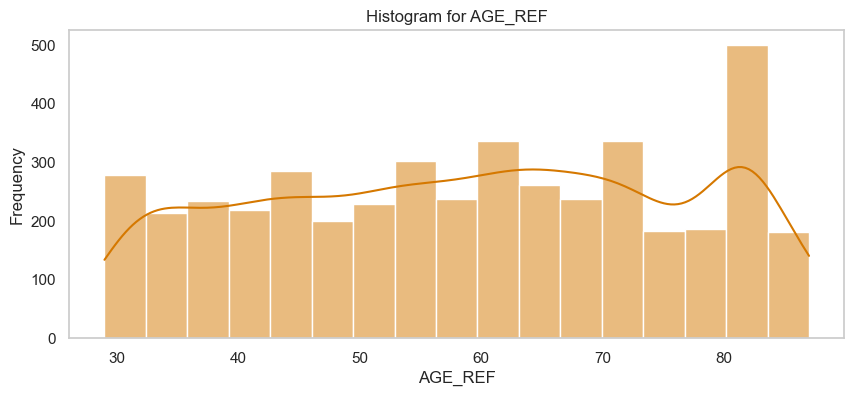

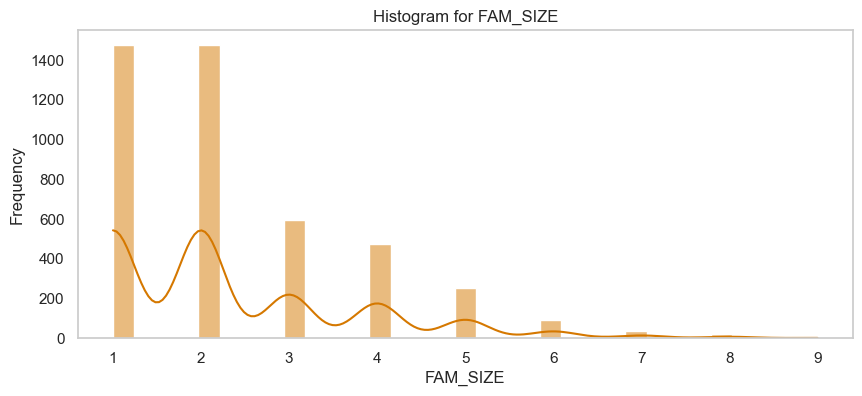

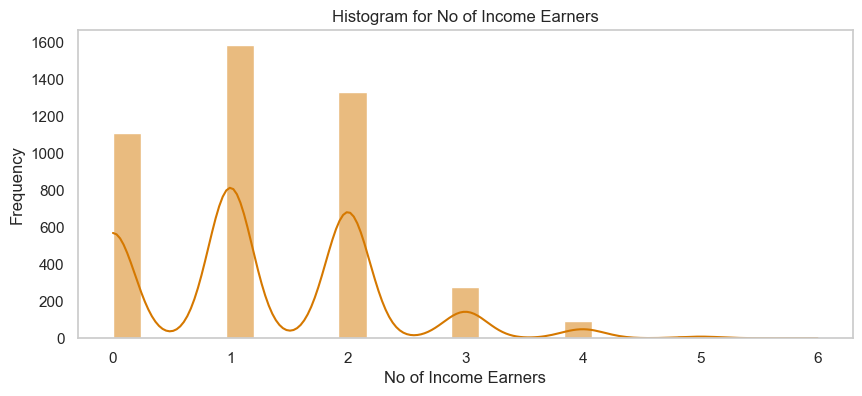

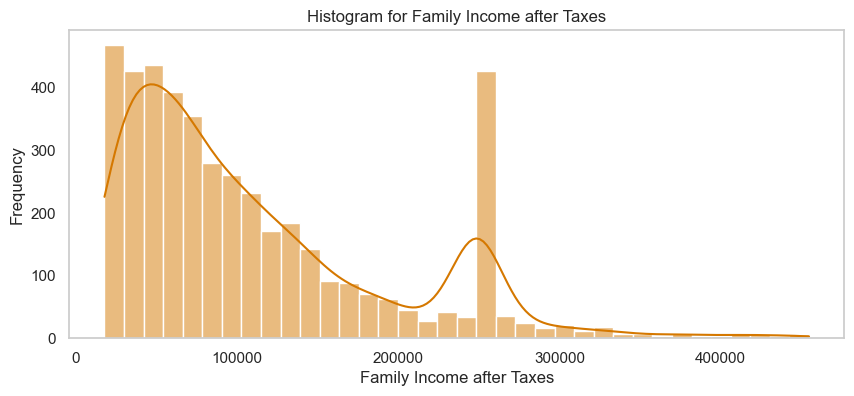

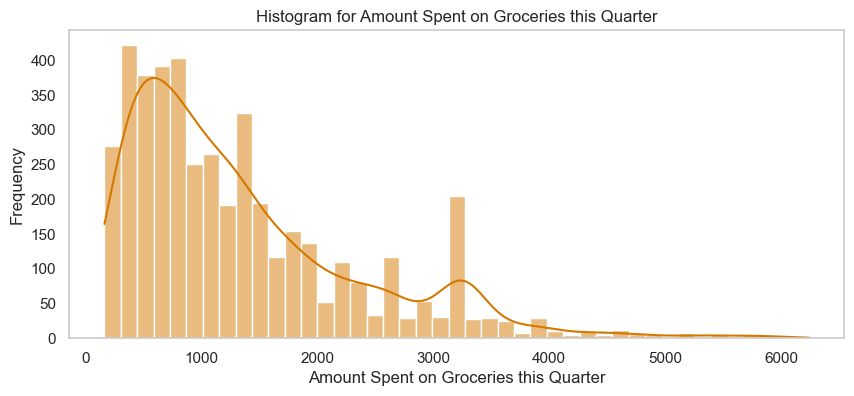

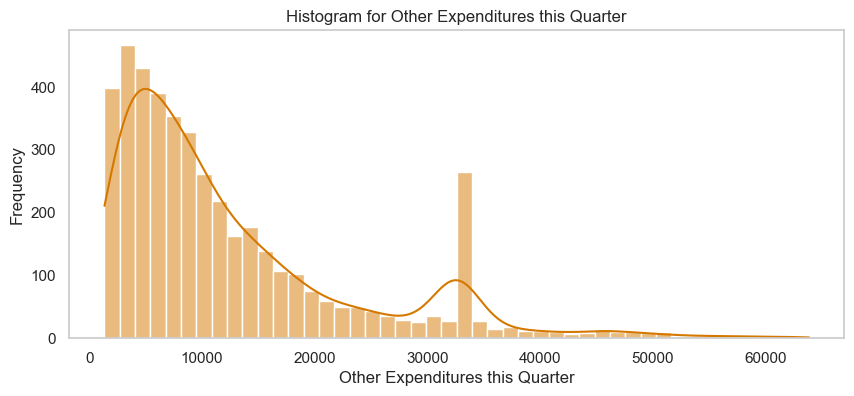

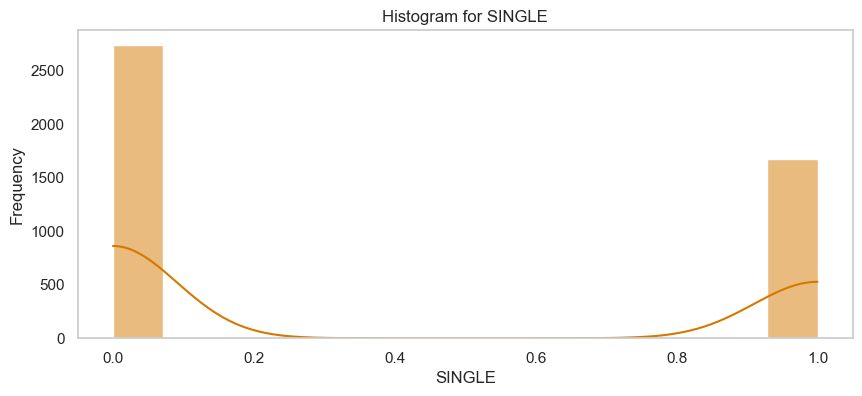

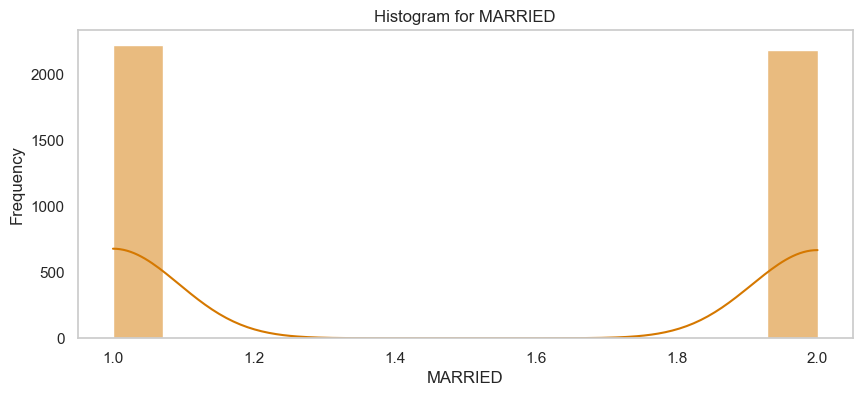

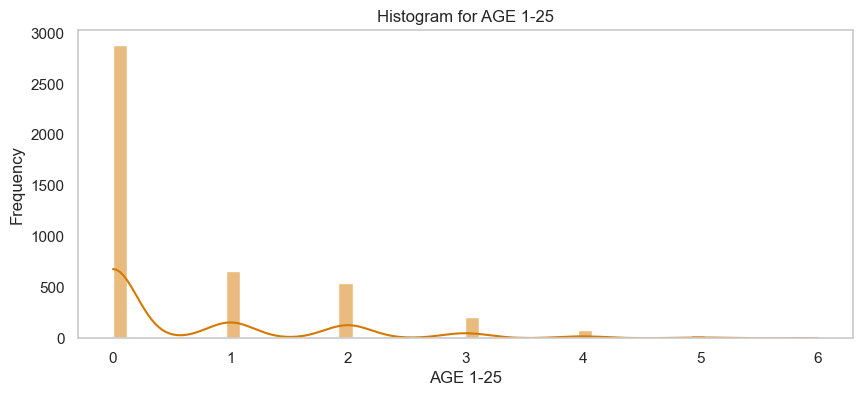

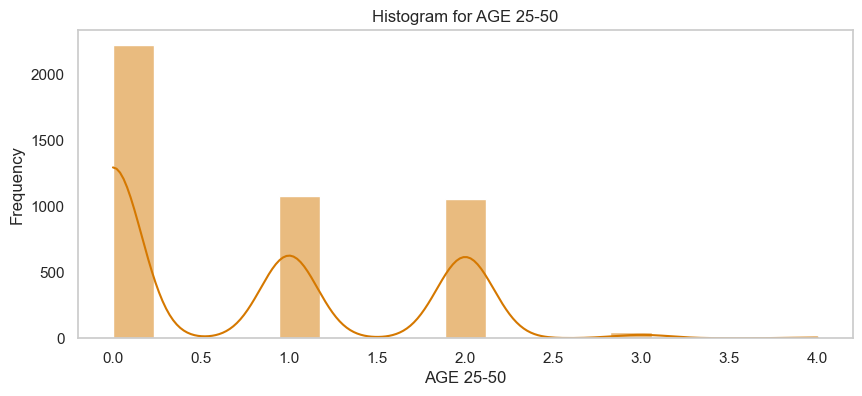

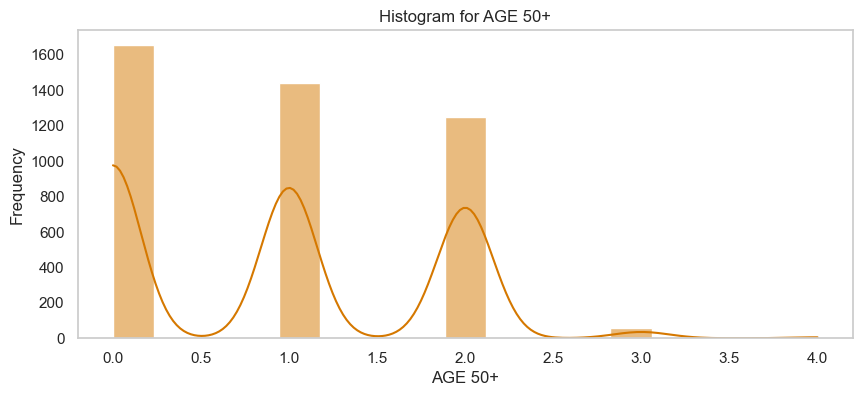

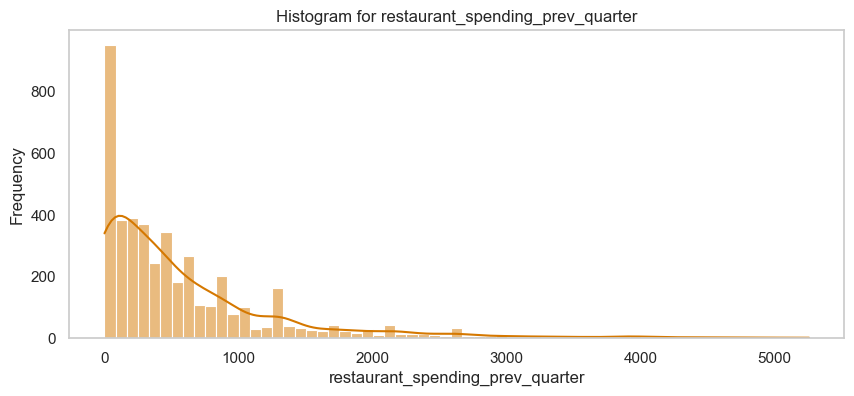

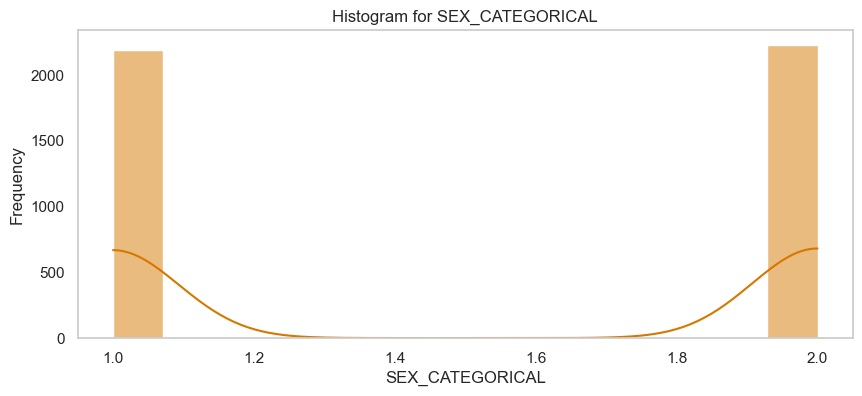

In [66]:
#histograns of all numeric coumns in a loop


numerical_data = df1.select_dtypes(include=['float64', 'int64'])

# Setting up the visualization
sns.set(style="whitegrid") # Setting the seaborn style

# Creating histograms for each numerical column in a loop
for col in numerical_data.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(numerical_data[col], kde=True, color='#d57800')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

### Feature Selection using Recursive Feature Selection Technique

In [67]:
X_numerical = df1[df1.select_dtypes(include=['int', 'float']).columns.tolist()]
y = df1["restaurant_spending_prev_quarter"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=20)  # Select the number of features you want to retain

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X_numerical.columns[rfe.support_]

# Evaluate the model with selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Fit a new model using selected features
model.fit(X_train_selected, y_train)

# Get feature importance
REA_feature_importance = pd.DataFrame({'Feature': selected_features, 'Coefficient': model.coef_})
REA_feature_importance = REA_feature_importance.sort_values(by='Coefficient', ascending=False)

REA_feature_importance

# Display top 10 features and their coefficients
REA_Top_10_features_df = REA_feature_importance.head(10).sort_values(by='Coefficient', ascending=False)

REA_Top_10_features_df

Feature   Coefficient
11        restaurant_spending_prev_quarter  7.376302e+02
9                                AGE 25-50  4.742618e-13
8                                 AGE 1-25  3.172844e-13
10                                 AGE 50+  2.790826e-13
4   Amount Spent on Groceries this Quarter  2.073090e-13
12                         SEX_CATEGORICAL  1.660271e-13
7                                  MARRIED  1.244375e-13
5          Other Expenditures this Quarter -1.029972e-13
3                Family Income after Taxes -1.072359e-13
0                                  AGE_REF -2.746246e-13

### Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecting numerical features for scaling
features_to_scale = df1.select_dtypes(include=[int, float]).columns.tolist()
features_to_scale.remove('restaurant_spending_prev_quarter')  # Excluding the dependent variable


# Standardizing the dataset (mean=0, std=1)
scaler_standard = StandardScaler()
df_scaled_standard = df1.copy()
df_scaled_standard[features_to_scale] = scaler_standard.fit_transform(df1[features_to_scale])

# Normalizing the dataset (range [0, 1])
scaler_minmax = MinMaxScaler()
df_scaled_minmax = df1.copy()
df_scaled_minmax[features_to_scale] = scaler_minmax.fit_transform(df1[features_to_scale])

### Calcuting VIF

In [69]:

column_names = [
    'AGE_REF', 'FAM_SIZE', 'No of Income Earners', 'Family Income after Taxes',
    'Amount Spent on Groceries this Quarter','Other Expenditures this Quarter', 
    'restaurant_spending_prev_quarter'
]


missing_columns = [col for col in column_names if col not in df1.columns]
existing_columns = [col for col in column_names if col in df1.columns]

# Attempt VIF calculation with columns that correctly exist
df_numeric_final = df1[existing_columns].select_dtypes(include=[int, float])

# Recalculate VIF
vif_data_final = pd.DataFrame()
vif_data_final["Feature"] = df_numeric_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(df_numeric_final.values, i) for i in range(df_numeric_final.shape[1])]

missing_columns, vif_data_final.sort_values(by="VIF", ascending=False)

vif_data_final

Feature       VIF
0                                 AGE_REF  3.400100
1                                FAM_SIZE  5.802011
2                    No of Income Earners  4.317428
3               Family Income after Taxes  3.283556
4  Amount Spent on Groceries this Quarter  3.710108
5         Other Expenditures this Quarter  3.358687
6        restaurant_spending_prev_quarter  2.153312

In [70]:
os.chdir("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\\01 MASTER FILES\\1. Code & datasets")
df3 =pd.read_excel('Modeling.xlsx')

In [71]:

df3.drop("STATE CODE", axis=1, inplace=True) 
df3.drop("STATE NAME", axis=1, inplace=True)


## One hot encoding to create dummy variables

In [72]:
df3 = pd.get_dummies(df3)

In [73]:
# correlation matrix

corr_matrix = df3.corr()                       # creating correlation matrix using function corr()
corr_matrix

AGE_REF  FAM_SIZE  \
AGE_REF                                 1.000000 -0.363606   
FAM_SIZE                               -0.363606  1.000000   
No of Income Earners                   -0.386794  0.606879   
Family Income after Taxes              -0.111508  0.178202   
Amount Spent on Groceries this Quarter -0.117261  0.311864   
Other Expenditures this Quarter        -0.073292  0.102757   
SINGLE                                  0.000754 -0.356559   
MARRIED                                -0.166629  0.486592   
AGE 1-25                               -0.329407  0.834552   
AGE 25-50                              -0.588578  0.599826   
AGE 50+                                 0.401871 -0.010036   
restaurant_spending_prev_quarter       -0.164063  0.196026   
SEX_CATEGORICAL                         0.042163 -0.014555   
Gender_Female                           0.042163 -0.014555   
Gender_Male                            -0.042163  0.014555   
Region_Midwest                          0.003716  0.003992   
Region_Northeast                        0.012036 -0.031922   
Region_Southeast                       -0.002674  0.018406   
Region_Southwest                       -0.011780  0.005531   
Region_West                             0.002565 -0.006180   

                                        No of Income Earners  \
AGE_REF                                            -0.386794   
FAM_SIZE                                            0.606879   
No of Income Earners                                1.000000   
Family Income after Taxes                           0.249934   
Amount Spent on Groceries this Quarter              0.216969   
Other Expenditures this Quarter                     0.151610   
SINGLE                                             -0.177865   
MARRIED                                             0.345929   
AGE 1-25                                            0.428345   
AGE 25-50                                           0.557452   
AGE 50+                                            -0.086149   
restaurant_spending_prev_quarter                    0.254206   
SEX_CATEGORICAL                                    -0.050870   
Gender_Female                                      -0.050870   
Gender_Male                                         0.050870   
Region_Midwest                                     -0.009506   
Region_Northeast                                   -0.027788   
Region_Southeast                                    0.027971   
Region_Southwest                                    0.016189   
Region_West                                        -0.017550   

                                        Family Income after Taxes  \
AGE_REF                                                 -0.111508   
FAM_SIZE                                                 0.178202   
No of Income Earners                                     0.249934   
Family Income after Taxes                                1.000000   
Amount Spent on Groceries this Quarter                   0.151478   
Other Expenditures this Quarter                          0.332136   
SINGLE                                                  -0.152943   
MARRIED                                                  0.206472   
AGE 1-25                                                 0.097425   
AGE 25-50                                                0.149743   
AGE 50+                                                  0.028390   
restaurant_spending_prev_quarter                         0.260663   
SEX_CATEGORICAL                                         -0.068996   
Gender_Female                                           -0.068996   
Gender_Male                                              0.068996   
Region_Midwest                                           0.009037   
Region_Northeast                                        -0.057638   
Region_Southeast                                         0.014574   
Region_Southwest                                         0.021979   
Region_West  

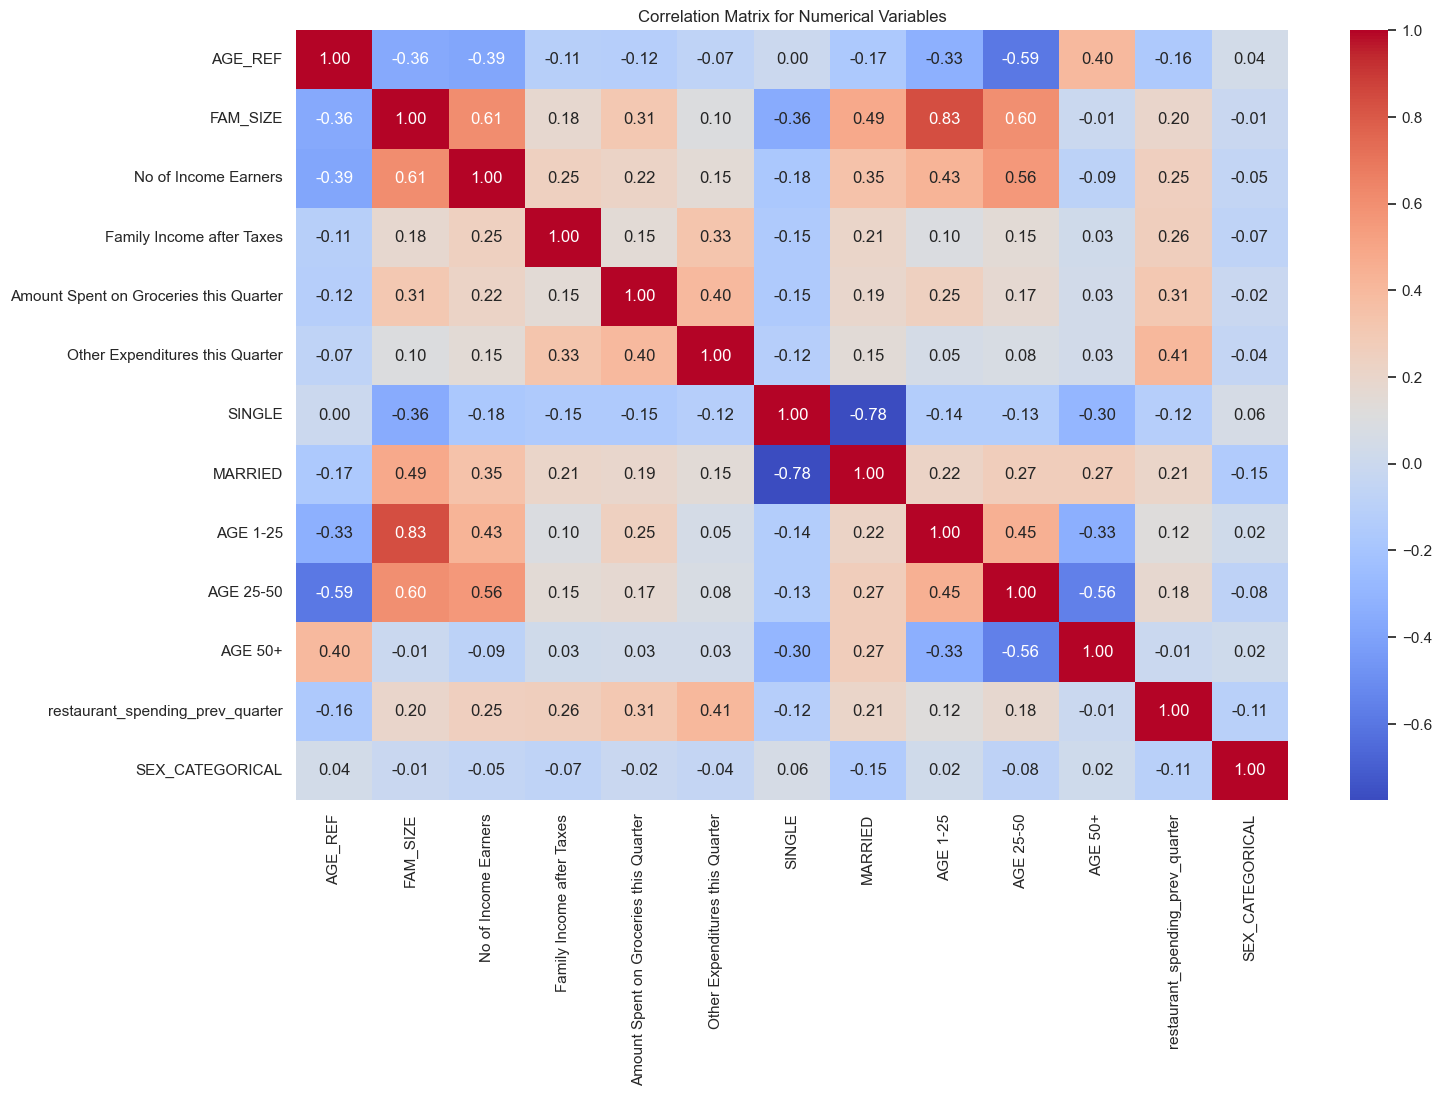

In [74]:
# Selecting numeric variables
numeric_df = df3.select_dtypes(include=['int64', 'float64'])

#orrelation matrix 
numeric_correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

## 5. Modeling

### Preparing the data for modeling

In [75]:
# creating dummy variables

X = pd.get_dummies(df3.drop(['restaurant_spending_prev_quarter'], axis=1))
y = df3['restaurant_spending_prev_quarter']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5.1 Random Forest Regressor Model

In [76]:
# Initializing the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=20, random_state=42)

# Fitting the model to the training data
random_forest_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = random_forest_model.predict(X_test)


# Calculating evaluation metrics
Randomforest_mae = mean_absolute_error(y_test, y_pred)
Randomforest_mse = mean_squared_error(y_test, y_pred)
Randomforest_rmse = np.sqrt(Randomforest_mse)
Randomforest_r2 = r2_score(y_test, y_pred)

print("R-squared for Random Forest Regressor Model:",round(Randomforest_r2,3))

print("Mean Square Error for Random Forest Regressor Model:",round(Randomforest_mse,3))

print("Mean Absolute Error for Random Forest Regressor:",round(Randomforest_mae,3))

print("Root Mean Square Error for Random Forest Regressor:",round(Randomforest_rmse,3))

R-squared for Random Forest Regressor Model: 0.359
Mean Square Error for Random Forest Regressor Model: 338969.98
Mean Absolute Error for Random Forest Regressor: 387.203
Root Mean Square Error for Random Forest Regressor: 582.211


### HyperParameter Tuning - Random Forest

In [77]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=92)

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.32289132885646415


### 5.2 Multiple Linear Regression Model

In [78]:
# Initializing the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate evaluation metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)



print("R-squared for Multiple Linear Regression Model:",round(r2_linear,3))
print("Mean Square Error for Multiple Linear Regression Model:",round(mse_linear,3))
print("Mean Absolute Error for Multiple Linear Regression Model:",round(mae_linear,3))
print("Root Mean Square Error for Multiple Linear Regression Model:",round(rmse_linear,3))

R-squared for Multiple Linear Regression Model: 0.274
Mean Square Error for Multiple Linear Regression Model: 384089.351
Mean Absolute Error for Multiple Linear Regression Model: 415.224
Root Mean Square Error for Multiple Linear Regression Model: 619.749


### Comparison of Evaluation Metrics of both models

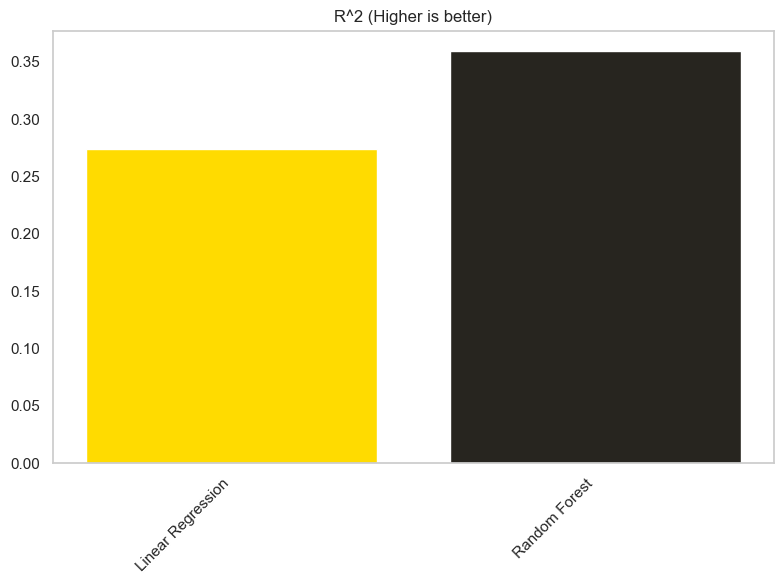

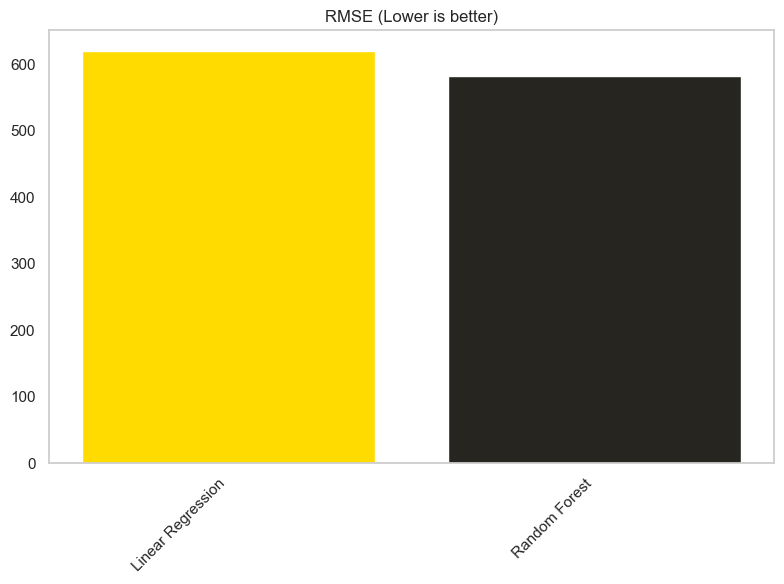

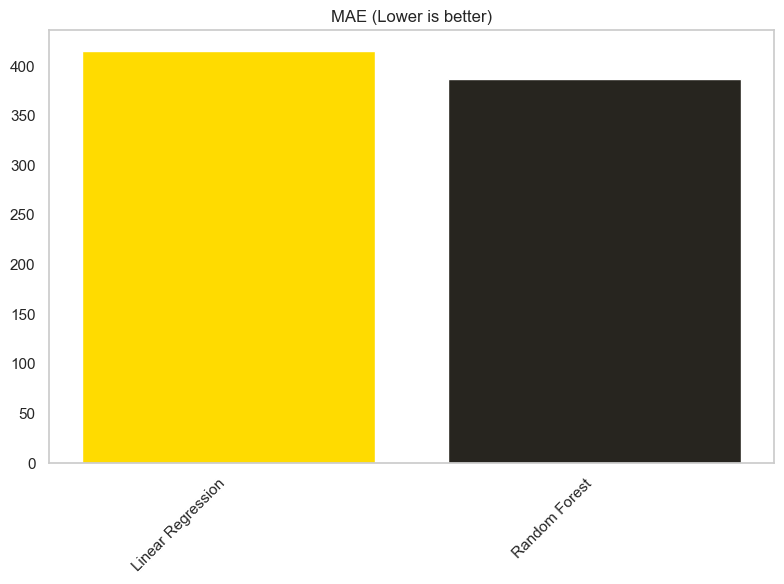

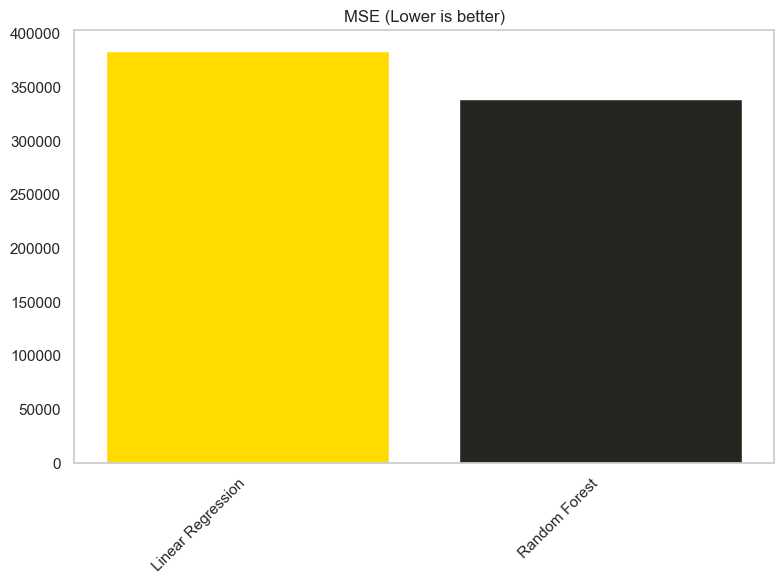

In [79]:
r2_values = {'Linear Regression': r2_linear,  'Random Forest': Randomforest_r2}
mae_values = {'Linear Regression':mae_linear ,  'Random Forest': Randomforest_mae}
rmse_values = {'Linear Regression': rmse_linear,  'Random Forest': Randomforest_rmse}
mse_values = {'Linear Regression': mse_linear,   'Random Forest': Randomforest_mse}


# Titles for the subplots
titles = ['R^2 (Higher is better)', 'RMSE (Lower is better)', 'MAE (Lower is better)', 'MSE (Lower is better)']

# Data for each subplot
metrics = [r2_values,  rmse_values, mae_values, mse_values]

# Colors for each model
colors = ['#FFDB00', '#27251F']  # for two models


def plot_individual_graphs(metric_values, title, colors):
    names = list(metric_values.keys())
    values = list(metric_values.values())
    plt.figure(figsize=(8, 6))
    bars = plt.bar(names, values, color=colors)  
    plt.title(title)
    plt.xticks(range(len(names)), names, rotation=45, ha="right")  
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Plot each graph individually with corrected colors application
plot_individual_graphs(r2_values, 'R^2 (Higher is better)', colors)
plot_individual_graphs(rmse_values, 'RMSE (Lower is better)', colors)
plot_individual_graphs(mae_values, 'MAE (Lower is better)', colors)
plot_individual_graphs(mse_values, 'MSE (Lower is better)', colors)

### Feature Importance - Top 7 Significant Variabels

In [80]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_
features = X_train.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
top_features = importances_df.sort_values(by='Importance', ascending=False).head(7)

top_features

Feature  Importance
5          Other Expenditures this Quarter    0.418973
3                Family Income after Taxes    0.148869
4   Amount Spent on Groceries this Quarter    0.128170
0                                  AGE_REF    0.084077
1                                 FAM_SIZE    0.048296
2                     No of Income Earners    0.027486
10                                 AGE 50+    0.024788

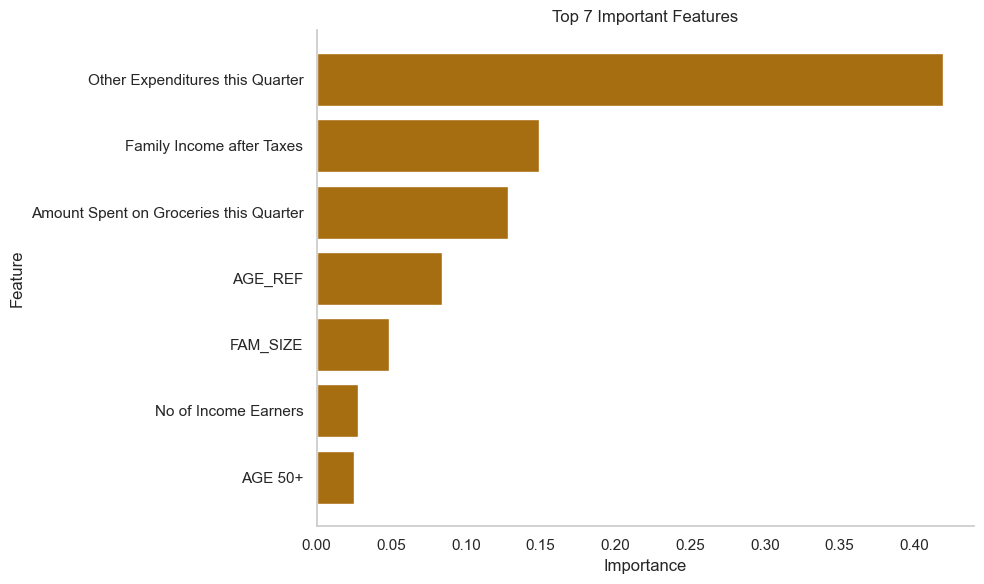

In [81]:
# Plotting the top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='#a76d11')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 7 Important Features')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
plt.tight_layout()  
plt.show()


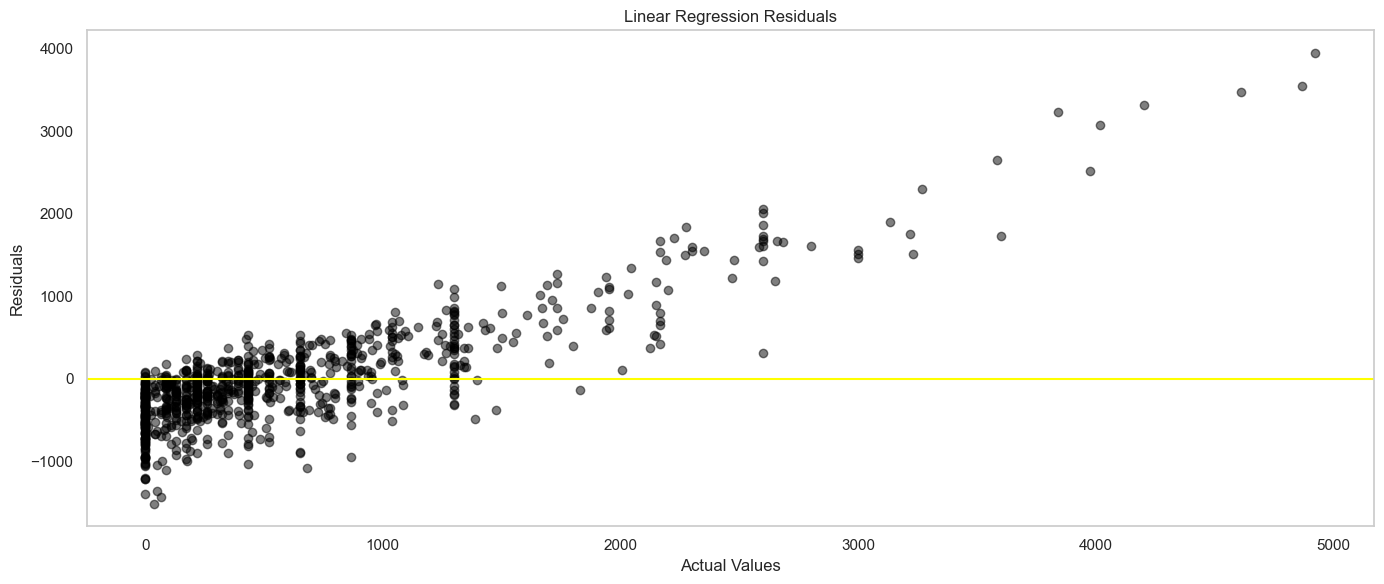

In [82]:
# Residual Plots
# plotting with 'y_test' as actual values and 'y_pred_linear', as predictions
# Linear Regression Residuals



# Calculating the residuals from the Linear Regression model
residuals_linear = y_test - y_pred_linear

# Set up the matplotlib figure for plotting
plt.figure(figsize=(14, 6))

# the residuals plot for the Linear Regression model
plt.scatter(y_test, residuals_linear, color='black', alpha=0.5)  
plt.title('Linear Regression Residuals')  # Title
plt.xlabel('Actual Values')  # Label for the x-axis
plt.ylabel('Residuals')  # Label for the y-axis
plt.axhline(y=0, color='yellow', linestyle='-')  # Horizontal line at residuals = 0

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.grid(False)
plt.show()  # Display the plot



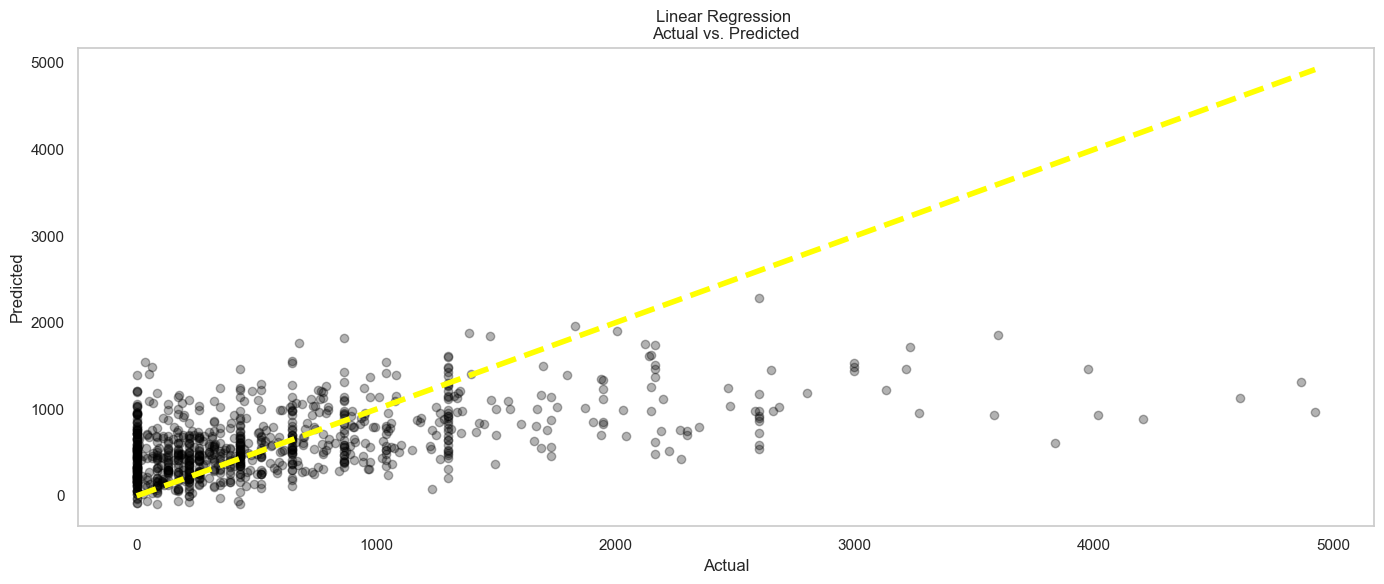

In [83]:
# Prediction Error Plots

plt.figure(figsize=(14, 6))

# Linear Regression
plt.scatter(y_test, y_pred_linear, alpha=0.3, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--',color='yellow', lw=4)
plt.title('Linear Regression \nActual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.grid(False)
plt.show()


### Correlation with Finance Related Variables

In [84]:

finance_vars = ['Family Income after Taxes', 'Amount Spent on Groceries this Quarter', 'Other Expenditures this Quarter', 'restaurant_spending_prev_quarter']
correlation_matrix = df3[finance_vars].corr()
correlation_matrix



#Display the correlation with restaurant spending
correlation_matrix['restaurant_spending_prev_quarter']


Family Income after Taxes                 0.260663
Amount Spent on Groceries this Quarter    0.311304
Other Expenditures this Quarter           0.408022
restaurant_spending_prev_quarter          1.000000
Name: restaurant_spending_prev_quarter, dtype: float64

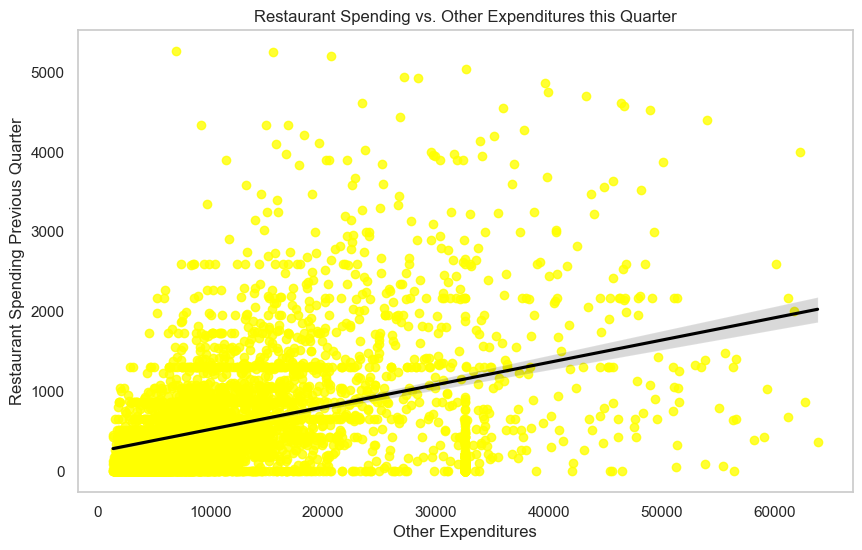

In [85]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df3, x='Other Expenditures this Quarter', y='restaurant_spending_prev_quarter', color='yellow', line_kws={"color": "black"})
plt.title('Restaurant Spending vs. Other Expenditures this Quarter')
plt.xlabel('Other Expenditures')
plt.ylabel('Restaurant Spending Previous Quarter')
plt.grid(False)
plt.show()



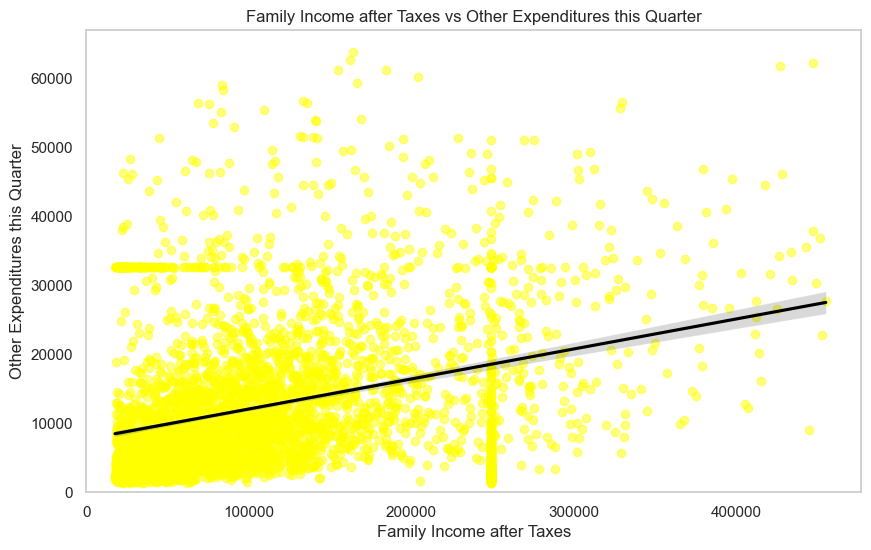

In [86]:

# Family Income after Taxes vs Other Expenditures this Quarter'

plt.figure(figsize=(10, 6))
sns.regplot(x='Family Income after Taxes', 
            y='Other Expenditures this Quarter', 
            data=df3, 
            line_kws={"color":"black"},  # Setting the regression line color to black
            scatter_kws={"color":"yellow", "alpha":0.5})  # Setting the scatter plot points to yelow
plt.title('Family Income after Taxes vs Other Expenditures this Quarter')
plt.xlabel('Family Income after Taxes')
plt.ylabel('Other Expenditures this Quarter')
plt.xlim(left=0)  
plt.ylim(bottom=0)  
plt.grid(False)
plt.show()


## 6. Key Summary Visualizations

### Line Chart between Age vs Restaurant Spending Previous Quarter

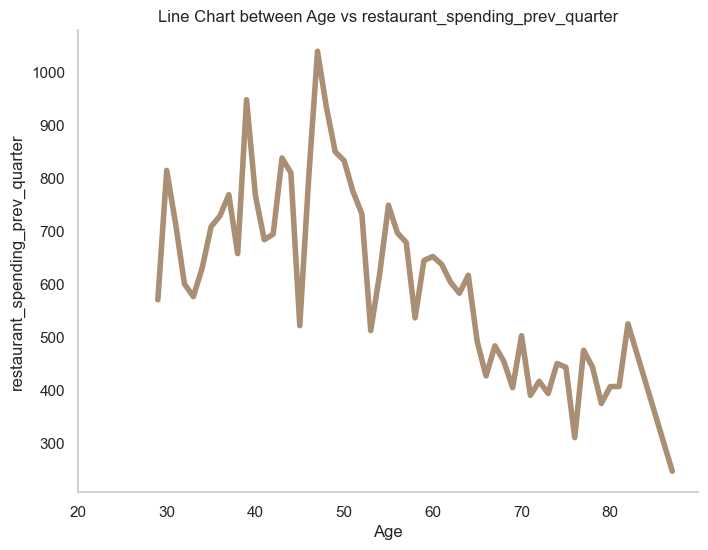

In [87]:

RES_data = df3.groupby('AGE_REF')['restaurant_spending_prev_quarter'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(x='AGE_REF', y='restaurant_spending_prev_quarter', data=RES_data, color='#aa8f75', linewidth=4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Line Chart between Age vs restaurant_spending_prev_quarter')
plt.xlabel('Age')
plt.ylabel('restaurant_spending_prev_quarter')
plt.xlim(left=20)
plt.grid(False)
plt.show()

### Average restaurant spending prev quarter by Income ranges

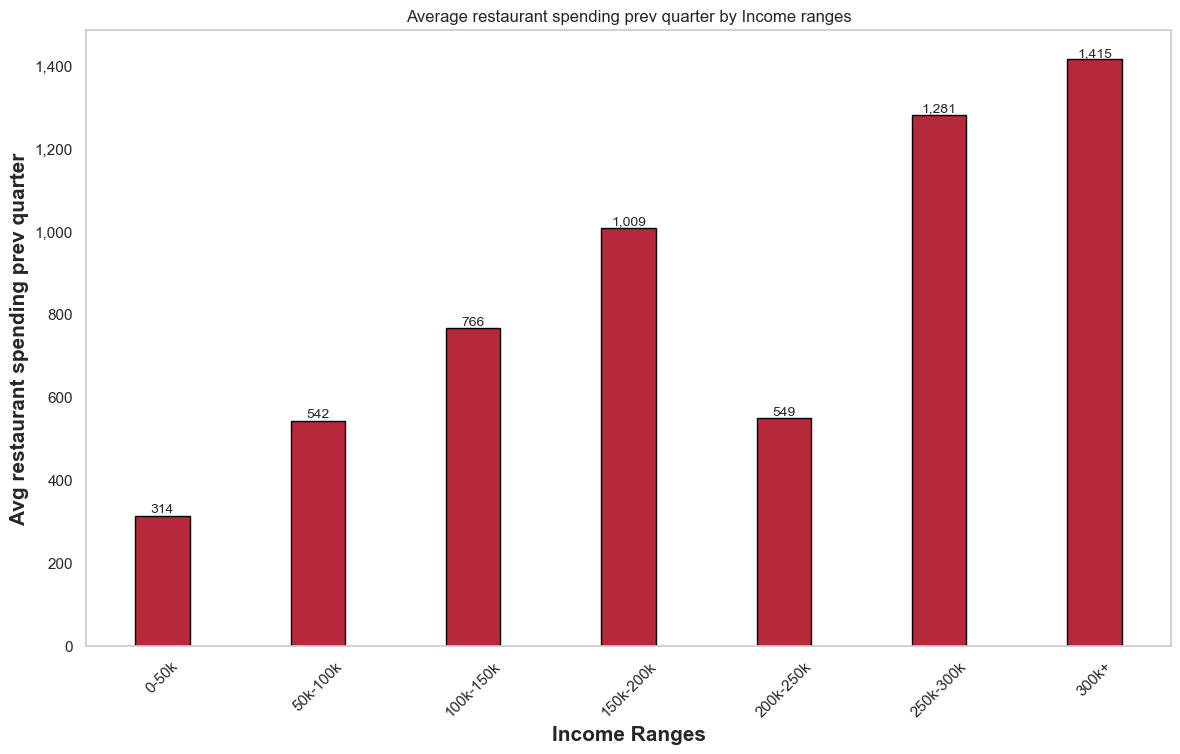

In [88]:

# Set the locale to use commas as thousands separator
locale.setlocale(locale.LC_ALL, 'en_US')

# First, we define income brackets. 
# Adjust the range and bins according to the distribution of the 'Family Income after Taxes' variable.

income_brackets = pd.cut(df3['Family Income after Taxes'], bins=[0, 50000, 100000, 150000, 200000, 250000, 300000, np.inf], 
                         labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k+'])

# Grouping by the income brackets and calculate the mean for the two dependent variables
df3['Income Brackets'] = income_brackets

# Grouped by the income brackets and calculating the mean for the dependent variable
grouped_data = df3.groupby('Income Brackets')['restaurant_spending_prev_quarter'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.35

# Plot
bars = ax.bar(grouped_data['Income Brackets'], grouped_data['restaurant_spending_prev_quarter'], color='#b5293a', width=bar_width, edgecolor='black')

# Annotate bars with values (with commas)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, locale.format_string("%d", height, grouping=True), 
            ha='center', va='bottom', fontsize=10)

# Remove grid lines
ax.grid(False)

# Add xticks on the middle of the group bars
plt.xlabel('Income Ranges', fontweight='bold', fontsize=15)
plt.ylabel('Avg restaurant spending prev quarter', fontweight='bold', fontsize=15)
plt.xticks(rotation=45)  # Rotates labels to improve readability

# Format y-axis ticks with commas
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string("%d", x, grouping=True)))

# showing graph
plt.title('Average restaurant spending prev quarter by Income ranges')
plt.show()


### Comparison of Average Expenditures by Age Group

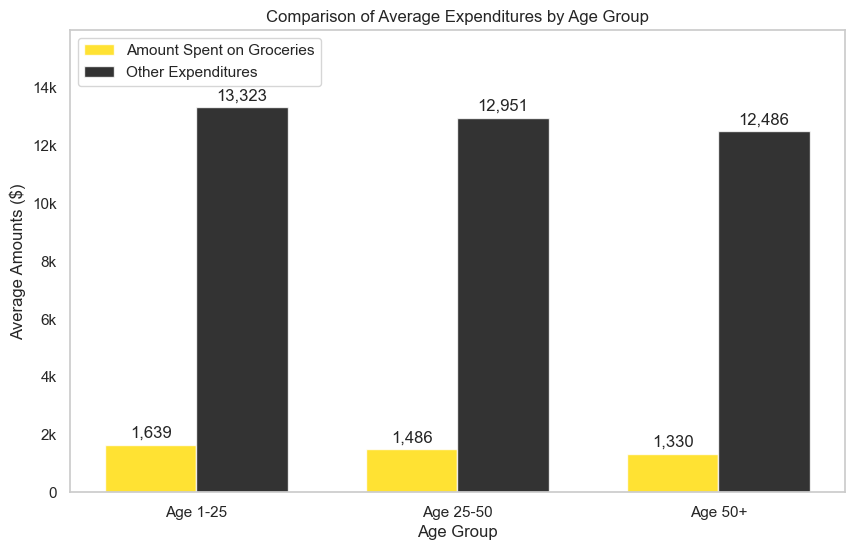

In [89]:
# Function to format the numbers as '1k', '2k', etc.
def k_formatter(x, pos):
    return f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'

# Function to format numbers with commas
def comma_formatter(x, pos):
    return f'{x:,.0f}'

# Data setup
age_categories = ['AGE 1-25', 'AGE 25-50', 'AGE 50+']
age_groups_labels = ["Age 1-25", "Age 25-50", "Age 50+"]
average_groceries = []
average_other_expenditures = []

# Assuming df3 is your DataFrame
for age_category in age_categories:
    group = df3[df3[age_category] > 0]
    average_groceries.append(group['Amount Spent on Groceries this Quarter'].mean())
    average_other_expenditures.append(group['Other Expenditures this Quarter'].mean())

# Setup for the plot with custom figure size
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(age_groups_labels))
bar_width = 0.35
opacity = 0.8

# Creating bars for each group
rects1 = ax.bar(index, average_groceries, bar_width, alpha=opacity, color='#ffdb00', label='Amount Spent on Groceries')
rects2 = ax.bar(index + bar_width, average_other_expenditures, bar_width, alpha=opacity, color='#000000', label='Other Expenditures')

# Add value labels using comma formatter
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(comma_formatter(height, None),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(ax, rects1)
add_value_labels(ax, rects2)

# Setting labels, title, and legend
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Amounts ($)')
ax.set_title('Comparison of Average Expenditures by Age Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(age_groups_labels)
ax.legend(loc='upper left')

# Adjusting the y-axis to accommodate labels using 'k' formatter
ax.yaxis.set_major_formatter(ticker.FuncFormatter(k_formatter))

# Adjusting the y-axis to accommodate labels
ax.set_ylim(0, max(max(average_groceries), max(average_other_expenditures)) * 1.2)

# Remove grid lines
ax.grid(False)

# Display the plot
plt.show()


### Average Other Expenditures of People by Income Level

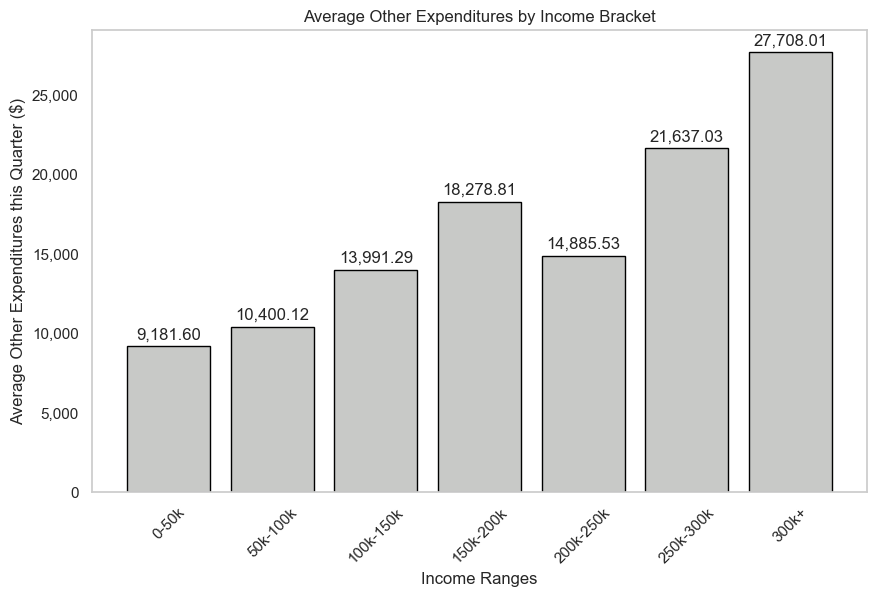

In [90]:

# Define income brackets for categorization
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, np.inf]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k+']
df3['Income Brackets'] = pd.cut(df3['Family Income after Taxes'], bins=bins, labels=labels)

# Group by the new income brackets and calculate the average for 'Other Expenditures this Quarter'
grouped_data = df3.groupby('Income Brackets')['Other Expenditures this Quarter'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['Income Brackets'], grouped_data['Other Expenditures this Quarter'], color='#c8c9c7', edgecolor='#000000')
plt.title('Average Other Expenditures by Income Bracket')
plt.xlabel('Income Ranges')
plt.ylabel('Average Other Expenditures this Quarter ($)')

# Function to add labels to each bar
def add_labels_to_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:,.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels_to_bars(bars)

plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.ylim(bottom=0)  # Start y-axis at 0
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis with commas

# Remove grid lines
plt.grid(False)

plt.show()


### Average Spending on Restaurants and Groceries of People by Income Level

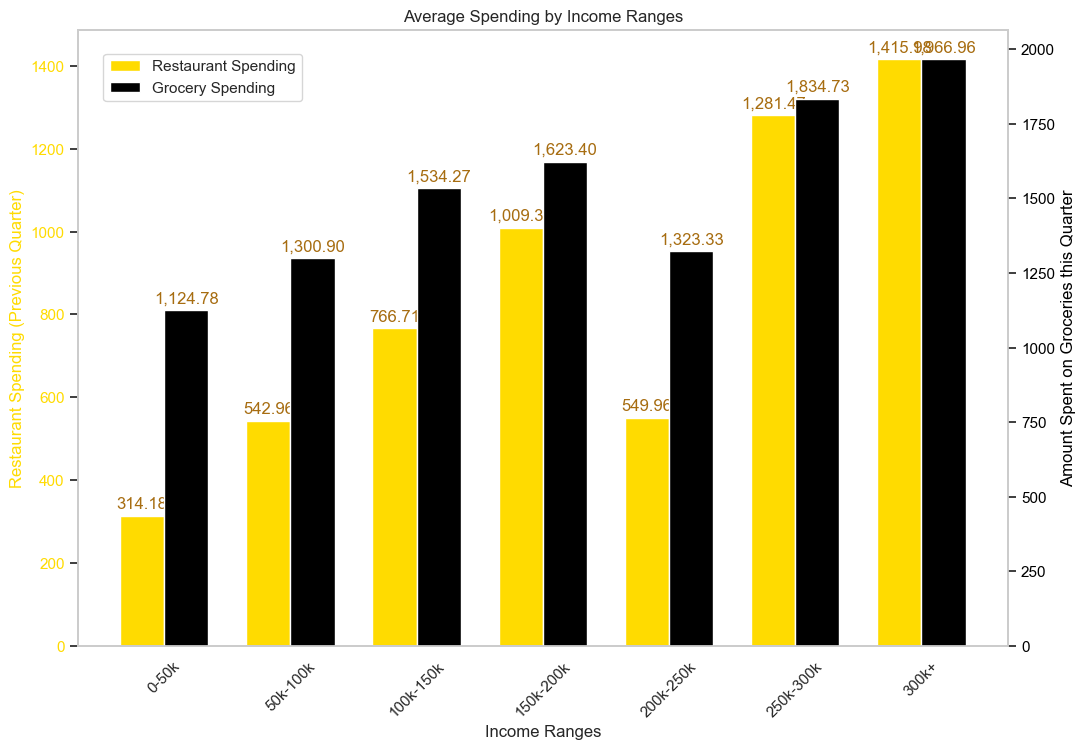

In [91]:
# Set locale for formatting numbers
#locale.setlocale(locale.LC_ALL, 'en_US')

# Define income brackets
income_brackets = pd.cut(df3['Family Income after Taxes'], bins=[0, 50000, 100000, 150000, 200000, 250000, 300000, np.inf], 
                         labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k+'])

# Group by income brackets and calculate mean for dependent variables
df3['Income Brackets'] = income_brackets
grouped_data = df3.groupby('Income Brackets').agg({
    'restaurant_spending_prev_quarter': 'mean',
    'Amount Spent on Groceries this Quarter': 'mean'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.35
index = range(len(grouped_data['Income Brackets']))

# Bar chart for Restaurant Spending
avg_restaurant = ax1.bar(index, grouped_data['restaurant_spending_prev_quarter'], color="#ffdb00", label='Restaurant Spending', width=bar_width, align='center')

# Create a second y-axis for the Grocery Spending
ax2 = ax1.twinx()
avg_grocery = ax2.bar([i + bar_width for i in index], grouped_data['Amount Spent on Groceries this Quarter'], color="#000000", label='Grocery Spending', width=bar_width, align='center')

# Function to add labels to both sets of bars
def add_labels_to_bars(bars, axis, color_code):
    for bar in bars:
        height = bar.get_height()
        axis.annotate(f'{height:,.2f}',
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom', color=color_code)

add_labels_to_bars(avg_restaurant, ax1, "#a76d11")
add_labels_to_bars(avg_grocery, ax2, "#a76d11")

# Setting labels and titles
ax1.set_xlabel('Income Ranges')
ax1.set_ylabel('Restaurant Spending (Previous Quarter)', color="#ffdb00")
ax2.set_ylabel('Amount Spent on Groceries this Quarter', color="#000000")
ax1.set_title('Average Spending by Income Ranges')

ax1.tick_params(axis='y', labelcolor="#ffdb00")
ax2.tick_params(axis='y', labelcolor="#000000")

# Setting tick labels
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(grouped_data['Income Brackets'], rotation=45)

# Adding a legend at the top left
fig.legend(loc='upper left', bbox_to_anchor=(0.14, 0.86))

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

plt.show()


### Average Restaurant Spending Previous Quarter by Marital Status

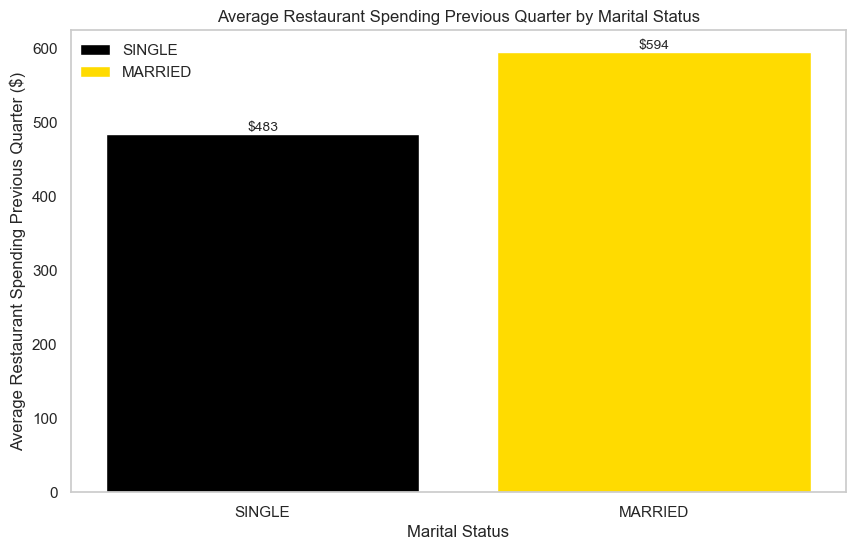

In [92]:

# Define the marital status categories
marital_status_categories = ['SINGLE', 'MARRIED']
avg_restaurant_spending_per_marital_status = []

# Calculate average restaurant spending for the previous quarter for each marital status
for status in marital_status_categories:
    avg_spending = df3[df3[status] > 0]['restaurant_spending_prev_quarter'].mean()
    avg_restaurant_spending_per_marital_status.append(avg_spending)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(marital_status_categories, avg_restaurant_spending_per_marital_status, color=['#000000', '#ffdb00'])

# Annotate bars with values (with commas and dollar symbol)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"${locale.format_string('%d', height, grouping=True)}", 
             ha='center', va='bottom', fontsize=10)

# Adding legend for bar colors with adjustments
plt.figlegend(handles=bars, labels=['SINGLE', 'MARRIED'], loc='upper left', bbox_to_anchor=(0.12, 0.88), frameon=False)

plt.title('Average Restaurant Spending Previous Quarter by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Restaurant Spending Previous Quarter ($)')
plt.grid(False)

plt.show()


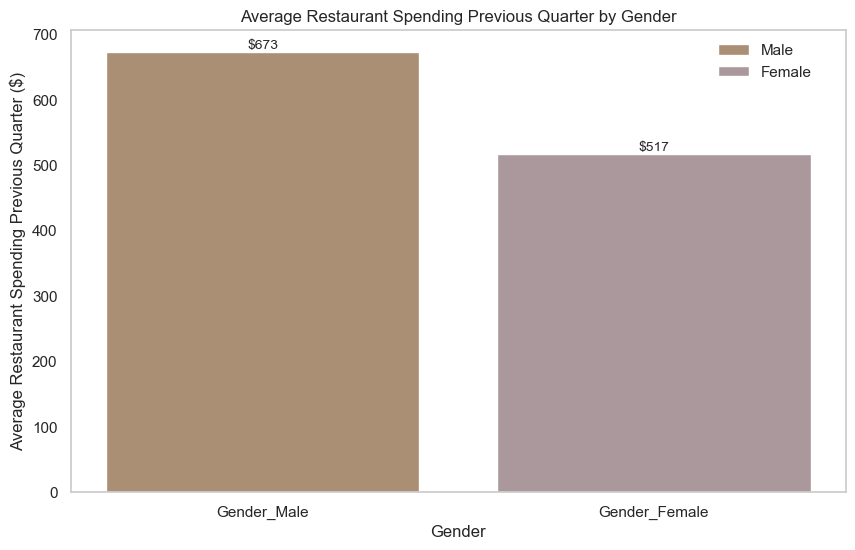

In [93]:
# Set the locale to use commas as thousands separator and currency symbol as dollar
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Define the gender categories
gender_categories = ['Gender_Male', 'Gender_Female']
avg_restaurant_spending_per_gender = []

# Calculate average restaurant spending for the previous quarter for each gender
for gender in gender_categories:
    avg_spending = df3[df3[gender] > 0]['restaurant_spending_prev_quarter'].mean()
    avg_restaurant_spending_per_gender.append(avg_spending)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(gender_categories, avg_restaurant_spending_per_gender, color=['#aa8f75', '#ab989d'])

# Annotate bars with values (with commas and dollar symbol)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"${locale.format_string('%d', height, grouping=True)}", 
             ha='center', va='bottom', fontsize=10)

# Adding legend for bar colors with adjustments
plt.figlegend(handles=bars, labels=['Male', 'Female'], loc='upper right', bbox_to_anchor=(0.88, 0.88), frameon=False)

plt.title('Average Restaurant Spending Previous Quarter by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Restaurant Spending Previous Quarter ($)')
plt.grid(False)
plt.show()


### Average Restaurant Spending Previous Quarter by Number of Income Earners

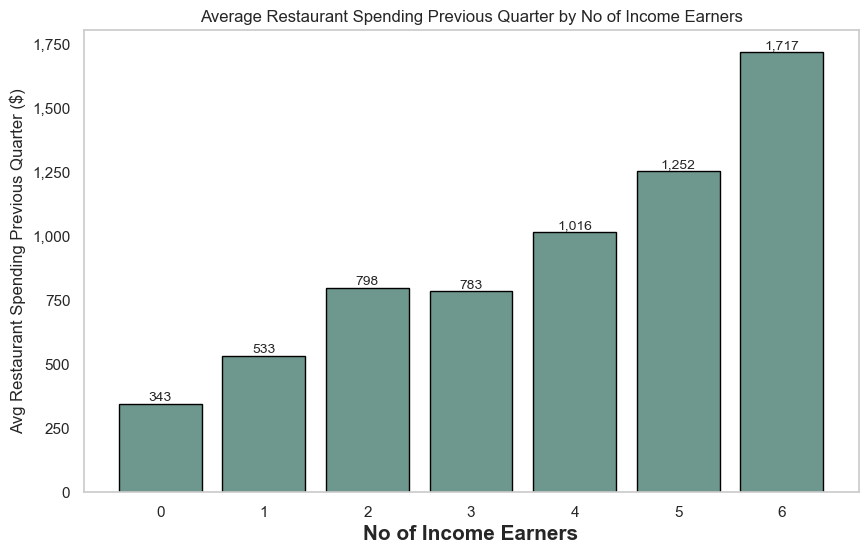

In [94]:
# Function to create bar charts
def create_bar_chart(data, column_name, xlabel_rotation=0):
    # Grouping by the column and calculating the mean for the dependent variable
    grouped_data = data.groupby(column_name)['restaurant_spending_prev_quarter'].mean().reset_index()

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed
    bars = ax.bar(grouped_data[column_name], grouped_data['restaurant_spending_prev_quarter'], 
                  color=['#6e978e'], edgecolor='black')  # Using specified colors

    # Annotate bars with values (with commas)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, locale.format_string("%d", int(height), grouping=True),
                ha='center', va='bottom', fontsize=10)

    # Add xticks on the middle of the group bars
    plt.xlabel(column_name, fontweight='bold', fontsize=15)
    plt.ylabel('Avg Restaurant Spending Previous Quarter ($)')
    plt.xticks(rotation=xlabel_rotation)  # Rotates labels to improve readability
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string("%d", int(x), grouping=True)))

    # Remove grid lines
    ax.grid(False)

    # Title
    plt.title(f'Average Restaurant Spending Previous Quarter by {column_name}')
    plt.show()

# Call the function for number of income earners
create_bar_chart(df3, 'No of Income Earners')


### Average Restaurant Spending Previous Quarter by FAMILY SIZE

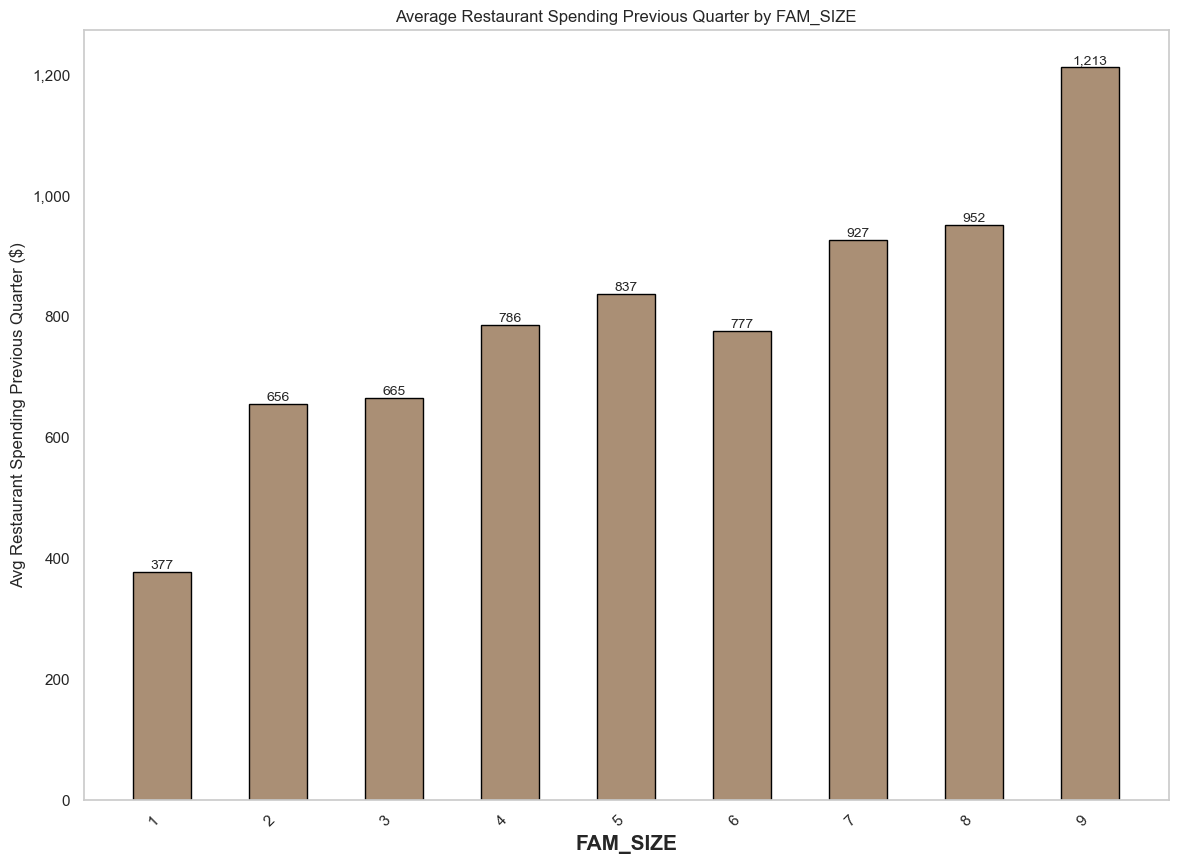

In [95]:

# Function to create bar chart for 'FAM_SIZE'
def create_bar_chart_fam_size(data, color):
    # Grouping by 'FAM_SIZE' and calculating the mean for the dependent variable
    grouped_data = data.groupby('FAM_SIZE')['restaurant_spending_prev_quarter'].mean().reset_index()

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 10))  # Increased figure size
    bar_width = 0.5  # Decrease the bar width if needed
    bars = ax.bar(grouped_data.index, grouped_data['restaurant_spending_prev_quarter'], 
                  color=color, edgecolor='black', width=bar_width)  # Using specified color and bar width

    # Annotating bars with values (with commas)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, locale.format_string("%d", int(height), grouping=True),
                ha='center', va='bottom', fontsize=10)

    # Add xticks on the middle of the group bars
    plt.xlabel('FAM_SIZE', fontweight='bold', fontsize=15)
    plt.ylabel('Avg Restaurant Spending Previous Quarter ($)')
    plt.xticks(range(len(grouped_data)), grouped_data['FAM_SIZE'], rotation=45, ha='right')  # Rotates labels to improve readability
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string("%d", int(x), grouping=True)))

    # Remove grid lines
    ax.grid(False)

    # Title
    plt.title('Average Restaurant Spending Previous Quarter by FAM_SIZE')
    plt.show()

# Call the function for 'FAM_SIZE'
create_bar_chart_fam_size(df3, color='#aa8f75')


### Bar chart between age group and restaurant spending previous quarter

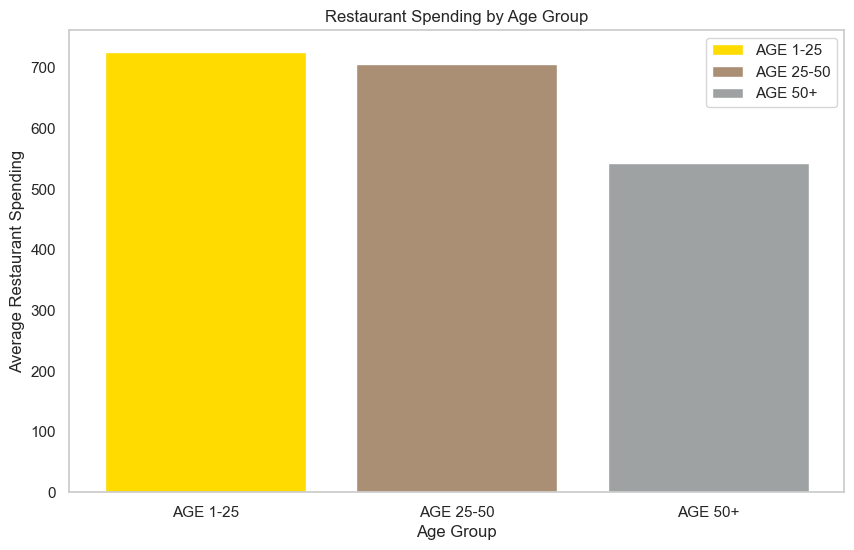

In [96]:
# Extract required columns
age_categories = ['AGE 1-25', 'AGE 25-50', 'AGE 50+']
fdaway_categories = df3['restaurant_spending_prev_quarter']

# Calculating average restaurant spending previous quarter expenditure for each age category
avg_fdaway_per_age = []
for age_cat in age_categories:
    avg_fdaway = df3[df3[age_cat] > 0]['restaurant_spending_prev_quarter'].mean()
    avg_fdaway_per_age.append(avg_fdaway)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(age_categories, avg_fdaway_per_age, color=['#ffdb00', '#aa8f75', '#9ea2a2'])

# Add legend specifying the age categories
plt.legend(bars, age_categories)

plt.title('Restaurant Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Restaurant Spending')
plt.grid(False)
plt.show()


### Total Restaurant Spending by Each Region

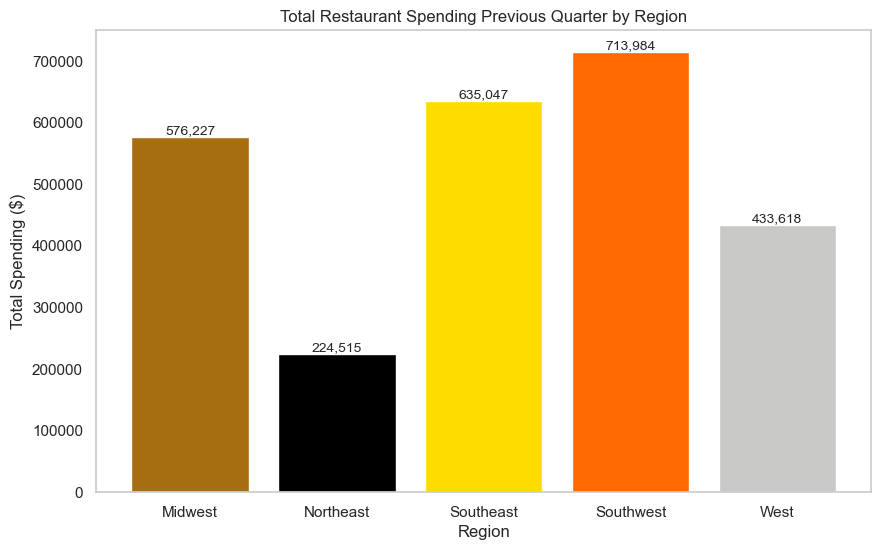

In [97]:
# Function to create bar charts for average and total spending by region
def create_bar_charts_by_region_total(data, dv_column, colors):
    # Calculate total spending by region
    total_spending_by_region = data.groupby('Region')[dv_column].sum().reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(total_spending_by_region['Region'], total_spending_by_region[dv_column], color=colors)

    # Function to add labels to bars
    def add_labels_to_bars(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height, locale.format_string("%d", int(height), grouping=True),
                      ha='center', va='bottom', fontsize=10)
    
    plt.title('Total Restaurant Spending Previous Quarter by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Spending ($)')
    plt.grid(False)
    add_labels_to_bars(bars)
    plt.show()

# Call the function for total spending by region
colors = ['#a76d11', '#000000', '#ffdb00', '#ff6b00', '#c8c9c7']
create_bar_charts_by_region_total(df1, 'restaurant_spending_prev_quarter', colors)
